# Lab 4

In [1]:
import nltk
import string
import collections
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
f = open('en_US.blogs.txt', 'r')

In [3]:
blogs = f.read()

## Limpieza de datos

### Tokenization

In [4]:
blogs = nltk.word_tokenize(blogs)

In [5]:
for i in range(10):
    print(blogs[i])

In
the
years
thereafter
,
most
of
the
Oil
fields


### Signos de puntuacion y caracteres

In [6]:
blogs = [blog for blog in blogs if blog.isalpha()]

In [7]:
for i in range(10):
    print(blogs[i])

In
the
years
thereafter
most
of
the
Oil
fields
and


### Palabras a minusculas

In [8]:
blogs = [w.lower() for w in blogs]

### Stopwords

In [9]:
from nltk.corpus import stopwords

In [10]:
stop_words = set(stopwords.words('english'))

In [11]:
blogs = [w for w in blogs if not w in stop_words]

In [12]:
for i in range(35):
    print(blogs[i])

years
thereafter
oil
fields
platforms
named
pagan
gods
love
brown
chad
awesome
kids
holding
fort
work
later
usual
kids
busy
together
playing
skylander
xbox
together
kyan
cashed
piggy
bank
wanted
game
bad
used
gift
card


### Stemming

In [13]:
from nltk.stem.porter import PorterStemmer

In [14]:
porter = PorterStemmer()

In [15]:
blogs = [porter.stem(word) for word in blogs]

In [16]:
for i in range(100):
    print(blogs[i])

year
thereaft
oil
field
platform
name
pagan
god
love
brown
chad
awesom
kid
hold
fort
work
later
usual
kid
busi
togeth
play
skyland
xbox
togeth
kyan
cash
piggi
bank
want
game
bad
use
gift
card
birthday
save
money
get
never
tap
thing
either
know
want
bad
made
count
money
make
sure
enough
cute
watch
reaction
realiz
also
good
job
let
lola
feel
like
play
let
switch
charact
love
almost
much
anyway
go
share
home
decor
inspir
store
folder
puter
amaz
imag
store
away
readi
come
life
get
home
graduat
season
right
around
corner
nanci
whip
fun
set
help
graduat
card


## Analisis Exploratorio

### Frecuencia de palabras

In [17]:
from nltk import ngrams, FreqDist

In [18]:
word_count = nltk.FreqDist(blogs)

In [19]:
for key in (word_count):
    print(key, word_count[key])

one 133653
like 109994
time 105746
get 94683
would 85401
go 82154
make 80287
day 70483
know 68949
year 66155
use 64289
love 64189
thing 62178
work 61866
peopl 61340
want 60891
think 59416
see 57074
even 56767
look 56622
also 55270
new 54331
way 53487
back 51874
good 51190
first 50843
realli 49844
us 49822
could 49669
take 49639
say 49091
much 48821
well 47830
come 46897
need 46410
littl 45655
book 41342
two 40648
life 40073
mani 39996
feel 39529
start 38770
still 38031
right 37994
week 37720
last 37258
tri 37063
made 36551
said 36534
someth 34314
live 33863
read 33237
around 32535
got 32458
may 32276
find 31971
great 31228
never 31107
world 30545
place 30489
call 29954
give 29248
home 28901
friend 28868
end 28448
lot 28110
help 28102
everi 27916
anoth 27876
let 27595
show 27063
post 26721
alway 26613
thought 26223
put 26091
god 25836
blog 25635
stori 25535
long 25451
today 25095
person 25073
next 24873
differ 24837
part 24768
ask 24707
write 24491
seem 24347
sure 24308
hope 24285
sinc 

impress 4206
period 4206
sad 4203
chees 4203
charg 4203
benefit 4187
skill 4186
improv 4183
throw 4179
cute 4165
content 4155
wed 4150
throughout 4147
bank 4145
ten 4145
winner 4141
appli 4135
lunch 4127
admit 4127
suffer 4113
materi 4108
copi 4103
abil 4091
serious 4091
skin 4089
nearli 4077
sorri 4076
edg 4066
wine 4061
eventu 4058
rain 4056
brain 4049
whose 4048
mostli 4048
winter 4041
easili 4038
count 4032
catch 4032
critic 4018
marri 4018
repres 4018
wo 4007
shoe 4004
appreci 3995
contact 3993
camera 3990
associ 3985
meal 3982
popular 3981
hop 3978
internet 3971
safe 3950
match 3950
pray 3946
adult 3944
select 3943
judg 3941
fli 3939
fair 3937
obama 3935
paul 3929
prefer 3928
dish 3928
club 3927
vote 3926
butter 3922
section 3921
condit 3920
meant 3920
doubt 3910
magic 3895
degre 3889
earlier 3883
unfortun 3883
welcom 3881
corner 3868
awar 3860
evid 3859
rang 3851
award 3850
shall 3847
sing 3843
interview 3831
commit 3829
updat 3823
announc 3818
tire 3814
initi 3811
salt 3806
add

afford 2134
hat 2132
speech 2131
stitch 2131
debat 2131
candi 2128
strike 2128
captur 2127
melt 2127
command 2126
electr 2124
firm 2123
newspap 2123
india 2112
toy 2111
theori 2110
shower 2109
chip 2107
indian 2105
graduat 2104
diseas 2104
shirt 2103
occasion 2102
arrang 2100
sampl 2098
san 2097
ton 2097
employe 2089
ga 2083
sentenc 2082
editor 2082
defend 2075
illustr 2073
thick 2070
giant 2070
african 2069
salad 2067
twist 2066
lift 2064
administr 2063
insur 2062
intellig 2059
robert 2058
boil 2057
minor 2054
blow 2053
septemb 2052
mail 2051
bridg 2050
islam 2050
greatest 2050
anywher 2048
attitud 2047
neighbor 2046
texa 2045
democrat 2045
capit 2043
counti 2043
wow 2043
trial 2039
breweri 2038
hunt 2034
instruct 2033
ill 2032
eight 2032
vacat 2029
constantli 2029
tape 2029
trail 2028
hello 2024
citizen 2023
transform 2020
commerci 2016
forgiv 2015
pm 2014
extend 2014
lake 2014
c 2012
soup 2006
pace 2002
cloud 2001
ident 1998
translat 1996
flight 1996
bother 1996
violenc 1994
strip 1

classroom 1235
curiou 1234
financ 1233
courag 1233
conscious 1232
analysi 1232
ugli 1232
emboss 1229
outcom 1229
vast 1228
mechan 1228
princess 1228
marker 1227
asleep 1227
princ 1224
revolut 1224
fallen 1221
le 1221
turkey 1221
gentli 1220
mask 1220
net 1220
urban 1219
afterward 1219
literari 1217
perman 1216
mount 1214
sock 1214
andrew 1213
luckili 1213
estim 1213
vocal 1212
struck 1210
peak 1210
graphic 1209
legisl 1209
strawberri 1208
flesh 1208
greet 1207
electron 1205
rip 1205
miracl 1202
wealth 1201
weigh 1201
script 1201
scratch 1200
sarah 1200
worn 1199
jim 1196
obtain 1196
atmospher 1195
tender 1194
saint 1193
lifestyl 1193
threw 1192
regret 1191
mama 1191
fairi 1191
profil 1190
rack 1190
sunni 1189
difficulti 1188
fridg 1186
nap 1185
rape 1184
deeper 1182
explan 1182
ban 1181
infect 1181
wipe 1180
buri 1180
intrigu 1180
platform 1179
upper 1179
lace 1179
intellectu 1179
ah 1178
midnight 1177
carrot 1176
attorney 1176
belt 1176
academ 1176
athlet 1176
softwar 1176
usa 1174
su

sparkl 831
jacob 831
enthusiast 831
stout 829
factori 828
dt 828
behav 827
panic 827
gloriou 826
vulner 826
carpet 825
brick 825
protein 825
kelli 824
discipl 823
curv 822
evalu 822
laughter 821
descend 821
edward 820
exposur 820
caramel 820
goodby 819
opt 819
monkey 818
disagre 818
shi 817
bud 817
documentari 817
nevertheless 816
loui 815
resurrect 815
tuck 815
blank 814
palm 814
nightmar 814
sleev 814
gross 813
retain 813
manuscript 813
aka 812
concret 812
pc 811
campu 810
recycl 810
irrit 810
quietli 809
shore 809
tan 808
soda 808
ought 808
exit 808
awak 807
emili 807
almond 807
attribut 807
beast 807
yay 807
creami 806
dimens 806
simmer 806
icon 806
cough 805
greatli 805
holder 805
regim 804
lion 803
junior 803
up 802
h 802
outlet 802
pint 801
isol 801
artwork 800
calcul 800
condemn 799
sail 799
column 799
consciou 797
geniu 797
vagu 797
ritual 797
berri 797
leap 796
scotland 795
lid 795
curl 794
substanti 794
characterist 794
rubber 794
honour 793
stripe 792
wan 792
ms 791
newli 7

nephew 483
cozi 483
confin 483
android 483
cricut 482
cater 482
sidebar 482
dairi 481
cynic 481
mystic 481
export 481
lincoln 481
geek 480
preschool 480
ford 480
reson 480
clinton 480
accumul 480
analog 479
conquer 479
endeavor 479
stampin 479
exagger 479
terri 479
amateur 478
plead 478
provinc 478
vibrat 478
pear 477
refin 477
collin 477
fierc 477
array 477
resent 477
chant 477
evangel 477
cooler 476
atlanta 476
boast 476
broth 476
satisfact 476
bicycl 476
temptat 476
rib 475
reassur 475
wisconsin 475
inspect 475
stiff 475
mo 475
shallow 474
raini 474
bulb 474
abv 474
poorli 474
input 474
compound 474
jen 473
inject 473
clariti 473
trunk 473
rehears 473
playground 472
renov 472
acr 472
orlean 472
cowboy 472
palett 471
grandpa 471
congreg 471
legendari 471
steer 470
seiz 470
rider 470
shatter 470
arsen 470
recipi 470
trilog 469
tori 469
microsoft 469
allegedli 469
mcdonald 468
sooth 468
pete 468
cherish 467
asham 467
prejudic 467
finest 467
destini 467
upward 467
supernatur 466
arch 46

indonesia 291
groan 291
intoler 291
mormon 291
perch 291
shortag 291
erect 291
relish 291
samsung 291
diner 291
appet 291
fave 291
eggplant 291
plaza 291
proverb 290
netherland 290
imperfect 290
tenant 290
crayon 290
dove 290
inflict 290
har 290
discomfort 290
brunch 290
carb 290
mute 289
liz 289
overlap 289
barbecu 289
wholli 289
casserol 289
modul 289
sane 289
hedg 289
persever 289
fart 289
plea 289
crook 288
downright 288
equiti 288
gosh 288
improvis 288
steadili 288
moodi 288
grit 288
glamor 288
lens 288
gloss 288
dian 288
robust 288
bridal 288
vain 287
balconi 287
diva 287
nbc 287
synopsi 287
probe 287
harden 287
nostalgia 287
deiti 287
laboratori 287
shorten 286
bouquet 286
nuanc 286
sanctuari 286
satur 286
nag 286
rusti 286
hue 286
didnt 286
pastel 286
hymn 286
mesh 285
pajama 285
reel 285
hectic 285
compassion 285
pleasantli 285
nich 285
espresso 285
marc 285
contributor 285
drape 285
imprint 285
tow 285
baptist 285
baptism 285
cascad 285
hindu 285
relay 285
cilantro 284
fruiti

cloak 237
hispan 237
heartfelt 236
chunki 236
enact 236
highland 236
durabl 236
browser 236
puddl 236
meltdown 236
singular 236
learner 236
inconsist 236
coffin 236
disk 236
neighbourhood 236
averi 236
simul 236
churn 236
predecessor 236
gourmet 235
hardship 235
nationwid 235
uphold 235
jealousi 235
blogospher 235
superfici 235
demis 235
mickey 235
out 235
wholesal 234
hart 234
transmit 234
moham 234
helper 234
dora 234
extinct 234
orchestr 234
jefferson 234
manga 234
cs 234
rust 233
lou 233
distributor 233
heed 233
avid 233
zipper 233
chap 233
vigil 233
axe 233
hoard 233
pittsburgh 233
loot 233
spectacl 233
ephesian 233
kenya 233
venic 233
pb 232
stella 232
allur 232
fieri 232
smoki 232
willingli 232
nutti 232
ethan 232
autist 232
lesli 232
impend 232
riski 232
baptiz 232
lentil 232
protocol 232
pilsner 232
pillar 232
yahoo 232
tulip 232
voucher 231
bribe 231
endlessli 231
stellar 231
salut 231
compat 231
unseen 231
buttermilk 231
futil 231
pave 231
cuban 231
unwil 231
compuls 231
ear

eeri 199
implant 199
hierarchi 199
ninth 199
marti 199
parliamentari 199
cradl 199
aros 199
insul 199
aggrav 199
brethren 198
conting 198
cedar 198
brett 198
wari 198
hangov 198
residu 198
rampant 198
farmhous 198
replica 198
martini 198
watermelon 198
camper 198
lauri 197
niv 197
newt 197
detain 197
hog 197
macdonald 197
breakthrough 197
limp 197
overse 197
fetish 197
debri 197
chemo 197
aqua 197
alumni 197
transcript 197
shooter 197
sharehold 197
epiphani 197
cheltenham 197
nina 197
nineti 197
overs 196
rooftop 196
realism 196
vocalist 196
pipelin 196
clog 196
heighten 196
furri 196
rees 196
lice 196
vengeanc 196
prolong 196
salvag 196
evapor 196
ole 196
referr 196
geographi 196
broker 196
hitch 196
passov 196
knob 196
wwii 195
chronolog 195
turmoil 195
pip 195
tequila 195
bladder 195
athen 195
dissent 195
solitud 195
loosen 195
indefinit 195
zach 195
wonderland 195
prolif 195
greasi 195
leash 195
coolest 195
hanger 195
rpg 195
gracious 195
lori 195
foodi 194
sharpen 194
mel 194
adre

jericho 166
livestock 166
screech 166
childish 166
char 166
methodolog 166
camra 166
reconcili 166
graffiti 166
cum 166
smother 166
unforgett 166
anguish 166
coward 166
detour 165
hustl 165
anglican 165
fennel 165
leek 165
oregano 165
doyl 165
paranoia 165
disdain 165
empower 165
reuter 165
solicitor 165
jug 165
refere 165
pharise 165
maze 165
referendum 165
lawmak 165
nec 165
manic 165
fearless 165
brood 165
shaw 165
colder 165
rita 165
bugger 165
po 165
cafeteria 165
armstrong 165
loki 165
boon 164
stainless 164
vacant 164
fella 164
collid 164
transgress 164
latch 164
trivia 164
reiter 164
bf 164
pimp 164
mindless 164
judaism 164
manni 164
hahaha 164
cruz 164
courtney 164
circa 164
clare 164
jule 164
excurs 164
costa 164
famous 164
jupit 164
fl 164
jessi 164
lola 163
benni 163
tatter 163
austria 163
graveyard 163
craigslist 163
falcon 163
scorch 163
outta 163
herman 163
anarchist 163
sacrament 163
trout 163
delawar 163
leah 163
adject 163
stimulu 163
sherlock 163
mantl 163
mileag 163

kilometr 143
sophia 143
increment 143
worsen 143
dodgi 143
yale 143
borderlin 143
gutter 142
rochest 142
nectar 142
unpublish 142
richmond 142
monti 142
mclaren 142
coco 142
nike 142
macaron 142
bathtub 142
jin 142
selfless 142
cashew 142
sprung 142
tripod 142
paso 142
rebelli 142
predominantli 142
coo 142
abod 142
kernel 142
armour 142
dolli 142
intrus 142
addi 142
congressman 142
pediatrician 142
plural 142
imperson 142
banquet 142
shun 142
belfast 142
sizzl 142
tramp 142
undergradu 142
sli 142
pallet 142
je 142
fyi 142
wifi 142
reconsid 142
glisten 142
outreach 142
harmon 142
booksel 142
tapestri 142
rakeback 142
terminolog 142
judiciari 142
justrit 142
com 141
fiancé 141
dynasti 141
dracula 141
primal 141
undertaken 141
brendan 141
cesar 141
inaccur 141
veda 141
wi 141
cun 141
chestnut 141
kayak 141
raft 141
puffi 141
slumber 141
astronaut 141
leigh 141
abruptli 141
kathleen 141
potion 141
lunat 141
seasid 141
overwhelmingli 141
overshadow 141
housework 141
nigel 141
turnov 141
pol

giver 124
rabid 124
dali 124
flurri 124
fodder 124
synthes 124
swimsuit 124
extinguish 124
ska 124
grotesqu 124
grower 124
starvat 124
skein 124
reappear 124
ef 124
remiss 124
claud 124
dismal 124
timid 124
receptionist 124
reindeer 124
tolkien 123
unlaw 123
beethoven 123
frivol 123
eyelash 123
chive 123
influx 123
muddl 123
mower 123
weirdo 123
dune 123
norton 123
imbal 123
morton 123
reopen 123
monogram 123
mumbai 123
goodnight 123
molest 123
rectangular 123
likeabl 123
subtleti 123
badger 123
risotto 123
milton 123
runaway 123
gardner 123
orderli 123
sceptic 123
odyssey 123
standpoint 123
delux 123
satisfactori 123
sequin 123
flagship 123
prudent 123
strait 123
legit 123
dalek 123
bangkok 123
cuddli 123
unwrap 123
clergi 123
audibl 123
insomnia 123
immacul 123
vantag 123
diploma 123
folklor 123
lacross 123
crusti 123
delect 123
squint 123
jillian 123
mitten 123
hooker 123
provenc 122
idf 122
papertrey 122
chapman 122
airtight 122
gabl 122
pact 122
bumpi 122
poorest 122
requisit 122


landfil 100
bourn 100
fifa 100
gran 100
sol 100
mara 100
uninterest 100
airwav 100
scotti 100
reincarn 100
sorbet 100
speechless 100
lena 100
hallelujah 100
ripper 100
pom 100
impetu 99
nighttim 99
electromagnet 99
lark 99
honorari 99
payoff 99
epidur 99
midday 99
sod 99
ek 99
cull 99
tunic 99
nacho 99
diagnost 99
pep 99
mft 99
likabl 99
bodic 99
reissu 99
brooch 99
williamsburg 99
steami 99
gestat 99
rodent 99
viola 99
cocoon 99
roland 99
tempera 99
cleanup 99
flynn 99
jumbo 99
calam 99
furnac 99
slider 99
acrobat 99
redirect 99
carcass 99
clot 99
jasper 99
vindic 99
goin 99
carnegi 98
nemesi 98
filth 98
rubbl 98
omar 98
hungarian 98
curfew 98
mercenari 98
knowingli 98
toaster 98
alto 98
petroleum 98
teapot 98
mecca 98
wang 98
mania 98
tunisia 98
fishermen 98
blot 98
onboard 98
cautious 98
geoff 98
corni 98
oooh 98
feroci 98
delusion 98
nonstop 98
yer 98
nickel 98
wyom 98
pitfal 98
crocodil 98
tonn 98
franco 98
ambianc 98
savour 98
bender 98
housew 98
unsaf 98
hasten 98
tai 98
misinfo

brunett 78
measli 78
reev 78
uproot 78
caucu 78
jinx 78
zulu 78
warmli 78
hyperbol 78
cadillac 78
moffat 78
samurai 78
leprechaun 78
coerc 78
willard 78
outlandish 78
idioci 78
serum 78
eureka 78
expressli 78
kira 78
downsiz 78
cob 78
gibb 78
hubbard 78
hoarder 78
horni 78
mulcahi 78
nordstrom 78
unassum 78
heathrow 78
roberto 78
yi 78
congenit 78
talmud 78
slain 78
sanchez 78
sapphir 78
lovin 77
malfunct 77
nuke 77
sluggish 77
pong 77
wynn 77
shill 77
saddest 77
mubarak 77
dous 77
doomsday 77
tallest 77
inan 77
tether 77
boko 77
ingram 77
ascrib 77
headset 77
oodl 77
immeasur 77
loch 77
zak 77
jackpot 77
tu 77
rife 77
bonnet 77
motorway 77
tupperwar 77
patton 77
jeann 77
vernon 77
abe 77
bazaar 77
bubba 77
vend 77
counterpoint 77
sharper 77
aspirin 77
hodg 77
macpherson 77
libbi 77
reelect 77
hasti 77
shrunk 77
mayer 77
cobra 77
blondi 77
headston 77
keel 77
fulton 77
fester 77
floppi 77
pto 77
clegg 77
outpour 77
hoist 77
drivel 77
turd 77
doin 77
stagnant 77
ramekin 77
enigma 77
mcq

buchanan 63
inflammatori 63
aluminium 63
gregg 63
zodiac 63
jameson 63
adulter 63
foreclos 63
nib 63
roadway 63
rican 63
larkin 63
overcook 63
oft 63
unreleas 63
ephemer 63
magnesium 63
symmetri 63
appt 63
chopstick 63
decompos 63
decri 63
sauvignon 63
gai 63
immediaci 63
priestli 63
bronco 63
saliv 63
antarctica 63
kayla 63
goliath 63
workabl 63
lightbulb 63
expedi 63
stasi 63
forestri 63
impedi 63
torrenti 63
serbia 63
defunct 63
ore 63
cardiologist 63
cornmeal 63
allegori 63
sill 63
rind 63
skye 63
barleywin 63
warcraft 63
analogu 63
climber 63
qr 63
merkel 63
ew 63
strenuou 63
malian 63
overtur 63
coercion 63
chernobyl 63
molecular 63
iain 63
raj 63
undergrad 63
newco 63
tepco 63
sporti 62
ró 62
obadiah 62
grapevin 62
farrel 62
cot 62
firefox 62
yearbook 62
bd 62
isnt 62
thirdli 62
flatbush 62
crossfit 62
klau 62
rhi 62
skydiv 62
throe 62
unwel 62
faust 62
hitherto 62
colonis 62
dingi 62
hk 62
landown 62
christchurch 62
unaffect 62
pranc 62
bruin 62
mono 62
lsu 62
auschwitz 62
embl

dropbox 52
loiter 52
homili 52
vw 52
antsi 52
philipp 52
bespok 52
cheetah 52
mogul 52
wristband 52
honeycomb 52
augusta 52
nightmarish 52
yadda 52
mmmmm 52
standstil 52
brigg 52
sheri 52
xvi 52
nadia 52
missu 52
scrapper 52
sci 52
confect 52
nou 52
poinsettia 52
gertrud 52
eileen 52
adler 52
shush 52
misread 51
jethro 51
payout 51
breviti 51
showi 51
obfusc 51
breitbart 51
cdt 51
maher 51
tycoon 51
besieg 51
snapper 51
diatrib 51
abet 51
hae 51
paraleg 51
atkin 51
rachael 51
supremacist 51
uncheck 51
candidaci 51
wren 51
gosl 51
expuls 51
vial 51
ako 51
soundli 51
jut 51
bergen 51
blogspot 51
subterranean 51
ib 51
auxiliari 51
twat 51
rump 51
scroog 51
soc 51
sanskrit 51
experienti 51
unattend 51
calligraphi 51
botswana 51
countrymen 51
disown 51
ogl 51
camilla 51
overh 51
philanthropi 51
tipto 51
misstep 51
dunkin 51
wiley 51
yu 51
housem 51
lawnmow 51
blockag 51
gnash 51
sconc 51
bev 51
karmic 51
yule 51
briefcas 51
fallibl 51
macaroon 51
beautifi 51
adrienn 51
underfoot 51
bernank 

wavelength 43
talki 43
irreduc 43
destabil 43
mccormick 43
precoci 43
dowel 43
hoc 43
talisman 43
mccall 43
geni 43
choppi 43
psalmist 43
babylonian 43
collectiv 43
steinbeck 43
calend 43
kean 43
amok 43
ulyss 43
improperli 43
alterc 43
laze 43
handiwork 43
wingfield 43
gooseberri 43
uncool 43
creeper 43
freshest 43
smartli 43
ulterior 43
heifer 43
sou 43
freemason 43
bronson 43
pollan 43
pollock 43
gizmo 43
silverston 43
jefferi 43
denton 43
debas 43
rebat 43
usain 43
bavaria 43
excruciatingli 43
gladston 43
palsi 43
bub 43
fob 43
kingsley 43
agm 43
mytho 43
herp 43
raphael 43
undivid 43
hatter 43
ruthlessli 43
handyman 43
ultraman 43
gile 43
haruhi 43
athena 43
unjustli 43
sone 43
kaur 43
whittamor 43
tenderli 43
popey 43
tux 43
sphinx 43
sunspot 43
gastrointestin 43
galactica 43
expressway 43
sorghum 43
serrat 43
quadrupl 43
oman 43
dotti 43
soloist 43
psa 43
amigo 43
xc 43
tempura 43
machet 43
payton 43
dumbest 43
sadder 43
muesli 43
forlorn 43
capitul 43
loopi 43
scuttl 43
epoch 4

to 39
inquisitor 39
liveri 39
uranu 39
thoroughbr 39
tok 39
foist 39
disra 39
rigg 39
domingo 39
wm 39
nasdaq 39
outcrop 39
primaci 39
tacoma 39
anathema 39
nascent 39
icloud 39
protract 39
preferenti 39
whi 39
ytd 39
nightlif 39
beaumont 39
sunroom 39
sinn 39
unduli 39
chino 39
landladi 39
various 39
tiddli 39
xenophobia 39
haarp 39
matriarch 39
aux 39
shipyard 39
enmiti 39
cessat 39
gibberish 39
worrisom 39
hereditari 39
palermo 39
caustic 39
not 39
lanki 39
thyself 39
crowley 39
unfavor 39
beelin 39
shew 39
cloy 39
stubbl 39
broomstick 39
citizenri 39
bevi 39
thermostat 39
so 39
plumag 39
yiddish 39
epstein 39
bennet 39
overtook 39
elia 39
empathis 39
rankin 39
devo 39
cotta 39
masher 39
lc 39
wishbon 39
yore 39
powderi 39
terrenc 39
rucksack 39
courtship 39
cyndi 39
goldilock 39
clemen 39
donnelli 39
foodstuff 39
suckl 39
reconfigur 39
laguna 39
wordi 39
cobain 39
chesapeak 39
longstand 39
adword 39
simil 39
zeitgeist 39
moslem 39
pasteur 39
sapl 39
busy 39
supernova 39
fondest 39


poignanc 33
tripe 33
vege 33
ged 33
bolshevik 33
bisqu 33
flac 33
xii 33
geriatr 33
glyph 33
lipgloss 33
seahors 33
calcutta 33
anesthesiologist 33
ismail 33
ise 33
ict 33
axel 33
lakesid 33
depreci 33
compressor 33
reappli 33
clin 33
pira 33
samir 33
samhain 33
sak 33
bookworm 33
asu 33
ursula 33
mallard 33
inconclus 33
tableau 33
secularist 33
wrestlemania 33
freakish 33
croft 33
epub 33
sombr 33
pct 33
palai 33
riva 33
maisa 33
godless 33
hither 33
coy 33
sardon 33
mirza 33
heaney 33
letdown 33
hahahaha 33
noonan 33
tadpol 33
dank 33
sartori 33
huntsvil 33
eaton 33
norah 33
aphid 33
mooney 33
inexperi 33
heckl 33
intercom 33
gigabyt 33
ricketi 33
motorcyclist 33
pannier 33
meani 33
mpg 33
primo 33
dubbel 33
crusher 33
purr 33
tuber 33
spokan 33
muir 33
musicianship 33
biscoff 33
brayden 33
relaunch 33
quadrant 33
mrt 33
cloister 33
posthum 33
andersen 33
bri 33
bazar 33
jalapeño 33
xenophob 33
shipbuild 33
schwarz 33
aeroplan 33
frey 33
unright 33
mirth 33
rti 33
muggl 33
unbound 33

hannib 30
garbo 30
ringmast 30
akira 30
ramsay 30
celibaci 30
prefix 30
uhm 30
libat 30
duluth 30
armoir 30
hatti 30
pinocchio 30
gastric 30
sherwood 30
teriyaki 30
herod 30
gabba 30
asimov 30
petrino 30
chanyeol 30
unbutton 30
usuri 30
reawaken 30
huston 30
lancelot 30
gq 30
mesmeris 30
guerrero 30
deepak 30
fuent 30
ix 30
aba 30
lemur 30
smallvil 30
swinger 30
abdic 30
mif 30
exemplar 30
i 30
interpol 30
sudep 30
cheapen 30
redknapp 30
shim 30
brigadi 30
rainwat 30
lye 30
ø 30
rationalis 30
bedazzl 30
alchem 30
guttur 30
schwab 30
kaitlyn 30
yardstick 30
dumbo 30
snitch 30
migratori 30
upstand 30
fabian 30
neanderth 30
śrī 30
schoolyard 30
punctual 30
sasquatch 30
hauntingli 30
twee 30
logger 30
tarragon 30
indra 30
gulli 30
unbleach 30
esa 30
bariton 30
preemptiv 30
donaldson 30
roc 30
xmrv 30
tiller 30
kmart 30
penis 30
spigot 30
bertrand 30
noooo 30
ayurveda 30
kinect 30
winterson 30
pollack 30
vishnu 30
swp 30
wahlberg 30
raci 30
ooi 30
yall 30
viennes 30
condescens 30
berkshir 3

siem 27
smidgen 27
unceremoni 27
tzu 27
oui 27
ombr 27
believeth 27
moveabl 27
loader 27
indetermin 27
coleridg 27
spuriou 27
steepli 27
jurist 27
undergrowth 27
rulebook 27
smite 27
pinhead 27
felon 27
overstep 27
rigidli 27
alfonso 27
pursuer 27
cortex 27
etud 27
shakle 27
turnpik 27
ogden 27
dropper 27
fawk 27
catalina 27
jeffri 27
kingpin 27
gillard 27
penniless 27
nutter 27
warthog 27
sensationalist 27
unorigin 27
pushup 27
thea 27
aquariu 27
trill 27
overland 27
macarthur 27
hideous 27
stirl 27
fishnet 27
geyser 27
kami 27
sunburst 27
calor 27
lynnett 27
tyron 27
perfor 27
coulda 27
saltin 27
carlin 27
sneakili 27
transpos 27
kerosen 27
stargat 27
parapet 27
bevel 27
ivey 27
expressionist 27
dail 27
krishnamurti 27
yellowish 27
jiu 27
jitsu 27
portent 27
catti 27
utusan 27
smallpox 27
bloemfontein 27
wench 27
halfl 27
za 27
hydro 27
hokku 27
malform 27
seaport 27
giorgio 27
headstrong 27
camaro 27
wordart 27
corleon 27
yoon 27
wrigley 27
niceti 27
tevez 27
syfi 27
viagra 27
lra 2

archdioces 23
papillon 23
quattro 23
cern 23
octagon 23
dirtiest 23
leftism 23
sentri 23
litmu 23
bankster 23
capon 23
radiolog 23
eckhart 23
mishandl 23
looooong 23
colm 23
pillowi 23
ikat 23
sicker 23
mcclellan 23
kaboom 23
selflessli 23
satanist 23
folio 23
orangey 23
bestial 23
gianni 23
unpalat 23
circumspect 23
prosecutori 23
stealthi 23
frasier 23
amusingli 23
clime 23
aft 23
needlepoint 23
vise 23
newsnight 23
stateless 23
domicil 23
waitros 23
mangwend 23
trupo 23
shiloh 23
kindergartn 23
joyner 23
kkk 23
knell 23
immov 23
gael 23
tern 23
mustafa 23
coot 23
inborn 23
gsa 23
arvo 23
dilettant 23
leeri 23
carat 23
yassin 23
paratha 23
glaucoma 23
inset 23
haystack 23
jugular 23
bloomin 23
moskowitz 23
knoweth 23
dredd 23
messier 23
menstruat 23
steepl 23
wickham 23
pabst 23
greenfield 23
mengel 23
takoma 23
siew 23
ashram 23
fifi 23
bobunni 23
fanfict 23
nape 23
petersen 23
calient 23
footlock 23
icarli 23
multiraci 23
barest 23
westsid 23
broodi 23
lakota 23
delgado 23
svelt 23

fordham 22
matzoh 22
malhotra 22
lett 22
fic 22
wideman 22
adivasi 22
mika 22
astrophys 22
bamberg 22
bafana 22
raina 22
gma 22
skadi 22
ema 22
revelatori 22
dre 22
falco 22
cuke 22
cuisinart 22
ftk 22
mobilepro 22
ringgit 21
osman 21
dosh 21
sicko 21
botanist 21
spender 21
granular 21
entrail 21
kearn 21
finnegan 21
nf 21
hardboil 21
delilah 21
yara 21
screed 21
estel 21
marquez 21
dowag 21
roseann 21
drudg 21
gbbf 21
janom 21
brogu 21
berrien 21
postmast 21
hypatia 21
pizazz 21
cai 21
mccomb 21
acrimoni 21
sheraton 21
barnsley 21
chapbook 21
crackli 21
provost 21
provolon 21
dressmak 21
runnin 21
unrefin 21
sistin 21
didion 21
forklift 21
reddi 21
lookalik 21
capitan 21
mashabl 21
biscuiti 21
jeb 21
guillermo 21
haskel 21
allagash 21
smorgasbord 21
shushan 21
ferrer 21
lander 21
enema 21
riteish 21
wiltshir 21
adsens 21
guernica 21
beunka 21
decoy 21
crowder 21
journo 21
flipper 21
buccan 21
fromag 21
enjoin 21
liveli 21
todo 21
klerk 21
carboy 21
jmpd 21
behe 21
cristo 21
kass 21
pa

skinton 20
clack 20
vom 20
asahi 20
reccomend 20
sheba 20
fluidli 20
examinership 20
batik 20
jaleel 20
shinier 20
umass 20
hightail 20
corki 20
casein 20
gung 20
dreamland 20
rakofski 20
selah 20
conspiratori 20
tasha 20
imovi 20
maximu 20
westchest 20
foetal 20
colourway 20
glynn 20
minaret 20
uma 20
aden 20
demographi 20
allel 20
slicer 20
juke 20
rko 20
corbin 20
bheem 20
socon 20
hera 20
saling 20
faggot 20
bawdi 20
dagdan 20
unpunish 20
sadf 20
rvp 20
taro 20
cricki 20
yemeni 20
lynsey 20
whitehors 20
pasha 20
progesteron 20
krau 20
lrt 20
kano 20
bringer 20
languedoc 20
saratoga 20
derrier 20
grizzl 20
trondheim 20
formaldehyd 20
bondhold 20
mahon 20
turtleneck 20
brigid 20
calla 20
noch 20
hebden 20
pva 20
sweetcorn 20
nudi 20
ganesh 20
wombat 20
malley 20
ncr 20
coolli 20
waterhous 20
eliez 20
pullov 20
printout 20
dnc 20
toto 20
riverb 20
yoko 20
mio 20
avitalleibovich 20
nautilu 20
brice 20
ig 20
alrighti 20
cheep 20
marrakech 20
politick 20
playset 20
pera 20
imtith 20
alf 

underappreci 19
diamant 19
osemel 19
fbc 19
donner 19
beauchamp 19
electroshock 19
homefront 19
armament 19
prado 19
apparatchik 19
tsg 19
symptomat 19
alessandra 19
unafford 19
foolproof 19
danton 19
bloodless 19
mugison 19
nia 19
rudolf 19
carmin 19
chhattisgarh 19
thwack 19
prejudici 19
burnsid 19
odysseu 19
hilo 19
thunderbird 19
cronyism 19
overthink 19
batt 19
pcv 19
senser 19
batail 19
vite 19
tabul 19
teatim 19
natti 19
ibid 19
cathar 19
magneto 19
schmanci 19
lasher 19
benetton 19
oldco 19
pcn 19
typhoid 19
iaea 19
fra 19
fawcett 19
gardin 19
integra 19
magiano 19
uri 18
symbiosi 18
boondoggl 18
starcraft 18
italic 18
elys 18
barossa 18
dq 18
corin 18
truvia 18
tra 18
nauseam 18
vallejo 18
modi 18
handpaint 18
knockoff 18
lgbti 18
hosni 18
sideburn 18
crump 18
yon 18
lindeman 18
hairstylist 18
khalifa 18
drm 18
tamer 18
shiz 18
accross 18
inuit 18
backlink 18
dmca 18
freakout 18
quaysid 18
risqu 18
oaki 18
gelli 18
campari 18
scal 18
aflam 18
savant 18
cupola 18
schmitt 18
ber

roddenberri 17
opp 17
shakira 17
pullup 17
scarili 17
iplay 17
snatcher 17
cluni 17
apatow 17
pelecano 17
yhwh 17
stepdaught 17
taekwondo 17
welp 17
iaaf 17
briell 17
tennessean 17
biff 17
unsubscrib 17
garbanzo 17
diff 17
jang 17
execr 17
lightsab 17
rahr 17
fairview 17
foxhil 17
carole 17
penh 17
gowlland 17
bossa 17
rede 17
gassi 17
mkhwanazi 17
friendlier 17
pinkerton 17
rashib 17
ameli 17
partway 17
kuru 17
udecott 17
sniffer 17
asphyxi 17
yorktown 17
mckinney 17
penitentiari 17
steamboat 17
smulder 17
southernmost 17
swapp 17
rattan 17
adoni 17
aorta 17
swiffer 17
plano 17
heyer 17
paperweight 17
dishtowel 17
stoppag 17
highbal 17
ghostwrit 17
acosta 17
exodar 17
hydrant 17
clitoraid 17
insubstanti 17
makati 17
fraggl 17
sweetish 17
exo 17
crêpe 17
uppiti 17
albertson 17
lumberjack 17
curvac 17
reintegr 17
broward 17
ranadivé 17
prat 17
marcelo 17
catskil 17
creepier 17
beadboard 17
rendel 17
mst 17
naki 17
donahu 17
crayfish 17
panpastel 17
millar 17
forestal 17
unsurpass 17
red

huw 16
tipton 16
canard 16
scamp 16
unoccupi 16
etienn 16
photobucket 16
housepl 16
sandstorm 16
malia 16
adio 16
with 16
lough 16
victimis 16
scientologist 16
guff 16
spittl 16
bron 16
grouch 16
wristlet 16
parenthesi 16
venezuelan 16
bresson 16
uproari 16
dpd 16
kadoya 16
looooov 16
gainesvil 16
wordlessli 16
goldblum 16
tera 16
tarpaulin 16
topeka 16
ove 16
mutupo 16
daiquiri 16
premad 16
antonia 16
primp 16
arpaio 16
carcinoma 16
whee 16
mievil 16
centric 16
gibraltar 16
multifamili 16
lughnasa 16
directionless 16
stryker 16
ssi 16
pollo 16
scupper 16
daub 16
ackermann 16
dataset 16
wirral 16
sabi 16
blyleven 16
picken 16
gallipoli 16
smote 16
mersey 16
fyne 16
wolfman 16
ser 16
impound 16
gilligan 16
workroom 16
neutrino 16
unalt 16
tanstaafl 16
veroniqu 16
desi 16
spanki 16
relda 16
nak 16
handstand 16
waterbirth 16
jamaat 16
spe 16
aer 16
judo 16
ebt 16
herrmann 16
klingon 16
typecast 16
mckee 16
biddi 16
moebiu 16
fora 16
itsi 16
pao 16
musica 16
dba 16
doneg 16
rhett 16
reza 1

peugeot 15
farr 15
valedictorian 15
teemo 15
slippi 15
carburetor 15
nubar 15
nigiri 15
spaz 15
adelin 15
grisham 15
courtesan 15
pitta 15
underbrush 15
elbert 15
excitingli 15
shimmyshowcas 15
gilford 15
durley 15
vaudevillian 15
tableaux 15
hullabaloo 15
blest 15
ossi 15
rtw 15
beaucoup 15
sucess 15
lenienc 15
clickabl 15
fantasis 15
agat 15
flywheel 15
biosecur 15
painlessli 15
jayhawk 15
hakeem 15
seroquel 15
beckman 15
catric 15
kidston 15
gome 15
hafiz 15
lacon 15
brainiac 15
degust 15
whoot 15
aright 15
taxidermi 15
acker 15
cotswold 15
dethron 15
ecowa 15
psf 15
neic 15
superson 15
uncreat 15
armagh 15
iit 15
revd 15
banyan 15
demet 15
prego 15
ruffli 15
stewi 15
hydrolog 15
société 15
callimachi 15
alisha 15
hooo 15
marnier 15
friel 15
cixou 15
tindl 15
deviantart 15
wielder 15
mccabe 15
crawli 15
slammer 15
stockwel 15
unpeel 15
dena 15
duggar 15
orzo 15
stodgi 15
iea 15
countryman 15
endanger 15
malfeas 15
gato 15
nuthin 15
interconnected 15
outloud 15
maryam 15
marisol 15
w

inarticul 14
hiphop 14
sextet 14
caspian 14
hunchback 14
doofu 14
virginian 14
gustavo 14
poutin 14
hsien 14
jongleur 14
petaluma 14
torsion 14
teflon 14
hibb 14
simulacra 14
ladure 14
wittic 14
airfram 14
ns 14
unremit 14
dehumanis 14
eyewear 14
busywork 14
careerist 14
swale 14
timan 14
ionic 14
machinist 14
suharto 14
inocul 14
bagdad 14
hindon 14
mortif 14
banknot 14
doggon 14
breen 14
mistborn 14
skeeter 14
gerbera 14
windstorm 14
clubber 14
stravinski 14
spousal 14
crestfallen 14
enthron 14
morain 14
immol 14
aftereffect 14
baku 14
warmast 14
blanca 14
wala 14
аre 14
mlm 14
iz 14
ruinat 14
alongbin 14
slugger 14
boathous 14
clearview 14
psychotherapist 14
scalabl 14
atta 14
hamstrung 14
siames 14
xenophon 14
odeon 14
blackwat 14
generi 14
burgl 14
snape 14
mayflow 14
karenina 14
petaloo 14
riverwalk 14
outmod 14
fanpag 14
polygam 14
lydon 14
centauri 14
bittman 14
suet 14
decrypt 14
larissa 14
levithan 14
smokeless 14
talib 14
kerb 14
spline 14
hatcher 14
overag 14
aveda 14
bacte

insp 14
carrefour 14
stine 14
saraswati 14
webisod 14
verwoerd 14
slunk 14
bhutan 14
uninvolv 14
jmu 14
spillov 14
suzumiya 14
cabalist 14
sefton 14
leinster 14
aardvark 14
bmc 14
apportion 14
provabl 14
thimeros 14
yamazaki 14
condor 14
gcd 14
nucleotid 14
leain 14
cruso 14
boneyard 14
cranium 14
uzbekistan 14
malayan 14
edom 14
murrieta 14
selectmen 14
abernathi 14
rath 14
serki 14
bjcp 14
ranchero 14
pgr 14
tog 14
parapleg 14
geass 14
mong 14
denham 14
fretless 14
heatherwick 14
meera 14
tete 14
humu 14
glenna 14
busybodi 14
naxal 14
repot 14
huevo 14
och 14
tvxq 14
hayworth 14
helvetii 14
crusta 14
arki 14
inni 14
selig 14
harmonium 13
collong 13
stargaz 13
manglik 13
whoope 13
shockwav 13
fpu 13
immobl 13
deferenti 13
samdong 13
baekhe 13
electra 13
hungrili 13
extractor 13
junebug 13
auror 13
tutt 13
physiotherapist 13
beleiv 13
taoiseach 13
hj 13
brosnan 13
otherworld 13
headcoat 13
latrin 13
epl 13
aronofski 13
nabi 13
scapular 13
suez 13
looker 13
fluffier 13
kahlua 13
declass

seventieth 13
batali 13
snowsuit 13
mcmansion 13
jalil 13
rodham 13
carthag 13
ebon 13
rustenburg 13
calif 13
picador 13
dobl 13
speedo 13
lighthead 13
mora 13
caraca 13
lazuli 13
rocha 13
escrow 13
dermot 13
gannon 13
museo 13
kisser 13
nightstick 13
coredin 13
xenoblad 13
hashbrown 13
anamorph 13
obv 13
funbit 13
wiseguy 13
kimberley 13
lapdog 13
dyann 13
abas 13
sog 13
reservist 13
caff 13
quieten 13
medway 13
dern 13
louth 13
bloghop 13
moussaka 13
kampf 13
xylophon 13
sarajevo 13
yowl 13
greenmarket 13
ilya 13
assalamualaikum 13
kobayashi 13
unprincipl 13
metalhead 13
ecc 13
lieb 13
treadl 13
bullfrog 13
chien 13
lor 13
roopnarin 13
manchu 13
quisl 13
celli 13
intercessor 13
vilma 13
climateg 13
redoubt 13
unspoil 13
aftershav 13
whoopsi 13
verboten 13
faker 13
borden 13
natura 13
plata 13
starstruck 13
samij 13
mrc 13
rusch 13
hessian 13
selen 13
hobnob 13
mansor 13
footstool 13
storytim 13
homebodi 13
dor 13
longfellow 13
wooten 13
hyperinfl 13
galifianaki 13
gz 13
thatcherit 13

weyermann 12
soub 12
guangdong 12
shakedown 12
tatlin 12
overpay 12
mcdonagh 12
maddux 12
goodfellow 12
yelena 12
winglet 12
deseret 12
comport 12
mufe 12
lemmon 12
windchil 12
vespertin 12
jaja 12
konad 12
mohan 12
warplan 12
aip 12
livr 12
frieda 12
jcb 12
unflavor 12
crema 12
zhao 12
tipper 12
passi 12
drogba 12
minnelli 12
bre 12
zinn 12
lorenz 12
conventicl 12
rotor 12
scsu 12
rubbermaid 12
shauna 12
senegales 12
marshi 12
asc 12
knickknack 12
meatier 12
middletown 12
negara 12
lavendar 12
maharishi 12
maitland 12
alissa 12
fredric 12
funnest 12
gonorrhea 12
smokehous 12
vibrantli 12
marek 12
paola 12
yugoslav 12
ignatiu 12
tulan 12
lucern 12
convention 12
peridot 12
unmerci 12
xiao 12
spacetim 12
usus 12
tortuga 12
fonkoz 12
strigoi 12
rogo 12
neighborli 12
expansionist 12
hyanni 12
ciel 12
certiorari 12
sansa 12
smu 12
lrgp 12
blenheim 12
kitchenwar 12
shortcrust 12
antiquarian 12
holger 12
blumenth 12
seraph 12
shyamalan 12
pedersen 12
galena 12
slumdog 12
ciali 12
nephrologist

pageview 11
blissdom 11
heedless 11
vor 11
cq 11
fyrinna 11
calloway 11
perimekar 11
thale 11
scrubber 11
middleweight 11
reichstag 11
telco 11
utica 11
awana 11
bhāgavatam 11
obligingli 11
meara 11
unprofit 11
camerawork 11
workbox 11
wasserman 11
osteoarthr 11
yau 11
athelstan 11
driest 11
decemberist 11
jeera 11
illam 11
trombonist 11
margaretha 11
slipstream 11
brouwer 11
ethnographi 11
fundingsland 11
weisberg 11
mchugh 11
reali 11
yancey 11
trigonometri 11
dicarlo 11
begat 11
fulsom 11
poperi 11
kaci 11
unachiev 11
madurai 11
headship 11
agglomer 11
fugli 11
tatin 11
insomuch 11
ashwel 11
stellenbosch 11
annemari 11
sodomit 11
bayard 11
changi 11
rattler 11
seraphim 11
briess 11
polyunsatur 11
lolz 11
guardrail 11
megg 11
tko 11
blessedli 11
alda 11
guna 11
antonym 11
tolkein 11
albrecht 11
woodcut 11
jeebi 11
vidalia 11
nontradit 11
wsc 11
speeder 11
bernardino 11
maj 11
wolfpack 11
racin 11
wiest 11
jodhpur 11
branden 11
usf 11
rotwang 11
kroo 11
milligram 11
kazehaya 11
ayan 1

pawpaw 11
mutoko 11
ferrier 11
allegra 11
conceptualis 11
multiculturalist 11
diz 11
berchelmann 11
gerbil 11
upi 11
zookeep 11
nowak 11
valentina 11
gadgetri 11
mdg 11
edisclosur 11
malo 11
faison 11
maharashtra 11
khalil 11
serengeti 11
metrotech 11
tempter 11
rajma 11
lepor 11
mideast 11
voil 11
mha 11
razorback 11
kailash 11
flab 11
reznor 11
minett 11
berresheim 11
unappet 11
mariposa 11
potshot 11
earwir 11
verso 11
goreng 11
dreck 11
kley 11
dulwich 11
yor 11
ccw 11
misdiagnos 11
omigbodun 11
cfa 11
unamus 11
droit 11
gerrymand 11
haan 11
kirsch 11
huckster 11
bentham 11
bridgerton 11
fisticuff 11
iunivers 11
gonad 11
tui 11
occam 11
hng 11
terp 11
tuff 11
selfridg 11
windspren 11
fulbright 11
doodi 11
biko 11
lubao 11
hardcopi 11
blasio 11
malacañang 11
miep 11
tatiana 11
herniat 11
fascia 11
convex 11
embol 11
greybeard 11
dennard 11
burdett 11
kunt 11
breakin 11
bogotá 11
yearl 11
desperado 11
katrin 11
hartnel 11
heareth 11
dutchess 11
mx 11
chevr 11
mopey 11
lubiano 11
news

misdemeanour 10
bastardis 10
knapp 10
lustr 10
reunifi 10
chivawura 10
sunshini 10
valentini 10
ringl 10
pizzaz 10
elastigirl 10
letti 10
swordfight 10
rosanna 10
nonbeliev 10
rohn 10
estonian 10
lucado 10
taub 10
neglige 10
trolli 10
anglophil 10
inr 10
quickbook 10
yearlong 10
antipodean 10
opelousa 10
duchi 10
kryon 10
ue 10
miscellani 10
wanchai 10
misa 10
tuskege 10
weightlift 10
catz 10
harpi 10
cbre 10
defint 10
westpac 10
microblog 10
sooooooooo 10
debora 10
empiric 10
biotin 10
workdesk 10
garnett 10
mcvey 10
demagogueri 10
sakamoto 10
victimhood 10
gomer 10
oompa 10
bosh 10
ilo 10
buoyanc 10
prefontain 10
stylin 10
maclay 10
throughli 10
philbin 10
vicomt 10
taskforc 10
monkeyboy 10
troma 10
vilsack 10
remeb 10
comfrey 10
mccrae 10
gaiu 10
cosey 10
alyc 10
hed 10
ducati 10
badawi 10
bajan 10
andaz 10
vitali 10
saeed 10
lawler 10
dhaba 10
sonam 10
spelunk 10
farth 10
thb 10
maru 10
loughton 10
poot 10
iod 10
binay 10
kurdistan 10
realmspac 10
unpronounc 10
ocass 10
westburi 10

pawne 10
chism 10
mota 10
asp 10
hutchenc 10
spendi 10
slutwalk 10
hultin 10
metrazol 10
tetri 10
mincemeat 10
recondit 10
exner 10
warband 10
chapin 10
radon 10
tonino 10
coniston 10
sawmil 10
palomar 10
brite 10
necrophilia 10
schrödinger 10
tanzi 10
ermin 10
shasta 10
ozymandia 10
marylin 10
middlesbrough 10
merw 10
playpen 10
coati 10
cheech 10
nablopomo 10
solopreneur 10
cardmadfairi 10
sheeran 10
jamaal 10
disun 10
buchholz 10
towner 10
cimarron 10
valori 10
mcginniss 10
morin 10
paa 10
winstead 10
pru 10
wholefood 10
nilli 10
parfum 10
blavatski 10
laken 10
spia 10
gurgaon 10
witcheri 10
salka 10
politican 10
trammel 10
psychopathi 10
jacko 10
kurtzman 10
hisa 10
whitford 10
cornerback 10
westbow 10
mcgwire 10
prefabr 10
bendabl 10
marn 10
extravagantli 10
atk 10
ungainli 10
acclimatis 10
tegra 10
greenpoint 10
snippi 10
xxl 10
tali 10
gifti 10
khubz 10
rivoli 10
fcrc 10
oor 10
statuesqu 10
eisen 10
meryk 10
scrugg 10
changeless 10
wigmor 10
mellencamp 10
pseudosci 10
incentivis

parkin 9
overrod 9
wondercon 9
unpav 9
á 9
tyme 9
acidosi 9
motherwel 9
ormskirk 9
matlock 9
romneycar 9
middlemen 9
starfight 9
luckett 9
tioté 9
headrest 9
clonazepam 9
jeri 9
magdalena 9
mazui 9
lothian 9
mclain 9
camomil 9
starfir 9
tootl 9
christiani 9
muniz 9
zie 9
inx 9
copacabana 9
coloradoladi 9
toback 9
considin 9
isaacson 9
ustream 9
yitzchak 9
flowerb 9
torahata 9
aldr 9
windiest 9
birk 9
truant 9
codeword 9
overexcit 9
lazier 9
leger 9
housemad 9
soriano 9
sandro 9
annmari 9
greengroc 9
eeeek 9
flippi 9
sumter 9
profiterol 9
gypo 9
molotov 9
inchoat 9
uct 9
nailpolish 9
stoudemir 9
fain 9
larklight 9
middleburi 9
nestibl 9
lambourn 9
rorschach 9
hogshead 9
silverback 9
mitford 9
pisaro 9
adelyn 9
tybalt 9
resend 9
slyke 9
leibovitz 9
deprec 9
subcategori 9
sportswear 9
vizio 9
ckd 9
runweld 9
guh 9
wojciech 9
strongman 9
sanyo 9
tidewat 9
pmag 9
umi 9
globo 9
novela 9
lomond 9
kamza 9
hof 9
oliva 9
fallback 9
zondervan 9
friendster 9
prefront 9
tendin 9
taxicab 9
merriman 

sugarland 9
cartervil 9
brookmyr 9
puffl 9
protection 9
bechen 9
baler 9
marl 9
inkwel 9
zoroastrian 9
hopslam 9
groen 9
bathhous 9
vdr 9
padi 9
rhyni 9
dirig 9
rinett 9
pfa 9
valdosta 9
quorn 9
giveway 9
aict 9
inducte 9
deveney 9
granari 9
keytop 9
spyro 9
glyn 9
highcler 9
circo 9
lorett 9
stromboli 9
florya 9
alaïa 9
dbi 9
baudrillard 9
leavenworth 9
meathead 9
kuroneko 9
yingluck 9
pongal 9
doa 9
irshad 9
outscor 9
shackley 9
mayzi 9
omand 9
tfg 9
gamsat 9
séanc 9
sentaro 9
fallenwood 9
itt 9
bahá 9
prahlow 9
houngan 9
skyland 8
taverna 8
choklat 8
curlicu 8
kristien 8
marscapon 8
minami 8
festa 8
sandcastl 8
taka 8
perin 8
sanya 8
fishcak 8
habima 8
boz 8
cooperag 8
jocular 8
longboard 8
harti 8
lalit 8
pulsiph 8
overburden 8
howarth 8
wouldst 8
daringli 8
markel 8
tugboat 8
tansi 8
rajendra 8
heep 8
marder 8
buildabl 8
bakit 8
lockerbi 8
undersign 8
hpd 8
disproven 8
shang 8
hazen 8
kanam 8
sarni 8
recapitalis 8
surpis 8
ishida 8
yuji 8
taqiyya 8
beavi 8
mitra 8
aliett 8
kowal 8

allardyc 8
cascadia 8
twittervers 8
kiro 8
gruevski 8
zinzanni 8
flamethrow 8
moabit 8
khewa 8
accesori 8
orangish 8
spirulina 8
papertak 8
barnum 8
bohr 8
spadina 8
bitumen 8
ohmygosh 8
grundlingh 8
mcclane 8
naga 8
sangeeta 8
whap 8
trucul 8
rutter 8
attaché 8
hydromet 8
advisedli 8
dowl 8
rigueur 8
lexicograph 8
substitutionari 8
paychequ 8
commissar 8
favoritest 8
fratricid 8
sehwag 8
dere 8
danci 8
dreamlin 8
iza 8
hoskin 8
snowden 8
intranet 8
outwork 8
pid 8
statehous 8
vexati 8
wunderkind 8
myss 8
klitschko 8
disapprovingli 8
ploughman 8
elo 8
uda 8
inez 8
consanguin 8
landmass 8
wattag 8
devereux 8
dewayn 8
londyn 8
athlon 8
rcia 8
defrock 8
nonjudgment 8
vodacom 8
cosgrov 8
cowley 8
compadr 8
evian 8
buncha 8
ragusa 8
shalott 8
bethnal 8
ksa 8
nlc 8
pharisa 8
elliana 8
yeay 8
housecoat 8
songtheuw 8
diageo 8
gusher 8
jamila 8
arora 8
vag 8
mofa 8
gaylor 8
yoshida 8
upk 8
privet 8
nizam 8
heber 8
chichen 8
nathi 8
satc 8
manana 8
varian 8
snoqualmi 8
dragnet 8
suzuka 8
vishu 8

invisalign 8
lexapro 8
proxima 8
flav 8
dalio 8
gama 8
badri 8
conniff 8
wabi 8
kci 8
conchobar 8
watter 8
ngdp 8
canero 8
affirmation 8
rojek 8
darniel 8
sellassi 8
chromogen 8
purslan 8
vyrso 8
headteach 8
liew 8
eaba 8
yuhi 8
treve 8
húrin 8
byakuya 8
bpc 8
rnc 8
helvetian 8
cacolac 8
ringn 8
noblett 8
dietz 8
yoohwan 8
ophthalm 8
bx 8
xb 8
dutert 8
whirli 8
sta 8
gpm 8
pute 8
middi 8
arelon 8
zauberbal 8
colman 8
pugilist 8
fml 8
yogī 8
navigon 8
glenmorangi 8
eprint 8
kuhrt 8
daintili 8
blaschka 8
tharil 8
gangplank 7
stepbroth 7
aber 7
belgrav 7
vivah 7
weill 7
biennal 7
leicestershir 7
longford 7
rittenhous 7
vass 7
foia 7
sison 7
zta 7
cockey 7
donlan 7
gebruikt 7
carribean 7
hilla 7
powhatan 7
nickola 7
dupin 7
focker 7
claptrap 7
regalo 7
unrelentingli 7
bauckham 7
ife 7
huat 7
longman 7
dysart 7
thialf 7
fafsa 7
ampon 7
latifah 7
haverg 7
harrah 7
pereira 7
jerantut 7
winless 7
zydeco 7
diario 7
joost 7
fonteinen 7
brekki 7
corbitt 7
yuka 7
psyclon 7
herz 7
pollak 7
spex 7
l

tsc 7
ventricular 7
bitz 7
mangan 7
moorhen 7
housebroken 7
malefic 7
aylesburi 7
meiflow 7
gawki 7
martínez 7
betadin 7
boehm 7
transcontinent 7
même 7
laptim 7
oximet 7
masterplan 7
ecu 7
approb 7
downstat 7
phitgrip 7
mcguinn 7
rapporteur 7
morehous 7
couper 7
ovaltin 7
shushyby 7
amoxicillin 7
linguini 7
seke 7
michaelangelo 7
amt 7
paradigmat 7
inguin 7
rmt 7
iban 7
panizzi 7
patan 7
charya 7
leeann 7
swara 7
conge 7
attika 7
underf 7
lapp 7
mitterrand 7
wonderkid 7
summerfest 7
sarko 7
deadpool 7
doubletre 7
atar 7
braless 7
izumo 7
ganymed 7
ramesh 7
champignon 7
loudoun 7
telehealth 7
sharktopu 7
unsearch 7
cinammon 7
bisbe 7
rivonia 7
haarlem 7
wep 7
beareth 7
chilaquil 7
chenin 7
gern 7
managua 7
spaten 7
aji 7
overrip 7
karissa 7
tmd 7
cohosh 7
dhoom 7
esc 7
challi 7
lusitania 7
alun 7
jamey 7
triall 7
tcu 7
hibachi 7
misnam 7
danmark 7
thori 7
coupla 7
misbegotten 7
oxycon 7
riffl 7
lawgiv 7
dewberri 7
egbert 7
firma 7
pitlan 7
twi 7
rase 7
muckross 7
oberlin 7
ossin 7
gerd

kamaljit 7
tassl 7
semon 7
holcomb 7
noa 7
hoki 7
harshman 7
lq 7
cashel 7
makeout 7
latma 7
anson 7
miffi 7
funtim 7
flemington 7
dominica 7
tazzi 7
ukranian 7
unkindli 7
pictionari 7
clr 7
antena 7
nootrop 7
hacksaw 7
brueghel 7
vimto 7
rapscallion 7
jinna 7
berreo 7
heper 7
libreoffic 7
instat 7
misidentifi 7
ocasio 7
devest 7
northup 7
romcom 7
underlet 7
plebiscit 7
inessenti 7
monika 7
tubal 7
hirsut 7
tayyip 7
dardenn 7
kyyrönen 7
nykyri 7
poshchim 7
krapp 7
aishwarya 7
outclass 7
begg 7
vime 7
stockman 7
unfer 7
kakashi 7
hindenburg 7
bandol 7
panerai 7
festivu 7
batang 7
lansdal 7
culo 7
liotta 7
channon 7
iman 7
demetri 7
bête 7
hashoah 7
belstaff 7
numbnut 7
frizzl 7
bergmann 7
holmberg 7
minework 7
wuhan 7
belhaven 7
holley 7
unclog 7
dressier 7
bombino 7
criner 7
abuhamda 7
carnita 7
heartrat 7
belacan 7
nutley 7
cellmat 7
kadima 7
hao 7
lister 7
deadlier 7
weimer 7
lycopen 7
hermia 7
lecter 7
runnier 7
dhc 7
babett 7
pheomelanin 7
sidelong 7
many 7
lockstep 7
woj 7
granda

jawaharl 6
khayyam 6
wolfowitz 6
violist 6
kanu 6
idowu 6
favicon 6
forstchen 6
zakaria 6
nauvoo 6
stashow 6
hacktivist 6
baelish 6
showbox 6
delli 6
dede 6
kalimdor 6
inglori 6
acharya 6
scriptura 6
astigmat 6
oblivian 6
hillsboro 6
interstic 6
straightest 6
chlamydia 6
tanto 6
euroscept 6
capper 6
weensi 6
sonispher 6
comscor 6
wof 6
juantorena 6
bismark 6
sheung 6
moulder 6
apna 6
perinatol 6
manhatten 6
vogler 6
incheon 6
aguilar 6
salamat 6
bpi 6
obc 6
keir 6
didi 6
fossick 6
sinaloa 6
benedetto 6
wofford 6
aerin 6
cerveza 6
middlest 6
nightwear 6
bitey 6
kahan 6
charnel 6
gormless 6
lovesey 6
cribb 6
wooki 6
jiyeon 6
mitzvot 6
levé 6
empuls 6
saka 6
oxycodon 6
crt 6
wiola 6
alinea 6
interm 6
juco 6
khader 6
abattoir 6
madlib 6
maladjust 6
fraulein 6
werk 6
assasin 6
shirtboard 6
purv 6
metabolit 6
gianfranco 6
roomier 6
wagnerian 6
mprc 6
senayan 6
zinni 6
drachma 6
bampton 6
quinta 6
backend 6
unkown 6
barredo 6
bedpan 6
ven 6
hereinaft 6
moodboard 6
ginak 6
rfi 6
shackleton 6
p

quimper 6
highstreet 6
sibeliu 6
mylott 6
slanket 6
unburi 6
midrang 6
zomg 6
tröeg 6
phosphid 6
microeconom 6
bûche 6
riverd 6
tanglewood 6
shaunna 6
cgh 6
wayshow 6
deathmatch 6
tarquin 6
heartfield 6
benita 6
iowan 6
morron 6
arbib 6
housesit 6
muldoon 6
khajuraho 6
yack 6
kaku 6
jinni 6
beyer 6
aristarchu 6
mandelson 6
recchia 6
sūta 6
lumi 6
icac 6
leauxra 6
hakka 6
lundberg 6
nabisco 6
landay 6
aral 6
sso 6
gamboa 6
lightnin 6
pangea 6
ferber 6
stratosphear 6
zanesvil 6
zarin 6
padamse 6
aq 6
dopesmok 6
wor 6
mittelfrueh 6
emeryvil 6
iconograph 6
mur 6
khoza 6
highjack 6
manuev 6
zimmern 6
mafi 6
zinsser 6
bismol 6
pulaski 6
polyachka 6
hungriest 6
rumplestiltskin 6
deon 6
beothuk 6
deadhors 6
whitstabl 6
defazio 6
uchida 6
lurgi 6
vaalia 6
spacesuit 6
repric 6
buttload 6
clockmak 6
pedestrianis 6
surplic 6
sufjan 6
andrej 6
setev 6
ovum 6
shabbo 6
cockermouth 6
uselessli 6
almanzo 6
denbigh 6
wahhabi 6
bina 6
lustbad 6
naphtali 6
lita 6
iac 6
prophetess 6
bhardwaj 6
buttl 6
wog 

oakham 5
abebook 5
forda 5
semiya 5
xylen 5
vhp 5
layce 5
kalimantan 5
carpio 5
rumah 5
xxxxxxxx 5
gaa 5
hadjidaki 5
sportscar 5
allrecip 5
hava 5
merryman 5
mcilvanney 5
bucko 5
schirmach 5
sleepsack 5
hakohen 5
distaff 5
overbeat 5
indit 5
oprc 5
doest 5
ddd 5
tva 5
primli 5
equivio 5
teiichi 5
bould 5
kieli 5
lemast 5
rylo 5
tekeda 5
sedalia 5
cercl 5
hangup 5
alcoa 5
worstest 5
glidden 5
clairsenti 5
vegeta 5
gladrag 5
zucker 5
sough 5
telekinesi 5
hyssop 5
ryokan 5
tiler 5
rosti 5
entomalian 5
spaceport 5
tramadol 5
seabeck 5
doozer 5
taliah 5
shongil 5
gobl 5
geyer 5
dren 5
yasuki 5
counterman 5
gharak 5
frump 5
pulao 5
clippi 5
demilitaris 5
villaraigosa 5
analía 5
ivar 5
dinna 5
evey 5
nace 5
traybak 5
simic 5
madera 5
lumpectomi 5
horvath 5
revkin 5
aix 5
loris 5
infineon 5
ecopi 5
overspil 5
councilmen 5
brene 5
blodgett 5
birkenhead 5
mett 5
cowi 5
plassey 5
songhaunt 5
tuneless 5
succ 5
blase 5
struis 5
hoberman 5
neocort 5
fsi 5
eila 5
knop 5
uca 5
hookey 5
pushbik 5
mmf 5

footmen 5
ainsli 5
schiphol 5
vyomesh 5
floosi 5
thie 5
sapient 5
gettleman 5
maberri 5
vago 5
vinson 5
grok 5
alienor 5
aquitain 5
teja 5
meb 5
escada 5
undramat 5
mainichi 5
ringpost 5
sharkey 5
disfavor 5
pupa 5
chye 5
enola 5
esfandiari 5
bandersnatch 5
corliss 5
arku 5
broeker 5
ketil 5
osa 5
toubab 5
tresemm 5
thula 5
wwdc 5
thuli 5
уоu 5
heigl 5
charmless 5
gurteen 5
kumari 5
goofiest 5
gendarm 5
chandan 5
paignton 5
librarianship 5
nyanga 5
unceasingli 5
shugo 5
cortic 5
cii 5
landhold 5
yaphet 5
kapil 5
motoris 5
bubo 5
resolutionari 5
hardier 5
cottoni 5
shona 5
merkin 5
sogo 5
millnet 5
dystrophi 5
beamz 5
groomsman 5
mcgruff 5
threateningli 5
cluviel 5
fuhrer 5
thurio 5
tableland 5
colorman 5
tillich 5
gatien 5
publishr 5
antediluvian 5
gerhardt 5
pukkelpop 5
ved 5
surpriz 5
kindess 5
lage 5
nong 5
paraguayan 5
shimoga 5
gruner 5
unhitch 5
mogensen 5
ortiga 5
serpa 5
wafa 5
rrr 5
alin 5
recherch 5
kow 5
shader 5
mspca 5
jobber 5
belgrano 5
genachowski 5
hanneman 5
foriegn 5

nakshatra 5
bradfordian 5
distressingli 5
pdl 5
burnsvil 5
restauranteur 5
sergey 5
brin 5
tantalisingli 5
kap 5
manlier 5
pachinko 5
bamford 5
opoy 5
balderdash 5
chipolata 5
ghosh 5
biosyn 5
britmum 5
manalapan 5
iad 5
corteg 5
evgeni 5
bonnaroo 5
panthenol 5
mirabeau 5
aaohn 5
kirani 5
hobbyhous 5
pcd 5
elstre 5
adolfo 5
haydon 5
margaritavil 5
pledi 5
weiser 5
murvin 5
woopsi 5
pavarotti 5
makioka 5
minehead 5
townend 5
follett 5
tham 5
hawkrigg 5
dunstabl 5
epsum 5
jng 5
mellish 5
quadrupani 5
goderich 5
seberg 5
skakkamanag 5
vasili 5
slugfest 5
gaudier 5
erio 5
querida 5
gillibrand 5
exoplanet 5
braeden 5
gobstopp 5
ubaldo 5
akatsuki 5
dop 5
starbas 5
gurdi 5
rikuo 5
marga 5
buzi 5
bintan 5
fergal 5
triolog 5
porigi 5
aren 5
libri 5
varma 5
cors 5
sephiroth 5
anthea 5
jeremey 5
sdlc 5
rootstech 5
molybdenum 5
gerai 5
ech 5
koelsch 5
overpoweringli 5
ὡς 5
εἰς 5
τοῦ 5
pyromaniac 5
lando 5
futbol 5
opent 5
flamste 5
elkton 5
shalwar 5
schirmbeck 5
orach 5
ramja 5
strega 5
akiva 5
s

donatella 5
actionscript 5
gunaseelam 5
ogunquit 5
jetmax 5
veneri 5
lynnderella 5
chowk 5
unreconcil 5
ablat 5
tinier 5
celent 5
cosmogoni 5
nauru 5
tübingen 5
schmoe 5
journolist 5
masc 5
drai 5
alvaro 5
hindustan 5
bruinink 5
suru 5
gafoor 5
cannist 5
lautenberg 5
menendez 5
badfort 5
comecon 5
daugher 5
imat 5
gicle 5
bitterest 5
fruitiv 5
mgmt 5
udf 5
kregel 5
ushuaia 5
liverwurst 5
pbj 5
rockwal 5
shelvey 5
vuto 5
bearcat 5
beason 5
eguchi 5
bountyg 5
takk 5
mankiw 5
fujitsu 5
trilbi 5
penbino 5
callanish 5
tatami 5
tokla 5
aldea 5
landshark 5
misbehaviour 5
avez 5
agarw 5
foetus 5
esdra 5
ivanovski 5
ubi 5
facin 5
creeksid 5
inhous 5
sotto 5
boucane 5
paí 5
balent 5
lonehil 5
angelin 5
draupadī 5
altin 5
treviso 5
vento 5
remend 5
howitz 5
pompon 5
majid 5
kulick 5
borehol 5
trujillo 5
checkmark 5
bolognais 5
hma 5
kaiseki 5
kieron 5
mencken 5
urbervil 5
cecelia 5
tyrol 5
pleurisi 5
foodbank 5
triceratop 5
borland 5
paracel 5
hootenanni 5
stacia 5
watercolorpap 5
warbird 5
ajoy 

uncomplain 4
raigan 4
schiehallion 4
poufi 4
balarama 4
deodoris 4
pequod 4
necrosi 4
cacheta 4
ustan 4
pilatu 4
cwele 4
nata 4
gwisai 4
toke 4
biodom 4
lunchabl 4
merchand 4
misappl 4
stoki 4
disambigu 4
truley 4
southey 4
herodian 4
starwood 4
rejoind 4
interruptu 4
hebridean 4
calaboz 4
desean 4
tlt 4
cowrot 4
cédric 4
miskaton 4
brickwal 4
mera 4
linkey 4
gorier 4
hebraic 4
cigna 4
nkechi 4
pikin 4
koren 4
propagandhi 4
daikaku 4
steinmetz 4
cmm 4
meuric 4
vathal 4
demitri 4
coimbra 4
harvin 4
premiss 4
vanni 4
scwbi 4
orison 4
metonym 4
galoot 4
rituximab 4
perpignan 4
kangkong 4
lcsw 4
foreknew 4
bajji 4
chinthaka 4
yashpal 4
quantiz 4
finesmith 4
braincel 4
bonighton 4
wangaratta 4
ploughshar 4
acog 4
anghiari 4
vaio 4
koizumi 4
lavand 4
ancienn 4
malina 4
cice 4
belizean 4
mccottrel 4
labcoat 4
nuclei 4
gambian 4
cyr 4
garibaldi 4
foreward 4
tarik 4
fenti 4
daichi 4
aquabat 4
zitouna 4
lingaram 4
irreproach 4
dichter 4
cottam 4
evett 4
rua 4
elmwood 4
transmog 4
eurobond 4
fyro

scriptshadow 4
enchantingli 4
aval 4
sassou 4
obiang 4
nguema 4
nkvd 4
grossmith 4
riffag 4
eryl 4
weddl 4
guisepp 4
crampon 4
goldacr 4
deliveryman 4
therasol 4
acehnes 4
bilimbi 4
chch 4
esper 4
tutankhamen 4
watercours 4
idr 4
thyss 4
gud 4
forecheck 4
tdkr 4
monoprix 4
swearword 4
goehr 4
flicka 4
gann 4
amchur 4
dragonmaw 4
twofer 4
bili 4
bitburg 4
cité 4
ppf 4
polyamori 4
nienstedt 4
halvorsen 4
grobler 4
buckshot 4
azazel 4
pakhtunkhwa 4
cuttlefish 4
redi 4
soundway 4
dreamworld 4
eyecatch 4
chupi 4
zulkif 4
amia 4
dysfunction 4
scudetto 4
aurangabad 4
deccan 4
mccarten 4
comiqu 4
hardiest 4
neep 4
bleugh 4
derogatorili 4
feil 4
sporran 4
bebbington 4
suncor 4
silhoutt 4
chirico 4
agni 4
marketwatch 4
caxton 4
mishear 4
koyaanisqatsi 4
comest 4
parshat 4
freerol 4
goro 4
seerow 4
paar 4
medisav 4
fug 4
meretrici 4
ledia 4
conlin 4
tinniest 4
twinsi 4
weehawken 4
poliwood 4
zeitung 4
gilb 4
perd 4
cornu 4
saheb 4
islah 4
merican 4
eni 4
tiberian 4
gallen 4
redditch 4
lampedusa 4

inth 4
phosphin 4
macsween 4
prezi 4
hrv 4
menag 4
miscount 4
scrapheap 4
shapeolog 4
judoon 4
kenosi 4
goyang 4
tengok 4
mutepp 4
vcso 4
rawson 4
eiji 4
tsuburaya 4
midwood 4
rabarbra 4
tira 4
mbta 4
galicia 4
novi 4
kirtland 4
weap 4
bellilin 4
paddler 4
wertz 4
wiseau 4
cinsaut 4
spermicid 4
karaffa 4
spo 4
barrit 4
lautrec 4
disneynatur 4
pieg 4
roundel 4
prover 4
mccloy 4
lakevil 4
casbah 4
caen 4
legola 4
heckerl 4
stanki 4
perugia 4
wasqu 4
pwesid 4
swampland 4
kea 4
mengistu 4
feig 4
militaris 4
nbd 4
unrehears 4
lcp 4
lavoir 4
klebb 4
neeed 4
slub 4
songtum 4
ochi 4
qoc 4
potterish 4
trenett 4
gtd 4
teacak 4
renard 4
är 4
annatto 4
signora 4
eulalia 4
ouedraogo 4
sima 4
tring 4
xibalba 4
therasens 4
wellhead 4
guayabera 4
kili 4
jingli 4
welborn 4
galecki 4
whelk 4
momsens 4
sighted 4
minyan 4
zena 4
slicethepi 4
sharki 4
frenz 4
tahereh 4
whaaaaat 4
chokehold 4
howbeit 4
thsi 4
hagey 4
sebac 4
hsa 4
soupçon 4
poppycock 4
caca 4
stiv 4
aggrandiz 4
fellay 4
reutter 4
gloriana 4

volkman 4
farmingdal 4
beerstapo 4
groningen 4
palomino 4
tiem 4
dadgum 4
waaaaaaaay 4
laveau 4
idfonlin 4
selektah 4
lulay 4
aleinu 4
tumbudu 4
cronj 4
sautter 4
ozaki 4
malgieri 4
anglin 4
lukac 4
prev 4
olf 4
fanno 4
angiolini 4
huac 4
shimoda 4
vinca 4
roker 4
sérgio 4
damen 4
siron 4
midlin 4
kewpi 4
boringli 4
amodei 4
allantoin 4
nityananda 4
aletheia 4
autobot 4
declaw 4
btssb 4
kapit 4
shafak 4
highfield 4
neurit 4
cadogan 4
kasha 4
mcvie 4
redbreast 4
eustachian 4
bafflingli 4
waker 4
oduy 4
heinous 4
gundersen 4
kasuri 4
kayod 4
aalborg 4
dugan 4
mof 4
tamarack 4
liliya 4
weinman 4
risley 4
memorybox 4
iluvsa 4
polacco 4
subtextu 4
oldspeak 4
pathogenesi 4
tourista 4
roseat 4
runup 4
zdebski 4
buxtehud 4
shantung 4
nesi 4
marchand 4
montorgueil 4
about 4
headpress 4
dannatt 4
freepbx 4
stamo 4
concious 4
kinderbach 4
modesto 4
cryptozoologist 4
sustran 4
cdv 4
foxtel 4
blueness 4
jcomm 4
chikli 4
abbé 4
minka 4
mindjack 4
baju 4
bites 4
wilfri 4
haldi 4
gack 4
senora 4
psych

roubini 4
bittar 4
dran 4
asemu 4
frabjou 4
tikal 4
independentista 4
kibaki 4
sugarco 4
couni 4
cyberon 4
uil 4
fortissimo 4
intertextu 4
tuason 4
spokeman 4
dickel 4
coupler 4
vidura 4
tigerlili 4
merriest 4
tshika 4
haile 4
woodhead 4
dustbowl 4
diffid 4
bullr 4
caipha 4
crazyfist 4
nopo 4
buddist 4
postlethwait 4
pavillon 4
wasafiri 4
eito 4
kway 4
dwek 4
aquaria 4
mckeagan 4
talley 4
stelter 4
posion 4
kargil 4
popiah 4
buckwel 4
funkytown 4
mortarboard 4
hamburgl 4
mcgwillig 4
mustapha 4
elkhart 4
palet 4
wizardi 4
mmkay 4
mudsling 4
fekkai 4
tuit 4
seatpost 4
drek 4
prakriti 4
mahlathini 4
painful 4
gunbay 4
cmd 4
woodfir 4
stormcloud 4
drowsili 4
swardson 4
wormer 4
isabela 4
herrington 4
jepsen 4
pemberli 4
unburn 4
phenomenologist 4
gurkha 4
thakur 4
hogger 4
mcgyver 4
islamonazi 4
yellowtail 4
niecey 4
reiver 4
warrenvil 4
beachgoer 4
tvlakv 4
pxc 4
offput 4
aspergian 4
nir 4
breitl 4
haroun 4
liddel 4
sjogren 4
tirith 4
linea 4
gavito 4
fridmann 4
ridolfi 4
radi 4
upr 4
haa

neuromanc 4
gyp 4
maguey 4
riegelhaupt 4
stonestreet 4
dreamhors 4
lingua 4
myran 4
faqih 4
oan 4
koy 4
orthopaed 4
portmeirion 4
masuzo 4
misspelt 4
parlophon 4
majolica 4
risd 4
wittcon 4
gasper 4
seafoam 4
permira 4
provincia 4
leff 4
woden 4
burniston 4
campton 4
quanta 4
minna 4
bamcinématek 4
modiano 4
puggl 4
greenor 4
kuma 4
valda 4
maoz 4
pichet 4
supersarah 4
grapefru 4
losar 4
khadim 4
tongan 4
namath 4
ond 4
haterz 4
mendel 4
irsicaixa 4
moonag 4
maryjan 4
marybel 4
katastrophi 4
anza 4
sheepshead 4
militi 4
miff 4
deklan 4
ovipositor 4
sawest 4
bigamist 4
lga 4
figg 4
tosado 4
gevin 4
goooodnew 4
valt 4
netzach 4
oversalt 4
synchroni 4
saxa 4
ruekberg 4
geocentrist 4
keke 4
stengel 4
hachinoki 4
honten 4
puskedra 4
gorcey 4
hafner 4
marineland 4
unpatent 4
spalter 4
acanthu 4
stc 4
evip 4
borusa 4
jinhua 4
hinz 4
praiser 4
angella 4
hejnova 4
antyukh 4
isoton 4
threadfin 4
macarena 4
oua 4
injera 4
raaf 4
iwata 4
luberon 4
catarrh 4
ruddick 4
djent 4
ubf 4
juancho 4
cintiq

linocut 3
bangsa 3
tidak 3
acoupl 3
unhul 3
utgard 3
ashfaq 3
madzima 3
nyasaland 3
kristan 3
matsuri 3
juniu 3
yel 3
drawcard 3
personalscrapp 3
strahta 3
lhant 3
penhaligon 3
cabonara 3
metallurg 3
uah 3
therat 3
photowal 3
toluca 3
sudol 3
gagné 3
ronzoni 3
budhāḥ 3
overfeed 3
twg 3
maryknol 3
arif 3
woodentop 3
oxal 3
magdi 3
polten 3
mij 3
mlla 3
copyist 3
zatanna 3
toehold 3
sene 3
vetkoek 3
doak 3
draenor 3
anatolian 3
dirda 3
nanibouj 3
oofl 3
plasmat 3
helpdesk 3
hossein 3
lubezki 3
crazyaxmurder 3
otakon 3
pierończyk 3
pappadum 3
egoless 3
lariat 3
superplex 3
unsettlingli 3
treecreep 3
twent 3
okonomi 3
aneurin 3
ballock 3
guiana 3
dotson 3
gosforth 3
gyun 3
béla 3
glamcor 3
wisin 3
yandel 3
mwari 3
nehanda 3
goromonzi 3
restrictor 3
munni 3
postit 3
shaughnessi 3
garrot 3
nct 3
cheah 3
missl 3
tollgat 3
abbado 3
ishq 3
shoppin 3
gyeongbokgung 3
preliminarili 3
rockerfel 3
mennegun 3
hitchcockian 3
ѕix 3
symmon 3
arief 3
castleton 3
murda 3
bikeway 3
subclass 3
lungfish 3
de

micronesian 3
channi 3
antifreez 3
bandh 3
fluro 3
eeekk 3
plodder 3
dhingra 3
apprx 3
cruzeiro 3
cruzado 3
reak 3
charnley 3
zuchinni 3
nelsen 3
padlo 3
groundat 3
duhh 3
looooooooong 3
pozol 3
shewn 3
beaverton 3
marren 3
warshawski 3
golatta 3
pollington 3
drave 3
hailsham 3
novapuls 3
metabolis 3
bookazin 3
tablo 3
coreano 3
blogalici 3
chrisann 3
tenney 3
gappi 3
mesek 3
oshun 3
hainnesvil 3
berendt 3
bardsley 3
houseboy 3
lunkhead 3
estoy 3
stumblebum 3
uhv 3
informerci 3
dima 3
krea 3
morghen 3
ineptli 3
arcelormitt 3
sayyal 3
kristoph 3
altfest 3
trunki 3
spotlessli 3
untal 3
noraini 3
hussin 3
mummeri 3
muhammadan 3
kisco 3
deejay 3
shamsul 3
iskandar 3
badrul 3
sprach 3
καρπὸς 3
ruel 3
cellarmanship 3
keli 3
pedilid 3
greven 3
strepsiptera 3
eksuccess 3
coquil 3
eol 3
carthago 3
gottman 3
rewash 3
hinomaru 3
oriel 3
yerushalmi 3
así 3
chava 3
shatterproof 3
mulgrav 3
lovepow 3
sekhukhun 3
bakunin 3
langtri 3
monferno 3
sinnoh 3
toco 3
sarin 3
huangpu 3
napoleonita 3
tren 3
js

exuperi 3
hatherley 3
pastil 3
albiol 3
hukum 3
zech 3
fta 3
whuppi 3
indeedi 3
haycraft 3
helminthdal 3
gerstmann 3
fitr 3
elmar 3
mord 3
filippa 3
tuh 3
earlham 3
jalia 3
dandyism 3
carmarthenshir 3
dubbi 3
imamura 3
collinson 3
foun 3
amaya 3
kresson 3
hentai 3
sourceforg 3
bodewel 3
jarhead 3
mangler 3
squig 3
kermod 3
patin 3
piffl 3
whitsunday 3
phototherapi 3
neroli 3
katla 3
byond 3
ermm 3
crabb 3
yamagata 3
pavi 3
malachey 3
elyon 3
vampira 3
keeta 3
liturgist 3
coricidin 3
cartom 3
ppu 3
iupac 3
ulla 3
bulgarka 3
praoa 3
branigan 3
delk 3
wella 3
etobicok 3
gondri 3
oblast 3
sembilan 3
nemtsov 3
navalni 3
muchamor 3
frisbi 3
chicom 3
keirsey 3
depressor 3
phial 3
zustand 3
topamax 3
menudo 3
shrimpton 3
mongo 3
basotho 3
tork 3
shamba 3
ricin 3
elseworld 3
mazi 3
doomsdayist 3
moominpappa 3
ameriqu 3
geraint 3
jalik 3
fuckload 3
mella 3
pedigo 3
rté 3
sadikot 3
shotti 3
dannan 3
deathblow 3
nunavut 3
vineet 3
samuthrakani 3
poraali 3
scearc 3
nonessenti 3
brandilyn 3
grandfat

damit 3
spondyl 3
foxey 3
loxey 3
emptili 3
saraband 3
tdh 3
jcp 3
boothen 3
motormouth 3
chacarera 3
snowglob 3
melquiad 3
tanika 3
zishaan 3
fandesi 3
lagonda 3
efi 3
artspac 3
dbl 3
gibsen 3
counterfactu 3
atmar 3
whn 3
youngman 3
sibanda 3
bulu 3
imbert 3
khamphe 3
miriel 3
chipman 3
bohan 3
balog 3
yasuda 3
decoden 3
messili 3
genros 3
barrowland 3
rebarrel 3
bakeappl 3
glovertown 3
lockyer 3
taepodong 3
trullo 3
kpm 3
hoda 3
gaurante 3
chookyblu 3
vula 3
piriformi 3
proscript 3
hest 3
pinar 3
toprak 3
coonskin 3
zireaux 3
microspik 3
staron 3
revista 3
suckerpunch 3
intersexu 3
xagav 3
draug 3
overaw 3
rodian 3
concepta 3
wafel 3
benjamit 3
steldor 3
chossudovski 3
mycorrhiz 3
tvc 3
inositol 3
ovalo 3
indiepop 3
bohannon 3
ludden 3
ockerman 3
glassland 3
cunti 3
equinocti 3
nagata 3
vasilopita 3
ndumiso 3
ofac 3
sitecor 3
hurbi 3
understatedli 3
meridien 3
épinard 3
solera 3
heinemann 3
blay 3
himanshu 3
oskaloosa 3
geddi 3
blumenberg 3
lumpia 3
jonagold 3
inductor 3
sampat 3
kit

ltci 3
limitlessli 3
tlh 3
jahanara 3
sheenagh 3
pou 3
cyborea 3
rondavel 3
etheri 3
lazzi 3
jebal 3
mogo 3
quintanilla 3
maron 3
beshear 3
longtail 3
ehlanzeni 3
cloudshift 3
amazonia 3
tareq 3
barnardo 3
keer 3
gypsea 3
rocklin 3
fathomless 3
apk 3
antho 3
fgvh 3
factionalis 3
cept 3
limberlost 3
unl 3
screwtap 3
videocamera 3
hahndorf 3
laufenberg 3
dustbust 3
storifi 3
krit 3
homan 3
inko 3
tulipan 3
patil 3
pula 3
slui 3
discomfitur 3
lokpal 3
rudram 3
zheng 3
downwash 3
tonia 3
larter 3
youd 3
chon 3
lgwr 3
easteri 3
stevedor 3
hhc 3
akai 3
tollway 3
boatwright 3
hafeez 3
umair 3
pædophilia 3
abron 3
judaist 3
veronika 3
darda 3
無 3
undersecretari 3
fаr 3
xave 3
kasoori 3
hijablici 3
leit 3
gir 3
runetotem 3
makethestag 3
tola 3
sussi 3
rotli 3
lataji 3
zwingli 3
paralog 3
raceday 3
coproduct 3
aargh 3
luminox 3
lucretiu 3
munsel 3
aliran 3
gmac 3
piecer 3
nardò 3
weissach 3
embarcadero 3
stemm 3
pharo 3
asghar 3
cobwebbi 3
inkpot 3
mandamu 3
catricala 3
efl 3
amorino 3
phl 3
kir

hpblavatski 3
renda 3
precip 3
drakul 3
chamonix 3
poel 3
lav 3
oí 3
shelagh 3
donavon 3
roddick 3
napolean 3
spellbook 3
comptoir 3
wadden 3
forwardli 3
seagrav 3
clogger 3
tranmer 3
führer 3
conjunto 3
comida 3
armentrout 3
druyan 3
boru 3
dafina 3
cabe 3
cultic 3
artmarket 3
valoi 3
gingerich 3
saxoni 3
definitley 3
budhram 3
upclos 3
ahram 3
teppan 3
kiper 3
septembr 3
ihsan 3
ccgpf 3
touché 3
colostrum 3
leder 3
ballmer 3
chartier 3
rivero 3
ystrdi 3
kerem 3
rielli 3
kerrygold 3
evora 3
villasur 3
boorman 3
cowpox 3
diepen 3
agraw 3
pennsic 3
karai 3
manji 3
pepler 3
ratigan 3
hoofnhorn 3
fiåney 3
bottin 3
anycas 3
assualt 3
kassian 3
xhoan 3
daxo 3
popstick 3
unclip 3
prusoff 3
dagbladet 3
ibg 3
cupcakecamp 3
bestwick 3
viabli 3
jaina 3
berthelsen 3
floyya 3
escentu 3
rapey 3
carrousel 3
ainsworth 3
sangguana 3
bedlinen 3
suuuuur 3
ilevel 3
gordita 3
bedok 3
plumbl 3
haren 3
cei 3
cascoon 3
wurmpl 3
stargardt 3
artma 3
nichel 3
smashedo 3
pigma 3
smadar 3
saxist 3
labarbera 3
oak

mickel 3
eunjung 3
sadowitz 3
peltier 3
nightim 3
schreur 3
rebadg 3
vusi 3
furhter 3
biotch 3
taxonomist 3
turismo 3
ukla 3
storer 3
velsor 3
apparatus 3
fhp 3
imessag 3
valeria 3
herrman 3
autowala 3
bachna 3
imboden 3
amanzi 3
awethu 3
gigawatt 3
unicron 3
manche 3
moharana 3
daringbadi 3
duracel 3
onyimanick 3
nev 3
bbh 3
manserv 3
oneiroion 3
liefman 3
raisini 3
publis 3
carynn 3
plastik 3
flagger 3
bigxii 3
joriki 3
bishnoi 3
kinoshita 3
sabaa 3
marwan 3
yousif 3
beween 3
devaney 3
wyn 3
rpa 3
mitral 3
prober 3
ebitda 3
physali 3
popina 3
hmn 3
stedfast 3
mezquita 3
hablo 3
seci 3
gouvern 3
puta 3
smf 3
fafhrd 3
captiva 3
genevièv 3
hodur 3
arpel 3
thf 3
fidesz 3
polecat 3
raka 3
onkyo 3
neilsen 3
vishou 3
delbanco 3
zhukov 3
ottakar 3
newclear 3
unstitch 3
froud 3
ashish 3
denson 3
fivaz 3
fwh 3
richborough 3
pochard 3
davina 3
yaḥ 3
fleshless 3
katricia 3
acetylen 3
fighti 3
booktrack 3
pachirat 3
tbug 3
frivil 3
llr 3
plaistow 3
movshar 3
dumnorix 3
haedui 3
steelo 3
fgm 3
tim

delacour 3
zoltan 3
cailin 3
niemand 3
vandergeld 3
bierkompass 3
tantawi 3
mcclurkin 3
fairford 3
ulama 3
lembu 3
sveinbjörn 3
radeberg 3
nonreligi 3
menshevik 3
directoir 3
htpc 3
chapur 3
battenberg 3
vermeil 3
brunello 3
smithe 3
pondok 3
indah 3
goc 3
khalidi 3
annand 3
kumasi 3
arcanin 3
cryme 3
smisj 3
somon 3
doggish 3
niña 3
sealif 3
deculturalis 3
crisap 3
heterocycl 3
scroller 3
ekart 3
rakim 3
zubiri 3
offali 3
settembrini 3
jensyn 3
palti 3
humiston 3
sehen 3
rewrap 3
southworth 3
malko 3
jörg 3
scholz 3
heartprint 3
babson 3
tridentata 3
taranto 3
stratemey 3
pata 3
crimini 3
anther 3
nbcunivers 3
barq 3
danielewski 3
phisher 3
imasu 3
whiti 3
traplet 3
klown 3
demonglass 3
wimpl 3
mothman 3
asket 3
intil 3
radiometr 3
kannur 3
hlt 3
siregar 3
muamalat 3
seriak 3
tohru 3
lockup 3
instur 3
malthous 3
carmanah 3
mephedron 3
sfpd 3
armond 3
еnough 3
sіx 3
conté 3
propoint 3
byakhe 3
frise 3
heilbron 3
tzaneen 3
unknowledg 3
hirer 3
camest 3
potbang 3
cupp 3
summernat 3
boooo

hurwood 3
loran 3
asspul 3
orendain 3
remiz 3
churchian 3
tönni 3
pagerank 3
kynaston 3
fister 3
schirripa 3
scyfi 3
joël 3
myrcen 3
airdat 3
onesself 3
giorgo 3
pestilenti 3
phantasmagoria 3
skyzoo 3
cah 3
juif 3
domboshava 3
lader 3
sequela 3
mcgavin 3
deister 3
despain 3
hirschfeld 3
rumpa 3
cockington 3
hartalmsm 3
chimpotl 3
veram 3
kislev 3
streusal 3
persilad 3
laggard 3
ellesmer 3
eig 3
quesada 3
cyberlead 3
disch 3
apothocari 3
fluorin 3
brattleboro 3
macal 3
cockgat 3
uwg 3
murum 3
magik 3
luang 3
prabang 3
undock 3
laffitt 3
barriento 3
fablehaven 3
gunflint 3
gencon 3
africam 3
nyala 3
urutsk 3
rhemicaid 3
maeri 3
miyagikyo 3
silverbulletday 3
tamika 3
blancornela 3
jantien 3
ｰc 3
ｰf 3
geok 3
inouy 3
desiya 3
rythm 3
cazzillo 3
equitalia 3
unico 3
raziel 3
spag 3
maîtr 3
magglio 3
macariu 3
davian 3
bordereau 3
soufan 3
vernazza 3
sistermat 3
dupioni 3
loohoo 3
lidg 3
benara 3
tep 3
economis 3
universitair 3
englebreit 3
peregrinu 3
purimvil 3
lehto 3
itpuls 3
lucen 3
lutra

sohal 2
beenu 2
fortay 2
raivata 2
macrossan 2
deluxevil 2
compactli 2
astier 2
villatt 2
cirilo 2
lkg 2
scrapshotz 2
zhush 2
quepo 2
pife 2
giga 2
huppert 2
bisset 2
techhi 2
draggin 2
stepniec 2
putout 2
voicework 2
mayen 2
shubbi 2
bergèr 2
satisifi 2
eggerton 2
direen 2
belliard 2
jamaa 2
tahia 2
trintign 2
gha 2
tintinnabul 2
pledger 2
arathi 2
tyzicha 2
wensley 2
milosh 2
hornington 2
aniket 2
saltspr 2
monit 2
pontchartrain 2
caristiona 2
jacksi 2
beewax 2
animalia 2
brot 2
colesterol 2
cpj 2
sabor 2
assemblé 2
dphil 2
denken 2
rancheria 2
textvers 2
unenthus 2
usuallu 2
cloudlik 2
drina 2
microburst 2
coretta 2
jackon 2
châtelet 2
pieri 2
charleton 2
hidin 2
beauvoi 2
sesqua 2
chodesh 2
ionia 2
hourigan 2
addler 2
jeeragam 2
transnistria 2
pambr 2
elliman 2
ølbaren 2
pipu 2
reash 2
scata 2
tullnut 2
wavel 2
ploughboy 2
collegium 2
thalric 2
ferrett 2
leadout 2
spoelstra 2
grattard 2
astranc 2
autotech 2
erhard 2
bfn 2
kunen 2
baaaad 2
venturini 2
gant 2
grandmotherli 2
massmirr

ym 2
pokepark 2
deap 2
pincurl 2
fanin 2
destabl 2
macgillivray 2
gwalia 2
shirz 2
neiko 2
buckeridg 2
ngoako 2
jobbi 2
kohlstadt 2
buil 2
firend 2
ninfeo 2
eggerich 2
commedia 2
vicuna 2
bracketbust 2
wrapt 2
pelvis 2
vlaams 2
vetinari 2
kipyego 2
darkstar 2
stoeckmann 2
mapmyfit 2
spielrein 2
shimp 2
unrepair 2
loveandgarbag 2
falerdeau 2
urm 2
remar 2
usagi 2
behn 2
photostat 2
mezaik 2
folow 2
cannock 2
boesch 2
libreria 2
kelburn 2
kayopo 2
landbas 2
buyabl 2
subcompact 2
gaudiya 2
floorgraph 2
liberazion 2
bighurt 2
miniaturis 2
vinashin 2
bisa 2
sanyasi 2
noci 2
dunsborough 2
wuse 2
mbm 2
kuhl 2
sаme 2
yohai 2
eder 2
takeo 2
godspous 2
ardrey 2
powerschool 2
wfan 2
scheffler 2
dwg 2
zwoll 2
amhp 2
eeo 2
shacapa 2
philpop 2
subramaniam 2
munsch 2
cavallini 2
offsp 2
nostalig 2
eilat 2
flockton 2
agrochem 2
herodia 2
newsgath 2
sixtel 2
gledhil 2
imbric 2
stenger 2
omphalo 2
wackjob 2
makhanya 2
ayyad 2
baerli 2
chittagong 2
gdf 2
amidship 2
sorbonni 2
inspirationswerk 2
garçon 2


philharmonik 2
desanti 2
toscanini 2
sweeeti 2
borich 2
hiccupop 2
sdt 2
fathi 2
itar 2
mooka 2
bame 2
gayheart 2
viharo 2
chil 2
umam 2
inkosi 2
worral 2
babá 2
supermarkt 2
asept 2
huszar 2
lorber 2
lotus 2
newshour 2
rocktoberfest 2
ough 2
catalist 2
roffer 2
battledor 2
nyemba 2
inozvimbira 2
laflamm 2
cegep 2
auricular 2
jovian 2
osez 2
clito 2
holladay 2
narthex 2
ihsw 2
kurupt 2
cedi 2
docksta 2
lowish 2
brecksvil 2
judenrein 2
hino 2
debentur 2
capic 2
relph 2
bogard 2
kurgan 2
kidm 2
tver 2
bodycombat 2
brelyna 2
shimmermist 2
peachston 2
croud 2
mahaffey 2
whitelock 2
overworn 2
brayshaw 2
corm 2
weeee 2
miasnow 2
shekar 2
ilhsa 2
yenni 2
molef 2
unformat 2
alterego 2
barbiezz 2
freedomwork 2
cheatum 2
headdesk 2
bissonnet 2
umina 2
pribet 2
spendid 2
linicin 2
gelo 2
mbd 2
catal 2
huyuk 2
kaswan 2
stila 2
tiphareth 2
bolinho 2
mehldau 2
sagamor 2
karya 2
tertial 2
malar 2
imai 2
reviewsbyisam 2
zipless 2
juch 2
pasal 2
scansion 2
occidentali 2
zelot 2
odham 2
rabassa 2
ksn 2

massacusett 2
malakoi 2
asheboro 2
tintner 2
naxo 2
ringmistress 2
photobox 2
hotglu 2
jabsco 2
brenyah 2
guster 2
mukluk 2
dompok 2
therapuet 2
sturdiest 2
makebeliev 2
bellend 2
mcgarvey 2
dusek 2
fischi 2
picassa 2
katich 2
cerra 2
ebullit 2
muzzler 2
kennebec 2
pouchmart 2
batey 2
isshinryu 2
silverpl 2
festn 2
holmbi 2
comoro 2
beo 2
blevin 2
appic 2
dabc 2
northen 2
destoy 2
menoptra 2
saget 2
lukin 2
nakano 2
rabann 2
cardshop 2
flobadob 2
tabonga 2
ichiban 2
lamisa 2
scrutton 2
maîtress 2
gleem 2
seaburi 2
nambi 2
hoofprint 2
vindictu 2
tigon 2
clariss 2
ronnybrook 2
niddi 2
rabbeinu 2
caitin 2
adamu 2
climbin 2
blackfli 2
befana 2
pizel 2
jlarc 2
misto 2
tourmalin 2
arachnophob 2
quadrupolar 2
lampher 2
yasya 2
gurau 2
kerse 2
sleevenot 2
rasor 2
abdoulay 2
plainmoor 2
guoq 2
doohicki 2
hunterian 2
peachey 2
sonfish 2
lolich 2
electrojet 2
pastuer 2
heeeelllllooooooo 2
dweck 2
yhl 2
jurriaan 2
maessen 2
toegther 2
bibliobazaar 2
juul 2
misspend 2
eagan 2
wyso 2
tanvi 2
roszel 

radhakrishnan 2
amra 2
hawkesburi 2
akasaka 2
redston 2
katmai 2
scenari 2
macleish 2
keweenaw 2
yoself 2
kruder 2
dorfmeist 2
hogsback 2
suckfest 2
creditworthi 2
glück 2
amyloid 2
meddygon 2
lgfw 2
truebi 2
lole 2
lement 2
buuuuuut 2
tiemeier 2
mubend 2
percutan 2
translumin 2
bigslut 2
autofil 2
suydam 2
prari 2
enterocol 2
universita 2
neckbreak 2
phaeton 2
sunhe 2
cybervil 2
amnion 2
bardugo 2
rhincodon 2
aurunca 2
racair 2
echidna 2
apatosauru 2
wojnar 2
shoesieq 2
effma 2
sivarasa 2
rasiah 2
ramohlal 2
kalimullah 2
tibbal 2
lbeau 2
rajan 2
dailey 2
disintigr 2
arak 2
klieg 2
counterblast 2
lamberti 2
amercia 2
mainz 2
sclc 2
gorlin 2
crimsonesqu 2
armen 2
bacari 2
preiti 2
zinta 2
sometin 2
oooey 2
beguilingli 2
dustproof 2
inquisitori 2
ooc 2
lango 2
eland 2
zelenika 2
weezi 2
trevett 2
sericultur 2
dunmow 2
felst 2
geaux 2
bullwinkl 2
gritt 2
selchi 2
westcountri 2
shonna 2
niwa 2
zenick 2
mewett 2
theosi 2
timemachin 2
kima 2
carsland 2
roj 2
whoooo 2
phur 2
wonderwal 2
nidr 

tastykak 2
broadfordbrew 2
victorino 2
ylg 2
adeboy 2
onc 2
nock 2
reva 2
frostbrood 2
broadleav 2
krakowski 2
bezier 2
jessenia 2
pasaran 2
nicholai 2
bottlecap 2
holomisa 2
hellgat 2
startrek 2
katatni 2
turci 2
weisel 2
kjp 2
destri 2
barperson 2
nayan 2
kulkarni 2
tourtièr 2
foulsham 2
rila 2
soupcycl 2
ortholit 2
skerren 2
daniella 2
theknot 2
seanmik 2
compagni 2
pandicul 2
enoteca 2
radam 2
forgotton 2
portol 2
quicktak 2
unenerget 2
kure 2
hasegama 2
checkinstal 2
jullian 2
baggini 2
heppner 2
brueggergosman 2
mirthless 2
blueant 2
plusher 2
cariad 2
matalin 2
akâsa 2
boubil 2
schonburg 2
sublat 2
namor 2
incretin 2
gliptin 2
purva 2
shankara 2
digvijay 2
tidiest 2
comfiest 2
streatham 2
catergori 2
ridgecrest 2
padmasana 2
namaskara 2
tapya 2
mindoro 2
fireteach 2
mazibuko 2
farragut 2
collectin 2
laoghair 2
mamaroneck 2
fluoxetin 2
electrologist 2
housebuild 2
irreproduc 2
colorwork 2
danusia 2
privvi 2
mousterian 2
torvil 2
skagway 2
magdelen 2
mumbaikar 2
cafaror 2
glorieth

junkmarket 2
comitatu 2
barmen 2
cloudcroft 2
perelandra 2
onefinebless 2
edwer 2
thissel 2
indrid 2
armer 2
plethysmograph 2
outshout 2
cellarman 2
mehran 2
kebur 2
wut 2
madoch 2
declamatori 2
sagot 2
wahhabist 2
horthi 2
antonescu 2
beauchief 2
earlen 2
exerc 2
nonrepresent 2
protray 2
fubatsu 2
shadid 2
kodomo 2
overpeck 2
millionnair 2
wicklen 2
linti 2
kecil 2
uberlin 2
hardtop 2
millbank 2
goooooood 2
undercard 2
siwash 2
marland 2
darknight 2
superbrand 2
cerini 2
punkeelov 2
kinnard 2
aventur 2
mcaleer 2
rattelad 2
cabarru 2
ayodeji 2
hollyman 2
peil 2
zeneca 2
resm 2
jaganath 2
kirkism 2
felici 2
tgifriday 2
earthshock 2
irreligion 2
lifework 2
satterwhit 2
toriko 2
dysu 2
stengthen 2
dokigoro 2
junghwa 2
hanifa 2
homelik 2
bjoergen 2
yuba 2
onenewsnow 2
mnf 2
clunkiest 2
minidisc 2
tipwear 2
ilif 2
plainvil 2
masih 2
christoffel 2
soliloqu 2
gutshot 2
torno 2
unsprung 2
bessey 2
kocian 2
ineq 2
amoung 2
dustili 2
macdoug 2
lellman 2
moistboyz 2
docx 2
trival 2
lanskey 2
garm

spheroid 2
delivereth 2
soulcast 2
cooool 2
couloir 2
rockfleet 2
glitterazi 2
ivig 2
especailli 2
faryl 2
mädchen 2
heuvel 2
baaraat 2
maneesh 2
timesav 2
cacophani 2
stidham 2
lachi 2
mlj 2
buckham 2
tynan 2
tlali 2
farb 2
feargal 2
coulton 2
baumkuchen 2
mef 2
semua 2
dorev 2
mcgahern 2
tóibín 2
onefil 2
clearenc 2
yuchen 2
ilex 2
fleamarket 2
valri 2
bromfield 2
negron 2
comen 2
codecademi 2
preisner 2
peeter 2
bhaktivedanta 2
hamden 2
bdu 2
hustlin 2
malteas 2
nuria 2
blondag 2
sessu 2
omm 2
majuba 2
ameisen 2
techinc 2
melki 2
mukteshwar 2
akbari 2
kaishek 2
thees 2
nicollet 2
follw 2
zaillian 2
radican 2
stutterheim 2
fiftyon 2
rou 2
rhinoviru 2
stretto 2
dollywood 2
blogherad 2
susutv 2
ltt 2
bolina 2
jene 2
uzumaki 2
shamair 2
greenbriar 2
sherd 2
haaland 2
smalti 2
toubin 2
fangelist 2
fvsu 2
andahuaylilla 2
musl 2
oxendin 2
cgap 2
arrabiata 2
semur 2
taconi 2
warlika 2
spiricom 2
dolenz 2
electromot 2
glucon 2
triclosan 2
plympton 2
otten 2
diakité 2
wapping 2
pinnochio 2
vi

muffini 2
nxarhuni 2
lyddia 2
microsystem 2
qualtrough 2
dpt 2
plissken 2
waaa 2
tikvah 2
kaldenbaugh 2
jinhaeng 2
minichurch 2
witold 2
whatsisnam 2
lamora 2
influent 2
autocommit 2
morganstern 2
sevin 2
widmark 2
grainlin 2
everchang 2
godinez 2
purgefest 2
hesper 2
gramick 2
lindstrom 2
jjc 2
kamunt 2
pvpv 2
chadd 2
aradóttir 2
julián 2
quei 2
ornella 2
fiastri 2
unguess 2
bruel 2
gowl 2
zaven 2
panikian 2
croli 2
tardenwh 2
yogurtland 2
kavanaugh 2
lundin 2
grandniec 2
disrepect 2
naver 2
sanremo 2
pinhorn 2
tetrizz 2
bozman 2
lemmer 2
broomley 2
akoya 2
exersauc 2
subhana 2
rabbiy 2
cayat 2
cordillera 2
bryggeri 2
lisboa 2
cira 2
mertensia 2
cadaver 2
abouo 2
slinker 2
manett 2
recogin 2
guadaloup 2
lomba 2
courtsid 2
tcr 2
ruett 2
suﬀer 2
judgerson 2
igo 2
supernumerari 2
prothi 2
shoer 2
betto 2
tenugi 2
sangh 2
warrent 2
blogapalooza 2
overmy 2
companywid 2
wisenth 2
sitch 2
bonadio 2
calcagno 2
tyee 2
runza 2
oneday 2
ragheb 2
wilst 2
subiaco 2
ameracauna 2
sagalyn 2
doriann 2

satmp 2
howz 2
hamartánõ 2
wadley 2
bekker 2
obmascik 2
rephotograph 2
jwh 2
vedado 2
nø 2
cavaletti 2
brockbrad 2
nelo 2
lusignan 2
lalumièr 2
douhtit 2
gadd 2
melksham 2
carvin 2
jeppesen 2
fyre 2
minimi 2
hojo 2
vpl 2
maté 2
ngr 2
taku 2
kawaguchi 2
wpo 2
malph 2
caistor 2
smalltalk 2
reglan 2
aerotropoli 2
comprend 2
gregfrays 2
acsa 2
ethispher 2
purgatorio 2
chadwel 2
nutsi 2
lindenhurst 2
sunward 2
chypr 2
discothèqu 2
detwil 2
léon 2
murkowski 2
ujjwal 2
pene 2
witht 2
yogesh 2
baptisia 2
dakshinayana 2
interrest 2
flexner 2
pseudoproblem 2
procopio 2
bragh 2
nuix 2
tdcaa 2
fratkin 2
texturi 2
guilo 2
miroir 2
pizzetta 2
shou 2
rietz 2
blackett 2
wesgat 2
semeraro 2
roya 2
bjørn 2
murabaha 2
gesellschaft 2
hyoid 2
crayhon 2
casco 2
netscap 2
beom 2
dekopon 2
cokyri 2
scriptfrenzi 2
enuresi 2
witlof 2
dalmatia 2
cra 2
snall 2
naidu 2
yesturday 2
tuxworth 2
pyrethrin 2
malathion 2
heartmad 2
jawaani 2
raunchier 2
amini 2
mongoliad 2
shelfload 2
sarver 2
inochi 2
spitti 2
pentimen

pressss 2
barbon 2
bécancour 2
lkf 2
nosili 2
russick 2
apicomplexan 2
nansen 2
poea 2
clayey 2
vaelyn 2
aditi 2
dipannita 2
haseeno 2
shadonna 2
effeminaci 2
hasbeemasputra 2
vianessa 2
mogra 2
sohni 2
mircowav 2
shumway 2
jamarcu 2
greenstuff 2
tonym 2
handpiec 2
safir 2
vodaphon 2
tertiarili 2
andoni 2
lonerid 2
bena 2
cenk 2
strader 2
pisgah 2
kebbel 2
chinian 2
quinapril 2
educr 2
mcgown 2
christianli 2
bion 2
tawakoni 2
kilwin 2
katona 2
lwop 2
unappar 2
lwl 2
footplat 2
newlin 2
mitzrayim 2
dubinski 2
obli 2
nyra 2
headsup 2
chalen 2
snuki 2
abramje 2
bigwest 2
watermedia 2
previn 2
talor 2
wintertid 2
guda 2
wultz 2
reair 2
outof 2
salesian 2
fanchalski 2
kecia 2
verdugo 2
anok 2
thoz 2
roolz 2
koolerest 2
frier 2
petrocelli 2
fiocco 2
thring 2
rickiti 2
sincronizada 2
ebwc 2
tuvok 2
monmouthshir 2
pivo 2
karamel 2
kreation 2
destalk 2
dépôt 2
quignog 2
subpixel 2
numeroff 2
reconceptu 2
simnel 2
gsu 2
squeemish 2
thryoid 2
tolentino 2
omx 2
claren 2
temo 2
heimlich 2
wamsutta 

chazza 2
iller 2
kilala 2
matakot 2
heartrendingli 2
invlov 2
meinem 2
ghale 2
addley 2
amorphi 2
broast 2
multistori 2
kaafir 2
tendr 2
widhi 2
joyfold 2
fasc 2
berkner 2
litton 2
soyinka 2
spaghetto 2
cego 2
glengoyn 2
speedlight 2
lugg 2
conakri 2
brookhaven 2
thera 2
mazzucchelli 2
robshaw 2
streetsblog 2
somethig 2
jamsil 2
indisciplin 2
cavatappi 2
djelian 2
netfrack 2
mincey 2
yoakley 2
kitzbuhel 2
thusha 2
keatley 2
ruffi 2
biazon 2
eloqim 2
newspr 2
superbett 2
cressi 2
niehau 2
caledon 2
worchest 2
stearon 2
setu 2
corruptor 2
coromandel 2
highjump 2
fck 2
morganfield 2
mccasland 2
sarkosi 2
deril 2
decipher 2
malacanang 2
paveo 2
passero 2
counterpan 2
kukri 2
itf 2
dorsolater 2
nordik 2
barrant 2
certaili 2
engr 2
nanorobot 2
sorvillo 2
troisi 2
kopechn 2
sircar 2
accumben 2
duckin 2
lesbiana 2
uryuu 2
otrobanda 2
earthwatch 2
macbrid 2
insdorf 2
khamar 2
soliaro 2
toshihiro 2
nagoshi 2
funfest 2
afin 2
folkish 2
atmo 2
isdaan 2
yefimenko 2
colorful 2
zipkin 2
gowd 2
alsag 

caith 2
tdd 2
turbolift 2
fantomex 2
orbitz 2
eash 2
timpla 2
magemanda 2
celso 2
reportoir 2
haper 2
squamish 2
thwait 2
travelog 2
konaddict 2
ulhasnagar 2
vangani 2
nattynu 2
punkypi 2
proshot 2
jca 2
overtrad 2
oster 2
antiabort 2
naral 2
wincingli 2
longlast 2
limehurst 2
surau 2
udner 2
operatio 2
thango 2
sluggo 2
intervista 2
ronkonkoma 2
pickleop 2
sencha 2
sudirman 2
chesimard 2
kradic 2
distefano 2
coloradoan 2
pitigliano 2
flatwork 2
luol 2
wakamoto 2
zasshi 2
ciera 2
oga 2
alaria 2
flavorwir 2
orangead 2
einst 2
yellowbird 2
loosli 2
qcard 2
schuck 2
schoolchild 2
toppstown 2
sexay 2
satanis 2
gurn 2
saddet 2
combinatori 2
boue 2
nemirovski 2
amacha 2
asya 2
nadeem 2
meirik 2
atresia 2
mirabil 2
faerun 2
documentri 2
ripasso 2
kbm 2
saltpetr 2
underback 2
asphyxia 2
weplaymus 2
glander 2
spalt 2
vodník 2
pevear 2
hanli 2
manser 2
giraud 2
altmann 2
exhibiton 2
ligori 2
boet 2
laf 2
rwandes 2
fernandel 2
dalrock 2
potsherd 2
ngv 2
mstansburi 2
skite 2
kludg 2
kavey 2
mubara

benit 2
glosswear 2
cassan 2
alewerk 2
salz 2
hamstead 2
depak 2
grantland 2
maccool 2
bailaor 2
bluejean 2
kerith 2
patcondel 2
amb 2
sentiero 2
minit 2
desid 2
molish 2
yamaki 2
lesk 2
peccorino 2
underconnect 2
hydrostat 2
herradura 2
spass 2
willyn 2
hesti 2
gasset 2
trach 2
rfh 2
kaylin 2
ifelt 2
westerwel 2
páll 2
larondel 2
cosmodrom 2
pycholog 2
epiru 2
encarnacion 2
fter 2
deonn 2
tarheel 2
patrón 2
bewickii 2
doar 2
jbn 2
dege 2
trabant 2
violentocraci 2
baxtor 2
riebeeck 2
gomawo 2
effluvium 2
abston 2
grumpl 2
vandac 2
tushingham 2
twirt 2
pokerfac 2
poopsu 2
tessieros 2
paunov 2
gormand 2
kachel 2
niwrc 2
uitm 2
honkaku 2
iichiko 2
counsele 2
kampuchea 2
zullo 2
undercloth 2
wna 2
atwitt 2
bastin 2
sandesh 2
sakouti 2
mamé 2
bleepi 2
eorigin 2
riana 2
randburg 2
agan 2
sariska 2
benlysta 2
attleboro 2
bunstabl 2
unmow 2
variform 2
hammurabi 2
boetti 2
aeropress 2
cronopio 2
gbi 2
kaminst 2
hoohah 2
halpain 2
kimya 2
volupt 2
nervion 2
obess 2
importun 2
biti 2
pinkpaisle 2

flikr 2
shichimi 2
boswellia 2
sculptress 2
wallstreet 2
grisbi 2
pâque 2
tomatoland 2
supplex 2
hermeto 2
slawomir 2
kurkiewicz 2
lewitt 2
yeaaah 2
chalateco 2
biochemist 2
atcrc 2
tsawwassen 2
jahangir 2
hcf 2
modin 2
subscrit 2
stornetta 2
heli 2
lepleé 2
subcontinent 2
eimer 2
lithesom 2
hatchard 2
qalat 2
enamul 2
flyway 2
acidul 2
franson 2
bidewel 2
mavrin 2
sulphat 2
vinowin 2
kkthx 2
massandra 2
schlump 2
relatedli 2
glendon 2
chatchk 2
stifado 2
brinksmanship 2
betulin 2
wassal 2
hinchey 2
trollworld 2
verwoert 2
corbo 2
gómez 2
pictogram 2
wuk 2
breadmachin 2
prosess 2
hens 2
pepp 2
sousaphon 2
jiminez 2
wilw 2
hangabl 2
saltalamacchia 2
zonderkidz 2
denitrifican 2
muscian 2
klatch 2
spinnerin 2
deka 2
furzer 2
braydon 2
moreleta 2
profet 2
kake 2
kthxbye 2
antitank 2
prepix 2
mishnaic 2
appleweb 2
wallsend 2
pult 2
baumgarten 2
lorel 2
booklock 2
castanea 2
mahabali 2
dhokli 2
helldriv 2
unbefit 2
strisselspalt 2
chispa 2
davecat 2
bicem 2
unperceiv 2
wallingford 2
byrnison

ephrathah 2
ouachita 2
frogman 2
yummmmm 2
kreiger 2
rhaglen 2
yupo 2
supersoul 2
jandi 2
snowbound 2
angelid 2
caulkin 2
legaltech 2
nikasaur 2
breisner 2
lunghu 2
latto 2
blixa 2
marcellianu 2
lcaaa 2
hakima 2
pollyfilla 2
rasmalai 2
nankhatai 2
illiana 2
extraterresti 2
hadopi 2
kipling 2
ammophil 2
swooshi 2
mukilteo 2
casf 2
marter 2
novakov 2
tilburi 2
dinkin 2
donk 2
newquay 2
youmail 2
charman 2
nishino 2
raisonne 2
gronibard 2
kimika 2
namerikan 2
ganghof 2
sanlam 2
othеr 2
radl 2
atlantikwal 2
jaylin 2
noget 2
nianhua 2
someht 2
intraspin 2
oversp 2
marja 2
douai 2
exopolit 2
ufologist 2
boosterbox 2
yaah 2
fideicomiso 2
uncarv 2
redken 2
saltwel 2
aikawa 2
panenth 2
lanson 2
shanxi 2
kidaliadesign 2
tencent 2
zr 2
greenfeath 2
parlett 2
croi 2
muscu 2
akhmetov 2
beetv 2
brachetto 2
kiddish 2
googleapp 2
threepenc 2
baul 2
mox 2
hullen 2
sarva 2
daman 2
mensi 2
whеn 2
morhaim 2
rnglastcel 2
arad 2
recouper 2
acidhead 2
rynd 2
bladnoch 2
lenexa 2
iwasaki 2
seedpod 2
marshier 2

caracciola 2
finian 2
neco 2
aler 2
parliment 2
bek 2
ulda 2
antrobu 2
mavro 2
fundriv 2
fogarti 2
aldric 2
coson 2
chukwuji 2
ackley 2
misi 2
gandhara 2
endregaad 2
carion 2
schnozz 2
mmmhmmm 2
seatac 2
sakamai 2
bootycal 2
hutcheson 2
balkenhol 2
uneat 2
firewe 2
mythologis 2
disappointedli 2
dida 2
backyardt 2
tozen 2
inklinkz 2
isakowicz 2
zaleski 2
chloramin 2
nikenjayamochi 2
clanker 2
shenkai 2
ridic 2
emlyn 2
marcela 2
conc 2
devier 2
växjö 2
steedman 2
strengtheneth 2
tselanyan 2
felicidad 2
fme 2
filmaria 2
doxycyclin 2
rediagnos 2
uuism 2
yaboundgirl 2
soapston 2
malim 2
haroshaw 2
icij 2
fraksak 2
justificatori 2
reamer 2
embouchur 2
blucki 2
tyski 2
altaff 2
gambatt 2
cheeik 2
kayu 2
mclanahan 2
audiberti 2
braunberg 2
mauriac 2
dogtor 2
crystalwind 2
kaguya 2
tegenkamp 2
drumhel 2
analect 2
pebb 2
nersesian 2
tlachac 2
cuaron 2
whіch 2
milfoil 2
ambalika 2
anastazja 2
spyderprint 2
bitless 2
edmiston 2
manganelli 2
sterbak 2
upov 2
prysei 2
hoad 2
charsadda 2
muratorian 2

lanseria 2
shorebird 2
nanoer 2
rosemark 2
tourth 2
hmana 2
wordcraft 2
fascisti 2
mejia 2
odon 2
greenscap 2
hulanda 2
sneakiest 2
horvit 2
spätzle 2
alur 2
tungurahua 2
martín 2
kika 2
raycom 2
sree 2
cleoburi 2
puyol 2
barbeau 2
ppbf 2
albin 2
terralsol 2
iporanga 2
buscaba 2
rambutan 2
ogundu 2
jubett 2
raycraft 2
colucci 2
realid 2
souichi 2
bondiband 2
tenpin 2
bolsena 2
nimshi 2
absylonia 2
awamori 2
peepo 2
meaux 2
thamoud 2
gesho 2
kloman 2
lambongon 2
potahto 2
flashtag 2
dollfac 2
yokohoma 2
azcuna 2
kober 2
dgaa 2
sveum 2
yileen 2
frognal 2
kenayna 2
mmmhmm 2
antiretrovir 2
fledgel 2
becco 2
bottleshop 2
hool 2
hydroelectrico 2
aminta 2
willya 2
cirota 2
defenitli 2
ziljak 2
haraka 2
eeewwww 2
clatsop 2
anādṛtya 2
durmat 2
roud 2
schou 2
oschman 2
aslam 2
flatti 2
bhikhu 2
earvin 2
siqueira 2
lothair 2
cardiel 2
alassan 2
microfich 2
jnk 2
huso 2
wriothesley 2
derulo 2
smr 2
analis 2
acesulfam 2
frea 2
glanzer 2
enewslett 2
dhṛtarāṣtra 2
gāndhārī 2
kohner 2
horex 2
dickian 

ottaway 1
fridayfiction 1
motico 1
japones 1
sandor 1
cyberprotest 1
esshaych 1
natrol 1
schurink 1
braumann 1
aaggh 1
praguer 1
primati 1
utthita 1
padangusthasana 1
chatturanga 1
gliterri 1
diethylamid 1
resqu 1
delayedjob 1
rspec 1
neveski 1
headbanz 1
inspan 1
errrryday 1
authen 1
demtem 1
farabow 1
medland 1
tashlin 1
fanatiku 1
mccouri 1
nprm 1
jayanti 1
echl 1
lorefind 1
putman 1
nureyev 1
imediament 1
iburn 1
malahat 1
eskel 1
denieth 1
ekalesia 1
kurubarah 1
kolar 1
derclay 1
leistner 1
boylet 1
girgashit 1
mayburi 1
girfriend 1
boulang 1
lpi 1
yalb 1
hotseat 1
bernardini 1
bequett 1
aprehens 1
cabardè 1
kountouri 1
hidetaka 1
sweri 1
callat 1
cashatay 1
jamshid 1
tettiz 1
merola 1
fordr 1
intercontient 1
morgaws 1
maluakon 1
chockley 1
adducul 1
calimag 1
crisano 1
tercera 1
ujc 1
maquil 1
antracita 1
abolisheth 1
establisheth 1
depn 1
objn 1
commandeth 1
raiseth 1
lawfar 1
watersun 1
motherscrib 1
anag 1
michiot 1
bradleyi 1
aceveda 1
testama 1
mindbogglingli 1
virtualny 1
p

jellyback 1
leukocyt 1
conves 1
andreomeda 1
fabulici 1
hodu 1
oliphaunt 1
mumakil 1
brittish 1
maffiesqu 1
votabl 1
abstentioon 1
pandaman 1
storecupboard 1
lapidu 1
zooga 1
snurfl 1
kakeyi 1
sasabihin 1
distanti 1
diavow 1
steudl 1
brevyn 1
adelynn 1
trophozoit 1
fief 1
ahhhhhaaaaaaaaaaaaaaaaaaaaaa 1
dadasaheb 1
usdhkd 1
aroo 1
katieanneschmidt 1
arafah 1
muzdalifah 1
jamarat 1
saffa 1
lway 1
ommegan 1
kikuzushi 1
attck 1
iphonepixelpost 1
milab 1
bmxer 1
acrophobia 1
vrtsobgui 1
muteson 1
shabang 1
iinjustic 1
reinzi 1
villafana 1
woolgrov 1
cockrem 1
yoshukai 1
casadesu 1
jointer 1
unot 1
yez 1
louden 1
parick 1
puntast 1
efferves 1
cardtsock 1
wordpressian 1
opsk 1
hillermann 1
smartpak 1
wiatch 1
labusha 1
jagjit 1
fumingli 1
freshcut 1
expandedbi 1
ableism 1
merseret 1
tirunesh 1
cognito 1
bellfield 1
ailidh 1
aylay 1
stre 1
orektlka 1
rasionaliteit 1
relativism 1
ebertfest 1
dalaba 1
rieman 1
kihlstedt 1
mactavish 1
supermind 1
kimp 1
rothian 1
bunal 1
paimalan 1
rhyan 1
banua 

illinett 1
scanlen 1
mùtiányù 1
unroast 1
podblack 1
diogo 1
systyem 1
zhakata 1
riskin 1
picknick 1
complaini 1
zba 1
zbt 1
saltmin 1
sethu 1
scall 1
chairoplan 1
mwahh 1
battistella 1
tism 1
fiaft 1
dyl 1
sxip 1
shirey 1
mehenatta 1
pretzelmen 1
auudienc 1
scootabak 1
okwi 1
adaobiokwi 1
fbook 1
risehil 1
tompkinsvil 1
skeba 1
grinstead 1
oxt 1
anastacia 1
jocelynnhsu 1
dubplat 1
baptizest 1
latchet 1
bethabara 1
hougan 1
zoilo 1
versal 1
mientkiewicz 1
kupr 1
abdinur 1
hopshead 1
epuival 1
lieover 1
glowli 1
jooji 1
teek 1
blindwat 1
photocal 1
undissolv 1
spartanli 1
haldol 1
childen 1
vancomyocin 1
shieferstein 1
vhole 1
tippin 1
mcmichen 1
labrea 1
pees 1
zio 1
copyc 1
wilkomirski 1
walkinshaw 1
dempum 1
eeeeehm 1
llano 1
fabray 1
audir 1
auditu 1
emarci 1
junclass 1
overinfli 1
pauljchamb 1
macnicol 1
chrest 1
heytel 1
illustu 1
flyn 1
jamuni 1
kil 1
menn 1
bendin 1
eloukhouwa 1
haston 1
bronswijk 1
noizi 1
thrusday 1
autobili 1
ethought 1
worcesterchir 1
namak 1
rhinoceros 1
ta

yes 1
loversdict 1
lessard 1
murcer 1
brookssleepreview 1
ahoi 1
fondeen 1
soaplik 1
keyka 1
bulman 1
fawson 1
dykeish 1
역도산 1
rikidozan 1
lyons 1
teenci 1
cirisi 1
seekonk 1
arkarium 1
tarat 1
darvocet 1
ahronot 1
milunić 1
horsei 1
seignurag 1
midrea 1
eradim 1
arob 1
evenig 1
planetsolar 1
turei 1
brubba 1
whupass 1
exceedinli 1
fragola 1
dasheil 1
ibztj 1
zico 1
radagast 1
bergsak 1
hungn 1
zb 1
temptaion 1
lubuhn 1
lutyen 1
valdani 1
hovestadt 1
splitzer 1
kostyack 1
clw 1
enolog 1
apil 1
rietfontein 1
yukiko 1
shōgun 1
alllllllllllllllllll 1
louisanna 1
teski 1
treke 1
ambizi 1
marriagebiz 1
danay 1
mtmeppc 1
onaniphob 1
azright 1
hoyer 1
jergen 1
valant 1
rkdwv 1
breastwork 1
tegal 1
aomei 1
kaminay 1
kambakht 1
sikand 1
calkhoven 1
gillow 1
emerich 1
dalberg 1
gunshop 1
swissdot 1
bnorth 1
splagchna 1
bourrough 1
haaaaaaaaaaaaaaaaaaaaaaaaaa 1
mundelein 1
obatzda 1
leinesanden 1
haraldsson 1
hellig 1
lanhydrock 1
sanguinor 1
warhound 1
drisdel 1
visualscap 1
ghaslti 1
boulay 1
y

punishingli 1
aboulia 1
kulberg 1
plantagon 1
linköp 1
tyssen 1
knister 1
paparrazzi 1
cheswick 1
miiiiiiiiiiiiight 1
holliewood 1
beddow 1
advanteg 1
capsl 1
collectiion 1
buckmckeon 1
masorti 1
cookforeverwhich 1
unbakeri 1
bubala 1
seeeeen 1
cherrelyn 1
kelheim 1
radiodada 1
veldman 1
khew 1
stotram 1
niiiiiinnnnnnn 1
stitchinwitch 1
berenyi 1
chingri 1
sorsh 1
totast 1
hekatekri 1
jakesprint 1
keepingg 1
anynam 1
lacteal 1
zusha 1
cdw 1
ilecash 1
kirka 1
headhop 1
gwenni 1
mcgeer 1
aregentina 1
squeasi 1
inorex 1
gatter 1
prapadyant 1
tokujo 1
kabachi 1
cornrow 1
colburn 1
gbengen 1
jambit 1
egbon 1
sibbl 1
millval 1
wandel 1
vess 1
spotsylvania 1
doubleback 1
dogbreath 1
tangii 1
libarian 1
maatra 1
outwent 1
romeward 1
bossuet 1
liddon 1
germanis 1
churchmanship 1
cannop 1
pagb 1
rockibilli 1
artbymeeil 1
inhabitat 1
urid 1
hopcast 1
cycleop 1
viewti 1
heynzenberg 1
wisinski 1
medsger 1
freckli 1
yelliott 1
missm 1
ossington 1
activiit 1
irrest 1
propless 1
dieslear 1
tarrac 1
mi

omnisexu 1
qanun 1
houcin 1
chaabi 1
bacup 1
hajó 1
baboa 1
negulesco 1
cornelio 1
understalnd 1
figblog 1
hoooooooo 1
admitedli 1
soliliqu 1
pleh 1
drez 1
krenwinkel 1
lawyuh 1
ierc 1
probarbl 1
webmoney 1
swooooooon 1
stambler 1
bizideo 1
insterburg 1
fromcret 1
mahtesian 1
sunmatch 1
ennisskillen 1
wholea 1
nimal 1
wineman 1
alberico 1
snuk 1
festiva 1
maono 1
bhartuḥ 1
īśvaram 1
matayaḥ 1
abalāḥ 1
strainam 1
anuvratam 1
rahaḥ 1
ymawhmsyncsesosvtwsmottrm 1
noviti 1
infirmarian 1
sacristan 1
maudsley 1
phumlani 1
fetcham 1
hauteur 1
mercernari 1
jaglum 1
californina 1
ussc 1
dannah 1
gresh 1
burak 1
buyukdemir 1
barlaam 1
bricklan 1
coica 1
rimoli 1
jmh 1
tiquetort 1
pascarella 1
nakanishi 1
naturwissenschaften 1
poonia 1
spaceboy 1
inanimaci 1
paulsengo 1
charlesboi 1
collegediabet 1
chieftai 1
ekwem 1
haruspici 1
coridoor 1
scars 1
micajah 1
draculaura 1
kadisha 1
demoni 1
postdeleuz 1
provac 1
cyberfemin 1
ccru 1
kharano 1
kull 1
hardgo 1
brilleaux 1
aect 1
ewoud 1
khamohe 1
kybel

cirig 1
fidach 1
fotla 1
fortriu 1
canop 1
naht 1
weit 1
krunch 1
jarmon 1
lorinz 1
frankenhook 1
hjort 1
transilien 1
segismundo 1
juiceand 1
philishav 1
namelessli 1
guerrant 1
busuanga 1
alafair 1
maltez 1
helloooooooo 1
failstra 1
zypr 1
iribarn 1
pissa 1
soundtown 1
russland 1
brandenburgisch 1
leibhussaren 1
ligni 1
ackerbloom 1
alidià 1
squartor 1
schack 1
woodyn 1
elsebeth 1
flammé 1
petzval 1
mokhtaruddin 1
baki 1
goneski 1
tribas 1
tlmrg 1
adal 1
anglim 1
coyner 1
cthulhian 1
disunion 1
tequiza 1
chipperfield 1
himmelblau 1
portola 1
laureu 1
desquam 1
oorrrrrrrrrrrrrrrrrr 1
bergmeist 1
motul 1
allin 1
dherai 1
badai 1
cardex 1
hosted 1
mordonna 1
hongwanji 1
evilut 1
octomum 1
roskil 1
mcdougald 1
hardiplank 1
scramblin 1
derecho 1
farooki 1
snipp 1
mccaskey 1
unglorif 1
brunschwig 1
balus 1
oréal 1
buntlett 1
statter 1
croop 1
babaylan 1
bonsingwa 1
installt 1
semplicità 1
rothehith 1
apet 1
savai 1
dite 1
avai 1
averti 1
casterbridg 1
heebe 1
kerest 1
cincinnatu 1
metharel

laddl 1
jokki 1
ジョッキ 1
maßkrug 1
大ジョッキmug 1
godthorp 1
shakermak 1
maffeo 1
costumeri 1
hieder 1
mentali 1
beerster 1
jolteon 1
ludobitch 1
cebukla 1
utterconfus 1
scraporchard 1
digishoptalk 1
roid 1
supersup 1
badden 1
policti 1
edw 1
ensanguin 1
zadok 1
ahitub 1
abiathar 1
seraiah 1
nunsploit 1
malnofski 1
instylestamp 1
thedigishack 1
sargi 1
nutzo 1
msinbetween 1
prsa 1
rajalakshmi 1
tironian 1
lvc 1
lyvennet 1
demerjian 1
sethmacgregor 1
jemi 1
kunai 1
inconjunct 1
forordain 1
shmooz 1
kantel 1
heimoff 1
kizer 1
nearedian 1
brittercup 1
wichelt 1
suspiciu 1
velvita 1
marrakshi 1
azawad 1
triptast 1
polynomi 1
capeman 1
kleinerman 1
taron 1
wachold 1
baldrachi 1
avington 1
boobquak 1
mccreight 1
barabara 1
fairydom 1
patassa 1
titaya 1
ahahahahahahahhahahahahahaahahahhahahahahahahahahahhahahahaahahaa 1
grendon 1
fantat 1
haggrid 1
glaudina 1
lajja 1
miaskovski 1
apprear 1
masur 1
clennon 1
hallahan 1
perrini 1
agapostemon 1
bondsvil 1
zni 1
ccccc 1
zzh 1
ardi 1
donig 1
reibel 1
se

koteswara 1
burishol 1
midnapor 1
jangalmah 1
competiton 1
stree 1
alcock 1
parliamo 1
weegi 1
edinbugg 1
whangamata 1
millibar 1
cornis 1
physiolo 1
payleitn 1
peskiest 1
tourtier 1
couzin 1
symposiarch 1
űbercool 1
peteet 1
dragonair 1
antigrippal 1
banchor 1
rumschpring 1
pupal 1
tadā 1
hamption 1
flotaki 1
recoleto 1
oktuberfest 1
irthday 1
agic 1
harmperson 1
synthethis 1
trustcompani 1
coastguard 1
celtica 1
oilmen 1
jobel 1
tasambek 1
zerneck 1
sertner 1
pallu 1
hrp 1
occcur 1
inid 1
krim 1
sauk 1
arton 1
egriot 1
uncatalogu 1
ingalatia 1
heiko 1
malore 1
beginng 1
skell 1
mautino 1
sftio 1
theneck 1
ckt 1
omca 1
abuptli 1
arcueid 1
unadmir 1
cannabilist 1
iodo 1
rowlingesqu 1
incauti 1
enharmon 1
codeswitch 1
codemix 1
eltharion 1
gretchin 1
leura 1
katoomba 1
cmbr 1
arnim 1
medd 1
workwork 1
katework 1
civilianis 1
electroneg 1
cholorin 1
dangeou 1
poisin 1
cholorid 1
freeburg 1
andgiv 1
snotter 1
nocenzi 1
radionew 1
floof 1
ensalzado 1
messiahship 1
toibín 1
eeeew 1
obrigada

dollli 1
carlyann 1
negativit 1
lipstic 1
wiesner 1
hoerauf 1
schroegendorf 1
sobczynski 1
micronucleu 1
snugglepot 1
cuddlepi 1
svensdottir 1
cougdon 1
banscomb 1
gerriti 1
roenisch 1
pokebal 1
wisla 1
weiz 1
typu 1
rhincodontida 1
rhinodont 1
elasmobranchii 1
chondrichthy 1
wallhangin 1
andreaea 1
agulha 1
deinosuchu 1
odontoch 1
tutoriel 1
préparé 1
superposé 1
grandama 1
hodolog 1
beauxi 1
cerebrovascular 1
amyloidosi 1
icky 1
matematica 1
priela 1
maropeng 1
natoma 1
rechalleng 1
doller 1
wsff 1
idkc 1
sewend 1
laan 1
grese 1
pentienti 1
spack 1
bananach 1
saptahik 1
hathway 1
raheja 1
hoorn 1
illawong 1
dharaw 1
hyperspeci 1
sheek 1
syc 1
giric 1
risin 1
blackw 1
moonkin 1
atramed 1
evilovski 1
birdspaintedonwat 1
walpodenakademi 1
quck 1
womd 1
nihonkai 1
ehll 1
sherlik 1
medowi 1
gormet 1
laboratoir 1
кекс 1
pilox 1
webbervil 1
slecht 1
rusten 1
cowlneck 1
lebeau 1
spackman 1
maqueda 1
bombero 1
shela 1
inadequet 1
thehouseacrossthebay 1
wisen 1
daypictur 1
unifoc 1
stealinst 1

dagmar 1
kokoshnik 1
myilibrari 1
memonz 1
bordewick 1
roosboom 1
unterschweinstieg 1
gunnysack 1
checki 1
telestream 1
wirecast 1
iusenfp 1
anyh 1
publicali 1
lwcr 1
zoontechnica 1
kemelman 1
clouser 1
hellauer 1
montegomeri 1
radiophon 1
mutterd 1
uncons 1
examplari 1
hewitson 1
milkah 1
secwepemc 1
digin 1
prairieprim 1
morpolog 1
nickea 1
mmwa 1
fukkin 1
notbuy 1
bounden 1
densist 1
adultur 1
wildtim 1
socalledauthor 1
tomahto 1
expus 1
immutemur 1
emendemu 1
meliu 1
oratio 1
benedicamu 1
largli 1
moussaid 1
nauticalici 1
druse 1
mymothersgarden 1
janczuk 1
strantza 1
dahsboard 1
dislecsick 1
youk 1
jaconda 1
hignit 1
glitzma 1
raional 1
collarless 1
dejohnett 1
timmel 1
shashay 1
flossieteacak 1
twitternam 1
vha 1
repasch 1
kamar 1
oniah 1
kamaruzaman 1
iium 1
sisterkin 1
motherdear 1
awatea 1
pintor 1
mruk 1
knocke 1
vitella 1
zamyatin 1
teeee 1
rigel 1
fève 1
alqud 1
eurocollaps 1
vivendi 1
pzawi 1
moyna 1
chitrakar 1
sommerstaun 1
sponsorptt 1
overwith 1
paramecium 1
juarb 1
fa

yhat 1
pennsylania 1
wynonna 1
mumber 1
chashu 1
bileh 1
brengkesan 1
brengk 1
rychlicki 1
aufruf 1
fandangl 1
frustos 1
nnm 1
laylat 1
irion 1
aribisala 1
terwillig 1
eathi 1
stratherrick 1
cigg 1
genm 1
srve 1
micronesia 1
oshitani 1
seki 1
byke 1
stuurman 1
puhleeeze 1
kistner 1
consulat 1
liblogg 1
neccess 1
gastador 1
triplebock 1
scrophularia 1
blaca 1
bouguereau 1
meissoni 1
grening 1
flowerdisco 1
pandoran 1
dinobird 1
overpublish 1
atb 1
sideview 1
matsuzaki 1
rohwer 1
sleepworld 1
iphigenia 1
rotissieri 1
matthi 1
racich 1
rinloru 1
nienstedtarchbishop 1
papworth 1
folkebibliotek 1
byåsen 1
moholt 1
risvollan 1
saupstad 1
fieldguid 1
mosbach 1
unphotograph 1
ungrudgingli 1
matsopan 1
reuphost 1
ouctob 1
alannah 1
koat 1
zapat 1
physicalfit 1
cardiorespiratori 1
atzmo 1
bitachon 1
kavannah 1
birchmark 1
paperwink 1
writerbewar 1
selfsih 1
lymari 1
newnot 1
cheow 1
shoepeg 1
craftyasschick 1
creevi 1
beepin 1
fayden 1
snayden 1
lathp 1
sayadian 1
shirlsay 1
manaic 1
allshar 1
g

moriba 1
koïta 1
mcminn 1
sappili 1
overwhiten 1
bagaimana 1
tertarik 1
langsung 1
biswajit 1
albertiniu 1
gigger 1
mcyuk 1
nardelli 1
intertron 1
kagamé 1
bambou 1
cutaneo 1
whhhattt 1
golleh 1
holleman 1
hollemanco 1
localist 1
transdisciplinari 1
cetran 1
purani 1
shika 1
vallabhai 1
botham 1
henanigan 1
dollarstor 1
fictionbitch 1
sigfri 1
giedion 1
telanovella 1
naiintindihan 1
tson 1
tsat 1
celinoo 1
somethen 1
retroshar 1
tulasi 1
amalaka 1
postseasonless 1
yearless 1
sweeeeettttt 1
yourstori 1
annamunthodo 1
chivi 1
simley 1
thesequel 1
kgrum 1
nardu 1
madilyn 1
lingaard 1
margieh 1
gnarlier 1
eward 1
korsakoff 1
shagrin 1
tivi 1
eckardt 1
gessa 1
crusan 1
zipurski 1
lyver 1
jagust 1
mccradi 1
guthriew 1
likelot 1
tarkington 1
houglass 1
froral 1
wigtown 1
vitosha 1
laciura 1
gehrman 1
conscios 1
pyschobabbl 1
bbpit 1
decidis 1
grosseto 1
deradun 1
corbit 1
cofffe 1
blawn 1
frakt 1
locol 1
bordentown 1
chiapu 1
compench 1
hildago 1
traget 1
newalbanian 1
nabcnew 1
burritto 1
sp

tuleyri 1
ldfp 1
volant 1
winchesterz 1
sssoooooooooo 1
kinokinuya 1
pangela 1
cauteri 1
boldr 1
miiiiiin 1
caricam 1
processess 1
phylum 1
cnidaria 1
anthozoa 1
marinu 1
somerford 1
cluber 1
kerasot 1
wrosi 1
chapterm 1
nefesh 1
elal 1
lawnboy 1
fiight 1
panatag 1
triamin 1
kiiinda 1
lanqin 1
qiangli 1
pipalu 1
tomutonttu 1
samaan 1
aikaan 1
toisaalla 1
craftingwhenwecan 1
conlan 1
castex 1
anex 1
jaidev 1
mcminnvil 1
noxxi 1
somg 1
janedear 1
leszczynski 1
bormani 1
momtv 1
diagonos 1
felwow 1
amewican 1
wepubwican 1
evewi 1
wun 1
bwother 1
ferncliff 1
christkindlmarket 1
mushaima 1
ebrahim 1
mediterranan 1
spelll 1
chekr 1
ponyz 1
croisad 1
goliard 1
longuejou 1
kalandar 1
resit 1
jaiwon 1
wesbanco 1
kthxbai 1
haverchuck 1
kowchevski 1
baazar 1
woa 1
starti 1
zeldi 1
straten 1
kirs 1
preciousssss 1
bhūtāni 1
duxel 1
partywar 1
artaud 1
bardfield 1
shoutdown 1
hypathet 1
brewflott 1
murati 1
illioni 1
hairfre 1
eldests 1
disir 1
statmentst 1
gaullois 1
augello 1
catarella 1
zenert 1


gozzoli 1
sterlin 1
eclampt 1
christainan 1
antczak 1
suexxx 1
abiah 1
atna 1
aass 1
arcadey 1
chichén 1
kulkulkan 1
squigglefi 1
seersay 1
gaurdsmen 1
sækkestolen 1
fyldt 1
bittesmå 1
krøyerkugl 1
trykket 1
blunter 1
oguri 1
gutterdsammerung 1
ymcmb 1
drizzi 1
kyambo 1
dgi 1
durement 1
recleimet 1
jemutesonekh 1
faithkeep 1
hordern 1
descriptioneveri 1
cupido 1
dulki 1
shapechang 1
chattisgarh 1
peepshow 1
television 1
vedecci 1
longimanu 1
correctamundo 1
unsugari 1
upin 1
shoutabout 1
cwisl 1
kyrian 1
inishbofin 1
gargantu 1
shenaz 1
youngstock 1
mqx 1
critqu 1
katanya 1
dool 1
requalifi 1
scampo 1
compartament 1
sundaysupp 1
lenkurt 1
puddifoot 1
brussels 1
designwork 1
hootinanni 1
capusl 1
fident 1
fortitudin 1
wech 1
baghtu 1
annmare 1
mycorrhiza 1
vaudevilian 1
leelaofnewyork 1
liess 1
fpk 1
yeppo 1
sadek 1
pychon 1
douchi 1
kadoodl 1
herehttp 1
renomo 1
lavën 1
finallyi 1
vitax 1
wibbley 1
wobbley 1
owolabi 1
vasodilatori 1
ísland 1
lispingli 1
slateford 1
vorkosigan 1
nebbi 1

tiffinn 1
polycrop 1
leness 1
yucckk 1
begow 1
simarjit 1
carlyon 1
eliaz 1
antoganist 1
whinier 1
rencuentro 1
comptenc 1
tawakkol 1
prepear 1
eastwest 1
teenybopp 1
paperz 1
summerstamp 1
wthr 1
bitta 1
wednessday 1
letterkenni 1
presuas 1
klingenstein 1
alejo 1
mabanag 1
chiweeni 1
serendipiti 1
davyhulm 1
dosn 1
flm 1
kittelsen 1
risalamand 1
stoppabl 1
écrivain 1
révolutionnair 1
crevel 1
surréalist 1
ratton 1
niamey 1
shadowmarch 1
putoriu 1
furo 1
fetich 1
kumin 1
kunitz 1
giovani 1
morang 1
orfeon 1
ipfw 1
kalling 1
distressor 1
welovemom 1
nooooooooooooooooooooooo 1
shakuhachi 1
krystina 1
keiss 1
younhav 1
notesheet 1
siamkit 1
benjak 1
novotel 1
restlesspen 1
shawki 1
melenchol 1
afowl 1
mwuah 1
sincereti 1
rheinheitsgebot 1
brrrrrrrrrr 1
otm 1
periclean 1
slimelight 1
papageorgi 1
bmayer 1
rayyan 1
brownic 1
cioccato 1
nocciol 1
vanderburg 1
jgl 1
phewi 1
manesar 1
wagonr 1
jounel 1
gunilla 1
valentinu 1
neoter 1
oscrap 1
pollit 1
correctn 1
dogoddi 1
sharret 1
ismaildeni 1

fedup 1
squawl 1
peechi 1
particualrli 1
sush 1
ineden 1
kizmet 1
nesbi 1
praisin 1
emial 1
vandella 1
wiaav 1
homeskittl 1
netscrol 1
zoogz 1
gyeoteuro 1
eodieseo 1
wannyago 1
tetrachlorethylen 1
bonjangl 1
prezentar 1
fritillari 1
hindw 1
theimageand 1
kracker 1
pardi 1
kwashiorkor 1
theobfloor 1
zii 1
tideway 1
kachinga 1
slovenská 1
borovička 1
korngenev 1
steinhäger 1
genièvr 1
flandr 1
woolverton 1
encoroug 1
rallo 1
jerkili 1
copal 1
altert 1
manzanar 1
commandant 1
reeni 1
ocelli 1
gilgit 1
rupanuga 1
lurri 1
isomura 1
keutenstuph 1
chemisti 1
entertaint 1
depis 1
soumya 1
sriraman 1
whammm 1
너는 1
운명 1
saúd 1
ocupacion 1
póvoa 1
varzim 1
departamento 1
clínica 1
faculdad 1
esterson 1
yourgeeksquad 1
ellinwood 1
recordedli 1
tidguri 1
londion 1
helstedt 1
groenig 1
mkang 1
mbash 1
mzwanel 1
mathland 1
nish 1
phyllosc 1
tvhilton 1
mdung 1
pinetown 1
chalkland 1
tulp 1
fitzwalt 1
interinclud 1
dself 1
helem 1
crystalman 1
whatinhel 1
mahimahi 1
rathgar 1
halycon 1
ofallon 1
dharuh

intic 1
ngorongoro 1
équip 1
molbak 1
fialkowski 1
doxa 1
elsewhen 1
zilman 1
overaggress 1
chongo 1
zelo 1
suann 1
nado 1
jaemi 1
eobseo 1
penwood 1
gokart 1
loooonnnnnngg 1
antipathet 1
hayfeveri 1
katawa 1
reynoso 1
norvi 1
championsg 1
hovhanessian 1
calandr 1
rubano 1
nicklebi 1
mcclori 1
extenso 1
akha 1
transmentor 1
bohlabela 1
siband 1
rcrd 1
lbl 1
stonevil 1
racic 1
oculari 1
labyrinthian 1
tateo 1
retsu 1
sobey 1
tossup 1
marakshi 1
stephane 1
fawm 1
ishma 1
esaw 1
aviram 1
martens 1
laxidas 1
healthwork 1
kitcshi 1
deffer 1
exacti 1
bronfman 1
todg 1
atak 1
ghaist 1
houlet 1
moosebreath 1
jjiraff 1
abtsract 1
clothesless 1
activiley 1
atila 1
froup 1
constiut 1
egemonia 1
maranantha 1
nurseria 1
vkei 1
lynnylu 1
baddiel 1
babyp 1
sambhava 1
sukra 1
pitori 1
mahoota 1
gawsh 1
arbelo 1
acquies 1
skinnerin 1
thinn 1
jate 1
dobrou 1
andbelong 1
dwa 1
imitatin 1
surprisin 1
likin 1
goldsturn 1
ordoesit 1
babyofthefamili 1
unsensit 1
yebamot 1
alá 1
theridion 1
seabean 1
fullli 1

kaitifi 1
macolm 1
craftsteak 1
robberson 1
multivoc 1
wowsi 1
utlis 1
evn 1
sooooooon 1
vlcc 1
capertillar 1
gger 1
astic 1
tickettsssss 1
manslay 1
eidul 1
jakubek 1
nedl 1
papilloma 1
creamat 1
komissar 1
molloca 1
timpiec 1
quarta 1
giovanelli 1
nilot 1
rainshin 1
kwikat 1
amqa 1
unembitt 1
pampeano 1
uruguai 1
overwash 1
pimiscul 1
japglish 1
bournoulli 1
buttt 1
jha 1
ndrf 1
jaleswar 1
unsteril 1
zantavia 1
contrabandita 1
mtlrd 1
sexpo 1
waxey 1
mcbush 1
strapon 1
phunki 1
bladz 1
mcquickli 1
fataar 1
rapidpro 1
deinfit 1
entymologist 1
kauikeolani 1
rotacidar 1
ykcai 1
chosun 1
gallimaufri 1
lonnnnnnng 1
saragossa 1
malott 1
harbick 1
infinitem 1
treinish 1
lashawana 1
dekoteil 1
weebli 1
reallllllli 1
soluabl 1
sheopl 1
prestopino 1
sptp 1
esenti 1
kazushig 1
arnei 1
iwaasa 1
auricula 1
bluelilywendi 1
unispel 1
enhenc 1
technion 1
cimmaron 1
processed 1
rhombi 1
panipuri 1
beertinerari 1
cheriel 1
katrinna 1
simbaku 1
revolu 1
relatioship 1
suprisesingli 1
stri 1
bedeckt 1
au

peninnsula 1
lightship 1
fiirst 1
abtract 1
stitcheriea 1
cézar 1
cláudio 1
maurício 1
pinnon 1
králové 1
stampyland 1
irirangi 1
willet 1
geder 1
grattest 1
þat 1
þer 1
helbrecht 1
termi 1
jhona 1
kozi 1
sssc 1
yalka 1
jultid 1
effortlesscool 1
seilstad 1
wihak 1
hocker 1
cenovu 1
nexen 1
statoil 1
diahorrea 1
derridian 1
pantsalot 1
bourquin 1
brenshaw 1
zuccoti 1
rollerdog 1
shuffledour 1
wwere 1
historicis 1
tertiaris 1
psshhh 1
palmeiro 1
tartiflett 1
monstar 1
compak 1
endstil 1
kekai 1
kotaki 1
driftglass 1
sarv 1
samārambhāḥ 1
orgran 1
farmgat 1
garbutt 1
winz 1
intyo 1
plenni 1
respeck 1
rochfort 1
bleecher 1
florenza 1
twtichi 1
pyc 1
arhgjhrghfagrrghklrarghh 1
chrou 1
baaaaaack 1
intuitionist 1
hidest 1
shalldescend 1
crowneth 1
lisssssssssp 1
arssssssssssseeeeeee 1
sait 1
mastoid 1
adduct 1
crankycrumb 1
rambuteau 1
meatmunk 1
dwimmermount 1
speedcuff 1
chutter 1
umlaut 1
veuleman 1
steeno 1
masschelein 1
groeseneken 1
spermatogen 1
keed 1
foodicionado 1
jru 1
psiloi 1
bers

messnjah 1
requenia 1
dicer 1
pcdd 1
pcdf 1
bunuan 1
brissont 1
rroeser 1
qudisa 1
gritter 1
pinho 1
sebo 1
songtsen 1
gampo 1
wencheng 1
werbo 1
minnikin 1
churchvil 1
pandeva 1
ridgwel 1
satisnet 1
eyeash 1
gamefac 1
trouvez 1
rrroooaaaaarr 1
wheelan 1
skateabl 1
béhar 1
sdf 1
whaddyagonnado 1
ition 1
castelhil 1
animeigo 1
iphonephotog 1
thanhnien 1
motoo 1
cuffi 1
udv 1
scrabblefind 1
rayovac 1
samaratin 1
obami 1
peachick 1
hammerto 1
ashvagandha 1
niddm 1
hypercholesterolem 1
vldl 1
popu 1
jaat 1
crant 1
icarda 1
gonda 1
belburi 1
brettonian 1
websiteto 1
wwoof 1
pieper 1
dreamtrip 1
curtian 1
evq 1
kapita 1
irak 1
verkragt 1
buitelands 1
aangevat 1
triljoen 1
spituk 1
markha 1
temisgam 1
kangri 1
rupshu 1
schwindegg 1
spitzbuam 1
krumpa 1
antipath 1
hellrift 1
tomando 1
pedir 1
misma 1
horneada 1
propina 1
flowershow 1
instrins 1
naaaaaaah 1
naaaaaaaaaaaaaaaaaaah 1
horticulturalist 1
tafm 1
usuta 1
kyosuk 1
ripgal 1
uncan 1
accountanti 1
didiu 1
aelianu 1
snopa 1
guantanomo 1
fl

swieten 1
repomen 1
cinn 1
chicagostyl 1
rml 1
cdse 1
penopl 1
mclish 1
ptr 1
pfitzenmay 1
sushiboy 1
bronlyn 1
mitc 1
aieeeee 1
jermainepaul 1
shieldsbroth 1
unfortionatli 1
asolut 1
unpropiti 1
nonononono 1
udnerstand 1
wanli 1
drugg 1
sdd 1
equestrienn 1
weyr 1
jaisen 1
pigonnet 1
sligovil 1
sosad 1
childlin 1
vigean 1
catscallion 1
américain 1
mashaallah 1
jumier 1
fowletarian 1
jayz 1
coocoo 1
aeolipil 1
antikythera 1
surma 1
wapda 1
jaglenka 1
terrazzini 1
moledur 1
dorossaibeth 1
grenz 1
chovaion 1
sallagen 1
fergh 1
mackowskil 1
kiesternewian 1
skyfarski 1
navidat 1
redglar 1
delaud 1
incontrol 1
alinejad 1
amur 1
adminispher 1
asab 1
mvoement 1
colonsay 1
jalallabad 1
kandhar 1
helmund 1
abbottabd 1
viladmir 1
quogu 1
illlustr 1
scow 1
buttown 1
theorum 1
parnorm 1
celic 1
yooo 1
bluri 1
supposs 1
zevin 1
mullinax 1
climati 1
batin 1
xmen 1
takamba 1
wassoul 1
dissiplin 1
awhirl 1
fuerst 1
marzan 1
everitt 1
youthwork 1
funkstyl 1
waackin 1
toprockin 1
humpday 1
agmc 1
dopesaw

cooter 1
subvet 1
swansdown 1
nabopolassar 1
erythromelalgia 1
mukhang 1
matitira 1
infidèl 1
retroject 1
lambir 1
ripin 1
synthesist 1
grunpydaddi 1
snaffou 1
bugaloo 1
wilmor 1
boder 1
podpeep 1
thuja 1
kosmisch 1
presteam 1
quadraplegia 1
footpet 1
wojnarowski 1
fruitlet 1
elkor 1
materazzi 1
llandrillo 1
rzsvw 1
naryshkin 1
calligrapgi 1
salmin 1
código 1
apendix 1
sisterlyopshoppingpalooza 1
zelner 1
ffc 1
hatchu 1
tribeswomen 1
arrochar 1
booziest 1
scottissh 1
tinter 1
fullcontrol 1
hornborg 1
nonindustri 1
madhuramveppu 1
mmmhh 1
reppert 1
marner 1
neurontin 1
kukai 1
winay 1
wanay 1
ionair 1
bottino 1
nokini 1
thecankerdeath 1
catino 1
nacklac 1
angelikajahn 1
forbert 1
joharifi 1
obnox 1
semeplex 1
switchout 1
vinograd 1
eenterpris 1
succesfuli 1
yellowjacket 1
jacosta 1
antman 1
furstenburg 1
mchaggis 1
decd 1
peopletend 1
bartop 1
mybe 1
inksan 1
lule 1
trinkabel 1
hagemeist 1
southasian 1
freeeeee 1
birrrrrrrrrrrd 1
vyshgorod 1
kievan 1
vishnevoy 1
nikodim 1
zhitomir 1
ila

iaz 1
kareeen 1
underfinanc 1
kiprono 1
cantora 1
lydal 1
frédériqu 1
châtelain 1
echass 1
akinmad 1
yıllarca 1
durdu 1
kızın 1
yanında 1
çocuğu 1
ölünce 1
deleb 1
schluessel 1
saccharif 1
theret 1
kapon 1
darfield 1
turdless 1
berimbau 1
choclati 1
iah 1
wiznit 1
fld 1
auw 1
reenlist 1
slilverwar 1
eeeeeeeeeek 1
waahmbul 1
dedden 1
piacitelli 1
reefhui 1
fingerhut 1
detemin 1
uvhalo 1
knockdhu 1
kojima 1
minda 1
shoulld 1
rwp 1
drabek 1
tpynho 1
tealeaf 1
bringhurt 1
macdonaki 1
gershiwn 1
shwarzenegg 1
fuckstick 1
triplu 1
finelin 1
cryogenica 1
suasion 1
sometani 1
toomb 1
peopel 1
manbit 1
thureen 1
berski 1
simla 1
armaggedon 1
penzi 1
gardisil 1
kýrie 1
brutishli 1
boehiem 1
rotbart 1
gsn 1
riverwood 1
macchia 1
espoin 1
greyowl 1
knitknucklehead 1
slowpok 1
elipha 1
lévi 1
papu 1
bricaud 1
blakesle 1
uprath 1
aceou 1
peom 1
mackella 1
scredriv 1
needlenos 1
dbo 1
hakuna 1
kamiti 1
yonni 1
agbeko 1
gamow 1
kugelhopf 1
monkton 1
mrlinki 1
flakeazoid 1
vareti 1
langhan 1
filipacchi

mclendon 1
alterpolitan 1
ajitian 1
hwee 1
billick 1
cedaṁ 1
ruṣā 1
dressin 1
arbicocustom 1
arbico 1
hypermedia 1
edmedia 1
produceda 1
heartsmart 1
russoniello 1
conservatorio 1
dîne 1
twinhil 1
tributyl 1
transsiberian 1
cybertown 1
bedemi 1
iamarino 1
jamtartlet 1
mirliton 1
ambriz 1
michoácan 1
circleth 1
chainsword 1
shakemap 1
antidevelop 1
yoondayoungmom 1
laurenlund 1
reciponleo 1
mblaqsh 1
mblaqgo 1
mblaqcd 1
bangmir 1
appley 1
obugg 1
annevoi 1
kinghtli 1
taget 1
gatchel 1
ajoin 1
zefi 1
palpi 1
walschot 1
timbuctu 1
yaadon 1
craighead 1
blogespher 1
actizym 1
clopha 1
delémont 1
bacta 1
wellsung 1
bco 1
martyrologium 1
hieronymianum 1
kalendar 1
kiasu 1
lietaer 1
susitna 1
sexisten 1
insospech 1
muchso 1
ocacion 1
blokeri 1
sceviour 1
staphylococci 1
nuart 1
kiefert 1
wmmr 1
occipitu 1
chilibrew 1
bondaweb 1
encourang 1
editm 1
ralk 1
ranibow 1
lacho 1
chileno 1
covellifest 1
jga 1
ragazzo 1
marito 1
graykin 1
shoesbysarave 1
sibongil 1
ndash 1
slamdanc 1
tsitso 1
dicionári

ariley 1
marandella 1
brug 1
beertj 1
versel 1
lavanchi 1
osterhau 1
flintholm 1
femøren 1
usе 1
intо 1
untensil 1
innerspeak 1
kredi 1
skinsman 1
corpsepaint 1
faucher 1
cryovex 1
underfli 1
cryosat 1
seely 1
lsj 1
melaleuca 1
solumel 1
homebuilt 1
vaak 1
poorin 1
zahidi 1
myner 1
mmk 1
teotd 1
mdot 1
remarc 1
favoritu 1
tarceva 1
macrophag 1
tsukiba 1
feburari 1
zey 1
ziss 1
crofoot 1
aurima 1
dilnavaz 1
chawl 1
avengersaur 1
ameritop 1
hulkasauru 1
ankylothoru 1
intutit 1
schoot 1
yfc 1
chirburi 1
mappa 1
spectrummi 1
manif 1
grève 1
lolzz 1
aarron 1
peterm 1
doofi 1
pitr 1
θανατος 1
ημαρτον 1
hamartía 1
anali 1
simgessenti 1
apsw 1
buk 1
cardiovasuclar 1
fingermark 1
escanciador 1
wiessbier 1
coentrão 1
faddist 1
babergh 1
aacck 1
thyat 1
foresta 1
nbff 1
jerusalemfrom 1
oliveswith 1
oliveswhen 1
olivesbut 1
boringnya 1
gipssland 1
crynet 1
pfffttt 1
collegau 1
scottx 1
teamel 1
faror 1
rustiqu 1
babylong 1
unconvict 1
trautrima 1
malamuth 1
hangglid 1
shotford 1
weybread 1
zedlmay

mangdu 1
widya 1
etiar 1
srface 1
lunchbot 1
coist 1
finisch 1
danuta 1
gleed 1
gymboss 1
pilonid 1
bungcrack 1
husom 1
conjoint 1
wallchart 1
ruralti 1
regio 1
moncada 1
bangay 1
rsme 1
noella 1
whoe 1
tanhira 1
rewu 1
chozariva 1
resplit 1
grynbaum 1
bobitt 1
zetta 1
zarbo 1
sapon 1
bourbondaddi 1
imaheada 1
bubblehead 1
yahhhhh 1
ypo 1
瘪三 1
lighest 1
comprehenst 1
darkey 1
lightey 1
wacktitud 1
copperhook 1
steek 1
schteak 1
sangidg 1
punjaban 1
rytkheu 1
rohzdestvenskaya 1
millenialist 1
ifhi 1
respondin 1
stabbin 1
btdub 1
campbellian 1
vandervi 1
whitefil 1
bothwel 1
airth 1
sheeeeesh 1
rajsakha 1
nivana 1
paluxi 1
schoolio 1
safcei 1
litha 1
crego 1
collapso 1
bayon 1
defrank 1
渤海 1
weihnachtsbi 1
bowchicawowow 1
diarylid 1
alzeim 1
aresom 1
mederma 1
ladybub 1
uppersid 1
ckness 1
stuani 1
nautal 1
frayl 1
everdean 1
jonothan 1
allanridg 1
basten 1
senton 1
pegner 1
stude 1
silverspot 1
nairu 1
cassade 1
mölzer 1
goodiest 1
attagirl 1
wheelspin 1
mansi 1
nouaison 1
blueski 1
ste

spiter 1
darmon 1
slingerland 1
fumbler 1
batcher 1
idsa 1
sowmya 1
inflation 1
bochner 1
flashmod 1
pursebuzz 1
fortuiti 1
morejo 1
kefi 1
psilaki 1
handquilt 1
trotzkist 1
ampelopsi 1
tricuspidata 1
bullbrier 1
tagstast 1
smeed 1
kembong 1
intercon 1
saudiwoman 1
geowif 1
deyo 1
hitnatkut 1
cableg 1
opurtunist 1
culpep 1
agirlandhergun 1
linik 1
sayeret 1
matkal 1
wga 1
giannetta 1
bebai 1
traxel 1
whaaalaaa 1
sougat 1
turnhout 1
aarrrgh 1
cheepet 1
mmu 1
bechstein 1
effendi 1
sirki 1
evacuetur 1
transend 1
croise 1
nееdѕ 1
ѕamе 1
luе 1
winklevoss 1
rvrhe 1
molochai 1
blent 1
telramund 1
edholm 1
ronon 1
hanoï 1
actiual 1
heair 1
gorjussett 1
gripin 1
complainin 1
wardob 1
santoni 1
rinna 1
terreiro 1
puruṣa 1
apokalypsi 1
ertl 1
kuzulka 1
waupun 1
pachner 1
eindustri 1
collègu 1
børdahl 1
mahanandi 1
shaytan 1
hamberg 1
deiner 1
rosebowl 1
playhom 1
meman 1
atrfir 1
kaliascop 1
velbon 1
orioni 1
keyblad 1
airey 1
whem 1
placementof 1
dadadadyyi 1
thommi 1
lase 1
beevi 1
iniwan 1
sig

stoffen 1
dunkelweiss 1
máriozinho 1
buteo 1
jamaicensi 1
seppuku 1
shadowbolt 1
malvu 1
safrel 1
niei 1
zoologisch 1
anzeig 1
familiari 1
minert 1
empoverish 1
armitrag 1
baai 1
illingworth 1
gregger 1
deffkopta 1
popat 1
kapank 1
yuyi 1
gusli 1
gudok 1
novgorod 1
svirel 1
treshchotka 1
buben 1
sadko 1
muromet 1
ohmygodohmygodohmygod 1
yakki 1
idleman 1
visva 1
bawngodesh 1
bawngobhoomi 1
scuffmark 1
stroh 1
walterboro 1
legibiltiy 1
intrept 1
lauguag 1
kidrex 1
lemnisc 1
pennywort 1
skinnygirlz 1
cannabil 1
narrish 1
pseudointellig 1
cdall 1
jvi 1
bozotti 1
stmicroelectron 1
atomospher 1
intermodel 1
espeeeeeeci 1
بكره 1
تقولي 1
مروة 1
قالت 1
jotera 1
proppa 1
gorrak 1
shadon 1
bandanya 1
dunboy 1
jihadwatch 1
olypu 1
cryptanalyst 1
passerby 1
obamorg 1
recocta 1
recoqu 1
kaczor 1
dnh 1
trimf 1
lacass 1
gabbaba 1
trophyhusband 1
maslan 1
magrud 1
glae 1
heavern 1
peyster 1
molgaard 1
stagga 1
driveprocess 1
kindnanc 1
mtplmum 1
forebook 1
rosselini 1
nonmov 1
kampachi 1
lactivist 1
t

ammount 1
newsheet 1
requiz 1
flewwel 1
baddtweet 1
daaaayyyyammm 1
lanett 1
parnassum 1
hobbledehoy 1
sessionbeerday 1
gwf 1
tameka 1
gingerad 1
dacasco 1
peoplesastro 1
kurmi 1
abydo 1
atack 1
ameenah 1
sneakyp 1
kalakaua 1
cannato 1
serpico 1
durk 1
britannicu 1
axwel 1
ingrosso 1
addom 1
pecancottag 1
babba 1
windhors 1
efortun 1
sauerkraft 1
lucyxx 1
novaya 1
zemlya 1
directress 1
taxitermi 1
carburret 1
suraci 1
jire 1
wurzberg 1
raheen 1
sfjff 1
unlaunch 1
inrush 1
lhe 1
wyrt 1
trirudi 1
roomba 1
himmelhead 1
pippycock 1
natrajan 1
cyster 1
polldaddi 1
amakhosi 1
yelich 1
gamework 1
catalpa 1
villingili 1
chipmunki 1
krušovic 1
cuckhold 1
linquanti 1
staggeredback 1
lurrrvv 1
lucker 1
dooooooozi 1
mealier 1
kaplooey 1
sojurn 1
multishow 1
onhear 1
finocchio 1
kirov 1
giornal 1
kanadamodellen 1
pepol 1
weli 1
edgewar 1
cleanish 1
maysi 1
vasso 1
georgiad 1
yourfield 1
heywir 1
unestrang 1
coliseo 1
markison 1
alejandrino 1
plataforma 1
jinc 1
heterolog 1
isobutanol 1
synthas 1
is

zirkl 1
mthunzi 1
pinzgauer 1
coent 1
burnnnn 1
gundel 1
hiko 1
hanu 1
abdosh 1
newread 1
slaken 1
mogot 1
ollank 1
cucak 1
awesomeee 1
kranzler 1
mmh 1
calldo 1
skyborn 1
woodburri 1
greenhellblog 1
fishstick 1
microarchitectur 1
inlondonwelcom 1
shaphir 1
nonprescript 1
greyjacket 1
strenov 1
heiselberg 1
bebarapa 1
mccutchin 1
roughewn 1
cambre 1
fukien 1
shuker 1
dagostino 1
aeasunshin 1
marinaki 1
avraam 1
desu 1
neckplat 1
мая 1
иерусалим 1
aloneltv 1
забытый 1
герой 1
ещё 1
раз 1
об 1
александре 1
печерском 1
unsport 1
callinico 1
hobbitish 1
greensgrow 1
creeeeepi 1
katayama 1
gillybean 1
introducg 1
brevoort 1
kozinski 1
liljana 1
ristova 1
spirovski 1
sulejmanov 1
julin 1
flissi 1
chincilla 1
scruf 1
uhhnh 1
kaboos 1
dimitra 1
norelationship 1
lisney 1
hargaden 1
theshap 1
differenbt 1
ultimatlt 1
appera 1
sghame 1
origaon 1
typogami 1
shiiiiiiiiiiitttttttzu 1
cullin 1
creatalici 1
apsara 1
nagulat 1
abhithian 1
modernista 1
terrasa 1
leev 1
degruccio 1
scanvan 1
headcrab 1
o

giiiiiiiiiiiiirl 1
pbo 1
horriﬁ 1
sharksploit 1
phyto 1
qamishli 1
shittonn 1
schnatter 1
pharmsouth 1
abraiha 1
wormeri 1
sexwith 1
comerfield 1
holford 1
parment 1
civitan 1
meetingz 1
roel 1
humbugg 1
lound 1
mpti 1
skyrend 1
jacobn 1
groissböck 1
landgrav 1
gerhah 1
ingvaldssen 1
cahir 1
decafalon 1
pothi 1
dahhhhl 1
tamaya 1
ridionculoso 1
neuroendocrinol 1
vennerstrom 1
westonarea 1
nystagmu 1
viamari 1
exceler 1
ayub 1
burkhardt 1
kellett 1
rabbinit 1
nikkud 1
cantil 1
kerwollop 1
monoblock 1
peirasmo 1
peirazo 1
karamjit 1
thooft 1
vanderplatt 1
hydronephrosi 1
byroad 1
waltzer 1
spookhous 1
adversariu 1
strevralia 1
gaugin 1
tréluyer 1
banyon 1
bildeberg 1
khedri 1
habitul 1
sharmila 1
delaqu 1
bedsitt 1
hoiti 1
toiti 1
theun 1
worldgroup 1
dolly 1
italio 1
outcal 1
frocktast 1
ismonli 1
juiz 1
felpham 1
dancehackit 1
édouard 1
keyboardless 1
challengerseven 1
newfag 1
ipsh 1
theatlanta 1
georgiamarket 1
pakodi 1
excreta 1
wilm 1
chuda 1
pamphelet 1
swpi 1
standif 1
rizpah 1
a

nagpra 1
argonautica 1
iolco 1
fanstuff 1
jahirul 1
aioc 1
ccoupl 1
pavolova 1
nuttiest 1
bekim 1
fehmiu 1
disfranchis 1
aumont 1
quicli 1
rainwear 1
nyrp 1
bwahahahahahahahaha 1
negocio 1
nashvillest 1
forgien 1
vozella 1
narkewicz 1
joneslovefest 1
misrach 1
beiruti 1
horah 1
pushdown 1
motabl 1
gingercak 1
concist 1
krehbel 1
mazad 1
kaziah 1
neeeeeeed 1
alinol 1
casualit 1
addenbrook 1
denevuil 1
overscal 1
labrat 1
bolloten 1
achromat 1
jebba 1
kvk 1
ranthabor 1
lakarda 1
anantpura 1
bakaula 1
kachida 1
rajabagh 1
vestberg 1
ziso 1
rinobudisa 1
misodzi 1
cspi 1
dmo 1
commuisnt 1
ccomplet 1
monsey 1
eliyahu 1
scryer 1
aldor 1
pagview 1
prénatal 1
beccaus 1
raccooni 1
rameriz 1
tingan 1
revolutuion 1
loupa 1
kctv 1
clontarf 1
hyperlipidemia 1
wigton 1
gribl 1
ymerecord 1
muchel 1
verfafin 1
zevon 1
acccck 1
calwel 1
reyjavik 1
extimaci 1
railsback 1
eveleigh 1
foodwoolf 1
kakoyianni 1
dlt 1
acnb 1
nandino 1
tryant 1
korchak 1
cyclorama 1
cinemiracl 1
htwww 1
rockyard 1
chrisanthu 1


farkındalık 1
reaksiyonu 1
enplan 1
faithful 1
lovestitch 1
grayvil 1
limbal 1
technogeek 1
alphonsu 1
watanakunakorn 1
kkamjong 1
histofig 1
binda 1
naric 1
jayman 1
arunach 1
puducherri 1
kayloir 1
apotheca 1
beber 1
aefulanu 1
avèn 1
démaquil 1
douceur 1
borreca 1
warrenpoint 1
hatswel 1
ucheann 1
whackadoo 1
hff 1
okayokayokay 1
oplev 1
angelino 1
ammar 1
vicitim 1
māyāvāda 1
chāndogya 1
sprii 1
breeeaaakk 1
fraternidad 1
aristotlean 1
allamong 1
howsomev 1
flamholtz 1
athletisim 1
blodget 1
frendsa 1
geodesi 1
sapora 1
mutallab 1
okiro 1
belastra 1
wachthui 1
backdraft 1
hornish 1
mcquinn 1
beardshaw 1
mothersdaycard 1
colorcombo 1
posthumu 1
cathylynn 1
trojka 1
autin 1
teeniti 1
broggi 1
cecco 1
ligur 1
agostinetto 1
kettmeir 1
vini 1
montello 1
asolani 1
galbani 1
torrefazion 1
risolì 1
cauz 1
gimpcat 1
arrid 1
gommorrah 1
abakhan 1
upe 1
knill 1
tolia 1
donavin 1
backcomb 1
symptomolog 1
koehn 1
shikina 1
farhoud 1
shafik 1
adass 1
extensor 1
domsjo 1
gerkhin 1
freq 1
jagman 1

beittel 1
tstsegmaa 1
chinggel 1
teatr 1
laznia 1
huta 1
maiduguri 1
bartington 1
chanukiah 1
satz 1
tullyn 1
capstar 1
wynwood 1
atsbrl 1
saltvil 1
douk 1
washstand 1
avatlant 1
thirsday 1
buddl 1
authenticis 1
yelawolf 1
daikazoku 1
ridemmotorcycl 1
cooledit 1
shntool 1
catspaw 1
bassan 1
poulopoulo 1
goodsid 1
jondo 1
annaandth 1
secondlif 1
seomjin 1
whisperthin 1
bergi 1
bloutrein 1
commapp 1
girthy 1
godel 1
crzp 1
coulsdon 1
hectolitr 1
micrometr 1
obua 1
spradlin 1
rostow 1
dawong 1
leetaewon 1
gnomish 1
clearisil 1
arguinzoniz 1
nevet 1
jilin 1
photophaphi 1
fischmer 1
amwrit 1
sybillin 1
orderless 1
snarfin 1
persuit 1
jelimo 1
bradz 1
sraf 1
ultrahot 1
uschi 1
dynamisch 1
dokumentengenterierung 1
valladar 1
kristanc 1
subsititut 1
jabaspac 1
tutorit 1
bagrut 1
wwwwaaaay 1
alyeska 1
linkporium 1
bradish 1
ohhhhhhhhhhhhhhhh 1
jinhai 1
dissassembl 1
piersal 1
mirrorballtrophi 1
gutnicki 1
ikarrass 1
hotspr 1
fotemocoba 1
isint 1
theabil 1
gerar 1
doesanyon 1
excluc 1
velouria 1

pappano 1
pesari 1
sada 1
taymer 1
choka 1
plqpu 1
biopoem 1
asequel 1
alipay 1
writingwebinar 1
amcap 1
kempt 1
minnear 1
caprin 1
russsel 1
seipel 1
nypirg 1
aalam 1
asháninka 1
intercoloni 1
overrrrrrrr 1
mariyka 1
brimleigh 1
filagre 1
beannacht 1
pecular 1
undeprav 1
trarnpl 1
mistmantl 1
heartston 1
derwesten 1
reikihealinginireland 1
langstroth 1
warr 1
limich 1
photoireland 1
psychotron 1
jodorwki 1
azriel 1
whtether 1
aquaplan 1
onyam 1
asass 1
weinhardt 1
suspisci 1
worldtechguru 1
ibérico 1
bellota 1
grammarli 1
longeest 1
regbo 1
sawdey 1
allandal 1
peppercornmil 1
talianna 1
kildenre 1
falada 1
yuwaw 1
malinki 1
illegali 1
enser 1
luvsikluv 1
enriqueta 1
hoselin 1
sheerton 1
vermicultur 1
satair 1
reenvis 1
multiyear 1
schnoz 1
yopp 1
ikeepsaf 1
muscatin 1
hersman 1
playd 1
aloney 1
aysgarth 1
maryeta 1
freehan 1
ococe 1
mishimaya 1
sni 1
yiz 1
blizter 1
adeptu 1
barkman 1
attitd 1
ungat 1
keano 1
ibarrarán 1
womanless 1
photophob 1
phonophob 1
sulphuri 1
zhaomeng 1
tipton

jhatka 1
panchvi 1
tez 1
julanda 1
bobloblaw 1
monroy 1
koppal 1
mycobacterium 1
sodapop 1
sueddeutsch 1
bikabl 1
nacl 1
rendavathu 1
dachun 1
xishanp 1
kryponit 1
krypto 1
bowcast 1
exilim 1
nellymari 1
acpo 1
deong 1
roughneck 1
maybeit 1
widgeri 1
skelwith 1
baldhead 1
annihilation 1
ofsalv 1
ivanna 1
shoul 1
mayzyart 1
tynedal 1
stalacta 1
aishh 1
caudl 1
shellabi 1
crutchlow 1
pedrosa 1
ttg 1
jataka 1
draewer 1
agáp 1
uknowbigsean 1
meanin 1
orbán 1
betweendublin 1
replanski 1
massoglia 1
larten 1
equimolar 1
sitoindosid 1
withaferin 1
striatum 1
feso 1
dehydrogenas 1
hepatoprotect 1
campeona 1
grainb 1
memsahib 1
shafran 1
neugebau 1
blaringli 1
dysmorph 1
awooga 1
hairtrigg 1
theie 1
twiddi 1
draycott 1
beachmint 1
cultivat 1
wadera 1
chappish 1
clickedi 1
boldi 1
bruidg 1
conquor 1
unsubmit 1
checkabl 1
dragron 1
bantri 1
galah 1
ashliman 1
pheneomonon 1
urial 1
gigot 1
agneau 1
sighoffrustr 1
maunier 1
closi 1
scandalici 1
sasssoon 1
overtheshoulderboulderhold 1
anthopocentr 1

akshardham 1
amorim 1
folha 1
cordaro 1
bracco 1
fecken 1
roseholm 1
sumdood 1
arklatex 1
frugalici 1
krysten 1
红腐乳 1
sichuanes 1
triskelion 1
denisof 1
thord 1
kolbeinson 1
wormtongu 1
puppl 1
hodiak 1
kerithoth 1
berakoth 1
temporaili 1
gobustan 1
passerin 1
woodchat 1
trengrov 1
elwidg 1
tompson 1
humbleth 1
quebecois 1
fqbm 1
reviewi 1
thappen 1
mudpool 1
aahhhgggg 1
utsunomiya 1
sweetstamp 1
deeth 1
bourqu 1
legwand 1
nutwork 1
backgroun 1
mtshali 1
waterdom 1
texlon 1
ripc 1
enoug 1
agrigentum 1
realbas 1
isnot 1
similari 1
nous 1
guttbalm 1
hydrazin 1
fogl 1
acknowlegd 1
reutil 1
lakeway 1
hotdish 1
netsdaili 1
windrem 1
intelleg 1
childsmil 1
flewd 1
volkska 1
impoverich 1
roxanainflight 1
roxanalinlight 1
drawcord 1
rothesay 1
brimfir 1
minnewaska 1
shawangunk 1
monadolog 1
idefatig 1
harmonyj 1
doob 1
quasimondo 1
colormatrix 1
norén 1
fruitian 1
lifepac 1
danker 1
gratzi 1
otwock 1
restag 1
halleluyah 1
shakrukh 1
cochair 1
eshir 1
monescu 1
adreno 1
yenta 1
atarcin 1
partic

bienvenido 1
sidebang 1
cataflam 1
snapsnapsnap 1
freschco 1
marugam 1
sheren 1
pancaturyanāda 1
donnor 1
unfan 1
cadburri 1
elbur 1
schimdt 1
mirthlessli 1
rhohnda 1
hawtcak 1
salleri 1
lymphosarcoma 1
ukunpublis 1
aamga 1
yutang 1
stormount 1
extreeeeeemli 1
amft 1
abondon 1
brushtrok 1
piraat 1
enzymat 1
thake 1
giancetti 1
bhaktisiddhanta 1
lietuen 1
mchatti 1
bikemong 1
suntour 1
blueboy 1
wiah 1
kehhd 1
sensex 1
constanza 1
kruk 1
volacan 1
doorhandl 1
donka 1
돈가스 1
nonseason 1
ghaddafi 1
everbear 1
lythrum 1
salicaria 1
moneywort 1
allthingsd 1
shomrim 1
werhoooooo 1
meoxmix 1
scentport 1
rumney 1
rokr 1
commodiu 1
vicu 1
sushisamba 1
farreda 1
ixodida 1
fondo 1
isquierda 1
aarte 1
pietersen 1
flapperdom 1
sledghamm 1
counterpressur 1
zangwil 1
maughan 1
ntom 1
yede 1
boroo 1
ballband 1
occupytheincom 1
elih 1
ambroooooosia 1
ewwwwwwww 1
bundelkhand 1
keall 1
noxzema 1
plashley 1
throguh 1
majordomo 1
viga 1
farolito 1
evertyh 1
naturalista 1
nuo 1
brooklynblogg 1
bklynblogg 1
z

mollusco 1
brosgol 1
piéc 1
nostalgi 1
agata 1
paraszczak 1
foggyland 1
mutandagawi 1
feedstuff 1
callil 1
protoc 1
apepazza 1
doovd 1
kermodian 1
hickem 1
wallaboo 1
succcess 1
underglimm 1
baliem 1
zombrex 1
adelek 1
adeit 1
ekiti 1
poetrysoup 1
princepart 1
justicar 1
psidium 1
家常卤蛋红烧肉 1
pentathlon 1
moloco 1
swagg 1
brocklin 1
noninstitut 1
deliquesc 1
beerknurd 1
holymoli 1
emig 1
mazlinda 1
makhzan 1
khatlo 1
winand 1
monci 1
diestenaar 1
representersofchrist 1
apparati 1
berrabah 1
sueystrickenclint 1
eastwoodwelcom 1
junglemast 1
puppetsrun 1
hillsbrak 1
warswalkpaint 1
blackkil 1
leashschismcom 1
arebefor 1
hastbodiesholi 1
diverar 1
pastizzi 1
mutwa 1
propertyguruand 1
siepel 1
thekitchensgarden 1
skyful 1
fractious 1
tuor 1
이태원 1
명동 1
vandroogenbroeck 1
hypertech 1
dynamomet 1
cesta 1
becuz 1
vocabulandia 1
qvinc 1
quoriali 1
bootprint 1
mrado 1
teleflex 1
garapata 1
calleari 1
retrosketch 1
castagnolia 1
legalbrat 1
worliday 1
tullahoma 1
bruidgi 1
cathail 1
mahlatsi 1
eacd

verbiger 1
richmal 1
horspit 1
psychcentr 1
wymann 1
varvarinski 1
madrugada 1
minotti 1
aerobi 1
emiii 1
yeck 1
iftaari 1
thermoset 1
yoai 1
retrict 1
cercospora 1
groovetrak 1
dentiacutu 1
ferrebeekeep 1
smilodon 1
odobenocetop 1
korver 1
manju 1
rajendran 1
jennickel 1
cantey 1
scintilla 1
smartbomb 1
maamaaaaaaaa 1
yellama 1
peregrina 1
normat 1
clássico 1
huitlacoch 1
munsterplatz 1
bhaduri 1
koonz 1
abnd 1
debarqu 1
floriad 1
castellan 1
leadwood 1
termitaria 1
despacio 1
uncooth 1
mium 1
taurocolyps 1
dongdaemoon 1
čestmírova 1
náměstí 1
bratří 1
synků 1
soyink 1
okri 1
rotimi 1
kahora 1
kenani 1
tandiw 1
myambo 1
départ 1
myburgh 1
willik 1
johnnyboy 1
carolingian 1
madfermentationist 1
mizzel 1
分 1
ningaloo 1
pasto 1
bunin 1
albay 1
aggrup 1
kensit 1
ellestad 1
vinatieri 1
dépêche 1
fabebook 1
countryfolk 1
superdump 1
germay 1
traken 1
xxxxxxa 1
omochi 1
miasmic 1
unhon 1
uhmma 1
hongzhi 1
blumof 1
kellita 1
ouruptown 1
papertri 1
unk 1
distint 1
arbeau 1
figurati 1
ferroconc

isaan 1
circulo 1
sacast 1
rhodiola 1
hedgebrook 1
myc 1
threez 1
sharpensteen 1
rockt 1
speedpoet 1
diiiiiiie 1
gastroesophang 1
nexium 1
cheneri 1
adalet 1
kalkinma 1
pointneuf 1
softplay 1
toika 1
appropriation 1
tiegan 1
experienceproject 1
starnbergerse 1
alittlesuspens 1
nitecap 1
stouterik 1
tator 1
blec 1
pyriform 1
chieh 1
yihan 1
yanjiao 1
historisch 1
frü 1
hgeschicht 1
traciak 1
dedoplistskaro 1
equ 1
stuffier 1
adorbal 1
springsheen 1
oooooohhhhhhhughghgh 1
cuntshit 1
sinuat 1
footstalk 1
aviak 1
probi 1
tallami 1
msword 1
turian 1
vakarian 1
fretslay 1
hasnain 1
cier 1
hypodontia 1
shabbah 1
rollman 1
chinwo 1
nnenda 1
trichocarpa 1
sesesh 1
fromget 1
pscyh 1
wonderstuff 1
fanaa 1
overcentr 1
bibliothèqu 1
mardel 1
lewdli 1
privilag 1
nrhp 1
gotchi 1
vonett 1
platypi 1
platypod 1
platypus 1
snapz 1
mypar 1
unanilalia 1
euhaha 1
whooos 1
dussera 1
angeldal 1
reeb 1
namikawa 1
fuyuko 1
ohuro 1
etsyversari 1
banjar 1
burrafato 1
pelli 1
skorg 1
palarab 1
днем 1
иврите 1
русс

tenuri 1
icao 1
riunit 1
outshoot 1
holmgren 1
schinia 1
howlit 1
ducroi 1
valpato 1
overthwart 1
azza 1
aggervatin 1
beckerman 1
lochana 1
chamarajanagar 1
bannisarig 1
pierpoint 1
jamul 1
pythia 1
ullema 1
aroha 1
atin 1
sbld 1
deictic 1
lumumba 1
decolonis 1
gardermoen 1
ladsou 1
morrck 1
malapert 1
deniqu 1
nisi 1
homoeopathi 1
seq 1
oepn 1
abbiati 1
chatanika 1
ardua 1
almenasheh 1
maruko 1
nakameguro 1
bashamichi 1
bini 1
pawtrait 1
zaziart 1
tranh 1
armbreak 1
sarno 1
fidelium 1
pocketbett 1
modelgreat 1
screengood 1
featuresweek 1
lifeexpans 1
wsbtv 1
tabourin 1
silliman 1
waldrop 1
ethnopoet 1
mulim 1
hujjat 1
المهدى 1
anyamerican 1
tapu 1
albertin 1
chitalu 1
mulenga 1
bodam 1
gsma 1
aair 1
tenika 1
zinck 1
vnesa 1
pudavick 1
mycolor 1
ô 1
dumler 1
landulf 1
computerless 1
gladnerd 1
candidum 1
melbrak 1
steria 1
uffda 1
basina 1
imq 1
zm 1
tupimg 1
overcrit 1
rieu 1
überfan 1
catharina 1
bayblad 1
ygnacio 1
tvhax 1
rosenwass 1
miart 1
levka 1
nostlagia 1
ozimek 1
discman 1
m

morong 1
armm 1
alonto 1
adiong 1
apcet 1
suqiu 1
leedom 1
carrisi 1
nooryana 1
daniyar 1
chaussé 1
practicaklli 1
onandaga 1
feltman 1
ufoanzug 1
skeltah 1
südwesten 1
erfüllt 1
gezogen 1
soweit 1
genossen 1
chaucey 1
olcott 1
zooki 1
halertau 1
detrá 1
eweida 1
村上 1
春樹 1
thehyderabadleg 1
indiacyclothon 1
firstnat 1
kentwel 1
sinovel 1
amsc 1
phsyical 1
jixi 1
antarsya 1
respiracion 1
technodyn 1
deadbabymama 1
fucki 1
loveladi 1
ingrediet 1
grandpappi 1
crocitto 1
zatter 1
tidl 1
buhriz 1
debnet 1
nooma 1
kotcheff 1
coralesqu 1
zierdt 1
strokehelp 1
biland 1
filmgo 1
goatboy 1
howzat 1
bandmast 1
frogfeath 1
gowden 1
geburah 1
bolíbar 1
flyerer 1
tempski 1
pmnch 1
kaltunga 1
coartem 1
cheapster 1
fourierist 1
nimah 1
withcorrespond 1
stokkmo 1
iffro 1
isro 1
noctiluc 1
proastiako 1
blogit 1
naartji 1
sabemo 1
ayudan 1
propósito 1
shamlessli 1
gager 1
praful 1
bidwai 1
seip 1
beercat 1
eurotrip 1
specic 1
blomm 1
capharganda 1
mompreneur 1
unbid 1
erechtheum 1
bookblast 1
hooptedoodl

strikket 1
merinoul 1
elisaphotoscrap 1
spiga 1
ateri 1
laia 1
bagrov 1
knobbli 1
gslp 1
cezar 1
kisisng 1
preidenc 1
wgsw 1
chaoe 1
eimil 1
bchr 1
tutuola 1
pitroda 1
butwhymummywhi 1
flunkeri 1
kilmometr 1
nttawwt 1
cokesburi 1
ifirelandi 1
phoca 1
vitulina 1
widi 1
pusa 1
sibirica 1
stenella 1
coendeoalba 1
tursiop 1
tnmcatu 1
dieir 1
flocco 1
compendi 1
lome 1
collado 1
nodular 1
pyogranuloma 1
trale 1
tampokong 1
psyd 1
quinceañera 1
phtalo 1
fffreez 1
cccold 1
woolton 1
kingsisl 1
butcherblock 1
khanzadian 1
teenbeat 1
giddyap 1
savoya 1
langtre 1
nocioni 1
hyperdunk 1
voivod 1
medocr 1
googlenom 1
cogn 1
mzine 1
mdihek 1
toalli 1
softsaddl 1
zycher 1
nebbishi 1
watchband 1
kartono 1
objectivec 1
bearin 1
castiel 1
osensei 1
then 1
goldenboy 1
curig 1
worthiss 1
ramnagar 1
ramganaga 1
snowmageddon 1
neolithicum 1
morgethau 1
raaarrrr 1
cookier 1
homemark 1
elbowey 1
whaaa 1
tiggywinkl 1
stenrud 1
blanda 1
longwel 1
olindo 1
janikowski 1
zuhur 1
mcconaghi 1
tlantic 1
celecbr 1
ove

sushiko 1
rhylian 1
polunin 1
wisbeach 1
neverthelss 1
synthroid 1
doctrinari 1
goodspot 1
vorontsov 1
townlet 1
beatson 1
hopesfal 1
tronto 1
kusakli 1
sunpow 1
sunwiz 1
akeena 1
ramsar 1
willag 1
dafodil 1
gêne 1
davidovich 1
invlasi 1
censullo 1
jerosz 1
micaila 1
grohe 1
hindwar 1
ikebukuro 1
cordew 1
timothé 1
plenipotentiari 1
morgantec 1
morningedit 1
ellenvil 1
reay 1
uthr 1
ruri 1
nadesico 1
tsukishima 1
ruriko 1
richier 1
hanukah 1
walia 1
mtml 1
perfectu 1
yutar 1
pipilotti 1
rist 1
cropidil 1
transforn 1
máximo 1
aangeschreven 1
zonder 1
ylt 1
regardeth 1
regardest 1
geovat 1
henton 1
zenkutsu 1
dachi 1
shiko 1
immunoglobulin 1
strongsuit 1
wallstorm 1
yourz 1
maner 1
ludwigshafen 1
wedensday 1
gilp 1
crispix 1
lettuceha 1
soilder 1
doompah 1
dronez 1
sousaphonist 1
kristallweissbi 1
batinah 1
dhakaliya 1
dhahirah 1
andrewwilson 1
likc 1
unsconsid 1
hedman 1
tyberg 1
wallgreen 1
oobu 1
joobu 1
thrillington 1
rockestra 1
thaibev 1
pulteney 1
speyburn 1
balmenach 1
pijama 1
z

therealbandit 1
gasrhwal 1
homach 1
thinsg 1
dulltown 1
windslow 1
caumont 1
persinett 1
hopri 1
bantalav 1
lolcliché 1
gensi 1
incres 1
avellino 1
pozzuoli 1
luckman 1
legman 1
lincolnit 1
isverygood 1
lehenbau 1
maltai 1
socinian 1
tarbiyya 1
thaqafat 1
madrasat 1
macstori 1
italianitun 1
kuddo 1
startbuck 1
lemistralbistro 1
minsaru 1
kanavu 1
perugino 1
loonm 1
ariann 1
seranno 1
kingsnak 1
piantata 1
indisneyland 1
iarc 1
talapia 1
unterkief 1
zwischenkieferbein 1
baken 1
grundschul 1
alevkoffatgmaildotcom 1
naranyana 1
ringian 1
berlaymont 1
scheidemann 1
riedl 1
mutrah 1
khanjar 1
tetreault 1
grisso 1
olod 1
alurista 1
ballycotton 1
silverbar 1
tashkandi 1
kayf 1
fyrir 1
sidast 1
èg 1
svona 1
að 1
sjaumst 1
aftur 1
solidarist 1
invitro 1
spurg 1
amleto 1
palermi 1
buizi 1
franzmann 1
nazem 1
kadri 1
wislon 1
unglitch 1
aigriculteur 1
angryculturist 1
angrycultor 1
arsenicali 1
brademey 1
taghon 1
aruja 1
naxx 1
repuplican 1
cowmanship 1
exhord 1
moresal 1
nsbe 1
megamillionaires

gewenst 1
werken 1
zomerklaar 1
mccrimmon 1
alvail 1
beldum 1
metagross 1
ligenc 1
platitudin 1
ifluenc 1
faz 1
thereact 1
walsworth 1
earcroft 1
arlem 1
thebearyscrap 1
cabr 1
misbrand 1
zivj 1
nozet 1
bowpi 1
windhound 1
tenessa 1
khalima 1
shshshshsh 1
eikmeier 1
slytherinfox 1
retrim 1
oktapodi 1
coatrack 1
allnatt 1
mohummad 1
kneydlekh 1
קניידלעך 1
ncome 1
acccomod 1
caragana 1
poorman 1
okayyy 1
aasf 1
coppera 1
similak 1
prescreen 1
omololu 1
advait 1
cursekirbi 1
saggitari 1
brahney 1
putrajya 1
withindoor 1
ninc 1
dumbdown 1
slavedom 1
terryworld 1
landrac 1
joep 1
bhagwat 1
zhsov 1
lochbaum 1
besta 1
heteroflex 1
minorca 1
wce 1
harborcam 1
listographi 1
questiosn 1
atmopsher 1
igcs 1
midnightchuck 1
config 1
mefium 1
afeard 1
exwif 1
alsea 1
givanni 1
raquawn 1
invinicbl 1
merckx 1
grampar 1
sandeep 1
kataria 1
zaentz 1
saturnian 1
hallelujjaaaaah 1
alatna 1
katinka 1
trashion 1
sunningdal 1
klepotocrat 1
kcna 1
sharief 1
bigw 1
ferkrimpt 1
shnockl 1
sanvey 1
coghil 1
thyag

besetzni 1
geloni 1
bricolag 1
hjaltalin 1
curiosit 1
hvalfjordur 1
argentia 1
nienk 1
duriong 1
契丹 1
靺鞨 1
griefer 1
babyrobb 1
vittra 1
glatzer 1
cfsc 1
honeysnatch 1
sanabi 1
ruman 1
amwaj 1
hidd 1
muharraq 1
nwcx 1
mumpreneur 1
heightism 1
babao 1
bierbrauer 1
sheid 1
visp 1
wassisnam 1
remembrermmberin 1
rubgi 1
notekil 1
flewn 1
enzenberg 1
systemsgo 1
aerosci 1
lweendo 1
nolqi 1
deinstitution 1
wondermark 1
rapd 1
atora 1
valo 1
polyresin 1
kepfield 1
torrez 1
raisi 1
rafeal 1
sashin 1
hydropaleogeographolog 1
assalam 1
alekum 1
patricksi 1
klejdi 1
escamillo 1
defarg 1
baththub 1
microbead 1
borjia 1
nashotah 1
boxnr 1
bertano 1
ekdahl 1
reacreat 1
echino 1
vineg 1
rídicul 1
copor 1
mayardit 1
amum 1
midsong 1
neticomesolut 1
caract 1
bowick 1
dosageof 1
morrissett 1
maaaani 1
morregen 1
stewert 1
bamburgh 1
dunstanburgh 1
beadnel 1
ccab 1
fdsa 1
seriousuli 1
youseff 1
schroer 1
elh 1
poipet 1
mithcel 1
planetoid 1
makemak 1
pyromancerdesign 1
ruritanian 1
treaur 1
mephaath 1
bl

leugaw 1
vomitti 1
avali 1
spludig 1
vur 1
thrigg 1
craigvil 1
madebyjanet 1
baybah 1
rememberin 1
powst 1
rrrrrrraaaaaa 1
tapeo 1
stickiest 1
ljr 1
undemanding 1
strömholm 1
ryen 1
chaderjian 1
stocton 1
whaddayagonnado 1
sophisticatedli 1
ememb 1
avetisyan 1
aaaaaaaaaaaaaaaaaiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiaaaaaaaaaaaaaaeee 1
semisolid 1
bzura 1
poznan 1
schneidemühl 1
jjhiii 1
mellemfolkeligt 1
samvirk 1
lgb 1
fanconia 1
peticola 1
nywwaaah 1
xxxmomma 1
tatuerad 1
snutkukar 1
slakta 1
assar 1
osen 1
tayyib 1
theart 1
malth 1
mehlskov 1
ceramiccaf 1
collegeand 1
cynniegurl 1
amhid 1
breakfre 1
jpd 1
hellocupcak 1
adap 1
ulsan 1
placekick 1
hgw 1
brittingham 1
fancisco 1
yeeaaa 1
blodwyn 1
arietti 1
schlosser 1
sondenstern 1
batth 1
semedo 1
prutton 1
pharamaceut 1
dockerti 1
ryleigh 1
kso 1
onno 1
hefeweissen 1
parineeta 1
incompress 1
rattin 1
tradion 1
thirtyon 1
embeth 1
davidtz 1
rozema 1
obamaworld 1
sacajawea 1
paggit 1
woyw 1
appropro 1
spu 1
rought 1
styleathon 1
fonic 1
o

mataja 1
kusiemski 1
dunajew 1
lillien 1
danwarp 1
clogg 1
mousili 1
jeraldu 1
scront 1
biocrit 1
faig 1
gollywog 1
nethack 1
cabooltur 1
naaaaaah 1
sensibilia 1
tremblant 1
bachelard 1
malpa 1
crispo 1
drabkin 1
kondracki 1
asdfth 1
echolaliac 1
educationalform 1
albizu 1
dakotah 1
gaop 1
overquota 1
dinopedia 1
senghor 1
weelend 1
pennster 1
misslead 1
sbjkk 1
petrovna 1
borad 1
slippli 1
virtuosi 1
sublti 1
icymi 1
claycomo 1
glenair 1
carpola 1
dontchya 1
tcep 1
synga 1
melisma 1
mmumm 1
fairpric 1
kweisi 1
omogen 1
intellettu 1
howorth 1
unforeign 1
heartwork 1
harpur 1
fenlon 1
blaugi 1
vasilevski 1
cadwallend 1
bloggiesta 1
kingdaom 1
vittala 1
undac 1
coxcomb 1
oxter 1
astropoetri 1
astrohuman 1
hahahahahahahahahahahahahahahahahahahahahahahahahaha 1
japenes 1
hyani 1
itsleadership 1
dlad 1
shadlaw 1
rennaiss 1
mvnh 1
buttersword 1
stode 1
stressi 1
dicker 1
twistedli 1
smartypig 1
fosamax 1
superdewa 1
muhasabah 1
boonme 1
greggi 1
sudsooin 1
nsmb 1
pharmd 1
travellogu 1
teleco

thatgirlani 1
schoenbaum 1
ghormeh 1
sabzi 1
graz 1
ooooolllldddd 1
sanjeet 1
ardip 1
sharmi 1
urdhu 1
delavekoura 1
kastelorizo 1
starsailor 1
efrat 1
kfar 1
lomita 1
skalloween 1
wildenberg 1
gerl 1
milija 1
bozov 1
lozaga 1
farsic 1
kemba 1
stonemanor 1
livingcraftilyeveraft 1
pichkari 1
dekho 1
kunwarji 1
altzheim 1
vegsourc 1
nandina 1
mrboomtown 1
imboomtownmus 1
slimmboslic 1
nakpil 1
tvpix 1
kremlinolog 1
priolet 1
fladgat 1
cleartec 1
barku 1
ziel 1
inmport 1
nowait 1
hooorrrsss 1
fazli 1
jetzt 1
richtig 1
slame 1
baaybe 1
vif 1
therealsabian 1
huyara 1
ghirlandaio 1
blogiar 1
abrasivli 1
spiritsreview 1
molopo 1
rentre 1
appaigyei 1
witll 1
spidermetrix 1
pivovarova 1
spingi 1
fdp 1
roggenbi 1
boullier 1
meteogroup 1
thelwel 1
laydeez 1
montomeri 1
zwow 1
kotik 1
triquel 1
buegar 1
recommdnd 1
flourishi 1
frequest 1
extraction 1
fifteith 1
ricord 1
hopefor 1
fiberopt 1
msec 1
slavomir 1
rawicz 1
blook 1
glph 1
reaseach 1
klanni 1
dressgat 1
tadziki 1
ckng 1
lght 1
gunson 1
ea

funalia 1
santhous 1
overtoom 1
zuccardi 1
treepi 1
corvida 1
weijl 1
jumex 1
arrrr 1
babil 1
bicutan 1
inaanak 1
rbf 1
hansa 1
mudi 1
hakulin 1
salonen 1
potassim 1
rhina 1
corrig 1
indusladi 1
ritu 1
zarana 1
ganjang 1
glitteringli 1
hahahahahahahahahahaha 1
labienu 1
aquileia 1
ceutron 1
graioc 1
caturig 1
lightblu 1
sharkish 1
galaxian 1
lidgard 1
pentylenetetrazol 1
meduna 1
kencana 1
scomi 1
aghhhhhh 1
luneberg 1
tidona 1
dtf 1
llshit 1
instutit 1
auvinen 1
ylmtj 1
conto 1
iserl 1
tigrin 1
cymraeg 1
momme 1
authormr 1
bycl 1
aaaaawwwwww 1
tamela 1
hopuka 1
humita 1
undernos 1
brasm 1
parvarish 1
whoda 1
undertrain 1
eliptic 1
swervin 1
gonnabfamoustb 1
tylersmusicplaylist 1
israellycool 1
rusmor 1
hartmut 1
haenchen 1
randoseru 1
yuknavitch 1
mapgpi 1
mascular 1
likeliest 1
halvsi 1
csw 1
iyo 1
imcw 1
redigi 1
doctin 1
shelfari 1
elara 1
twitterbud 1
heavenztrash 1
bellekom 1
yakshagana 1
significgantli 1
agressor 1
noteook 1
bizzybec 1
himiko 1
friesner 1
prema 1
chandrathil 1
u

magneseium 1
leadlight 1
peezi 1
letterboard 1
gawwwnnn 1
hornbrook 1
resonn 1
pitrelli 1
beadhead 1
venexiana 1
sabbioneta 1
marsstrass 1
denvil 1
plasticwear 1
ashak 1
watertreat 1
spiceri 1
grunewald 1
gamesmast 1
speciment 1
hottern 1
buld 1
landskap 1
yttre 1
rymd 1
begniet 1
mbarc 1
biofresh 1
wobbbbl 1
shakrul 1
skeeerd 1
trumbl 1
oberleut 1
glaeser 1
jcn 1
dahinden 1
veiwer 1
amphotericin 1
aśvatthāma 1
pṛthā 1
keśava 1
smithstorr 1
schappert 1
itumeleng 1
otsil 1
morak 1
favouriti 1
extremadura 1
cantabria 1
sensualist 1
kock 1
corsia 1
oftennesse 1
sherwoodforest 1
spannenburg 1
origliasso 1
tillyard 1
barehand 1
uwic 1
amaechi 1
bunyip 1
bcae 1
polyphem 1
behemothian 1
lyeh 1
abraha 1
reinbeer 1
domodedovo 1
videogen 1
mrityu 1
tider 1
dzelil 1
sermonscan 1
toyokawa 1
rudhram 1
robertearnshaw 1
veenerdog 1
porngat 1
gadag 1
bidarur 1
srishailappa 1
hugar 1
fictiou 1
diodati 1
lipset 1
offed 1
inverguserain 1
forschungen 1
archäologi 1
südphönizien 1
trebbio 1
mcyummi 1
berts

stopnut 1
fassla 1
snoodi 1
thethirti 1
pickstown 1
datacolor 1
jacir 1
cavesson 1
noseband 1
notenoughmoneynotenoughmoney 1
nikol 1
gearlev 1
interactiosn 1
tumbleri 1
injinji 1
raash 1
demak 1
ltj 1
polori 1
cariforum 1
śukadeva 1
piccolino 1
dawje 1
boulardii 1
palembang 1
stuccowork 1
optamalogist 1
fascint 1
olbia 1
panticapeum 1
chersoneso 1
queasili 1
bandoneonista 1
maaori 1
husam 1
shoewawa 1
rarli 1
mpoyana 1
ledwaba 1
bozzio 1
rign 1
laodicean 1
marcion 1
jorno 1
iranaeu 1
streetlab 1
voidwel 1
miniboon 1
rado 1
wiedem 1
biotectur 1
saravuth 1
stethescop 1
arqueologico 1
borojo 1
exeperienc 1
attitdu 1
awt 1
enti 1
kueku 1
slacktast 1
tuls 1
cloison 1
ermet 1
zacconi 1
kahtoola 1
flightdeck 1
baboto 1
doucett 1
izham 1
pbp 1
dahaf 1
rpeublic 1
comonwealth 1
citzenship 1
zakeri 1
assaei 1
pontivi 1
gründerkrach 1
tigertast 1
mokuren 1
frewen 1
battletanx 1
fosig 1
heizer 1
uza 1
worknf 1
aouizer 1
jovani 1
faviana 1
robey 1
ricardian 1
duhr 1
unmarxist 1
bronwel 1
chonburi 1


melancholiec 1
simmmer 1
mandigma 1
aswang 1
lgrau 1
thixotrop 1
cherkin 1
jabril 1
poderi 1
colla 1
barbareschi 1
galloni 1
larner 1
paravel 1
debutalbum 1
beavershot 1
secretum 1
borloz 1
fuggeddaboutit 1
chaussett 1
deutch 1
meckstroth 1
nemici 1
merop 1
giampietro 1
tagliazucchi 1
eggcorn 1
drosophilia 1
wasn 1
felth 1
aberdulai 1
christianshavn 1
lagkagehuset 1
samau 1
perlmann 1
knieper 1
rahid 1
afﬁliat 1
wysocki 1
sazzlecraft 1
crra 1
pencak 1
sizeof 1
unchristlik 1
eshow 1
dasisi 1
unsatisifi 1
kehilar 1
ggggrrrrrrrrrr 1
ceardannan 1
riddleyspeak 1
myndit 1
fearc 1
cudnt 1
majorel 1
shizzz 1
winchendon 1
allomanc 1
shaabab 1
karyani 1
manorathaih 1
dikshit 1
freedon 1
jellybelli 1
oumar 1
exurbia 1
eggyolk 1
fanmail 1
listeth 1
salieri 1
manr 1
interchocol 1
appui 1
ishkonigan 1
serveert 1
allright 1
stratopher 1
bouckaert 1
ooga 1
booga 1
reviw 1
fyfield 1
snak 1
larnedhel 1
thoronarth 1
inglaroch 1
ghw 1
schalkwyk 1
izmailovski 1
reasonless 1
philcon 1
fullskirt 1
radgepacke

pinadala 1
tomah 1
ehsanullah 1
caramalt 1
bluffland 1
baab 1
prutzoh 1
cptn 1
obloquy 1
unchunkiest 1
dingili 1
thuribl 1
empac 1
nosara 1
mukah 1
bintulu 1
penrissen 1
bockor 1
dignam 1
abulhanov 1
graing 1
mcnichola 1
pasó 1
gustaveson 1
tehmselv 1
otheriws 1
sarameen 1
hoopersecundu 1
timaeu 1
condrin 1
rebuck 1
lemar 1
lemoyn 1
frameset 1
charonin 1
frontend 1
faciliat 1
mobutu 1
becausw 1
noxema 1
yalecrest 1
beckworth 1
walsham 1
redenhal 1
cenex 1
kgd 1
lightscapad 1
theretoregret 1
postpartem 1
wwwgracistorycom 1
gracistori 1
afreen 1
jalgaon 1
arnstad 1
favequilt 1
sperk 1
stewfac 1
zoroaster 1
thedecor 1
thecreat 1
wouldmak 1
beautifuland 1
sazi 1
pininterest 1
hahahhaha 1
브라운 1
gmarket 1
koninginnedag 1
consipir 1
neagh 1
gilj 1
mediament 1
wonderswan 1
millbra 1
dooci 1
kotzwinkl 1
duffymoon 1
monopilis 1
checyen 1
marchpast 1
ohlalala 1
ohhhhhhhhhhh 1
xxxcate 1
pandang 1
unaffectedli 1
magnam 1
benedicit 1
laptrap 1
kirkovitch 1
outdooor 1
simbot 1
spiceberri 1
firster 1


chillcott 1
caballo 1
lupita 1
glossier 1
pivit 1
taxer 1
eastlund 1
baronn 1
prevost 1
rwu 1
smallbon 1
binturong 1
ingold 1
batek 1
novoitti 1
shogan 1
undiclos 1
hamdani 1
barachiel 1
mihiel 1
glurpi 1
bibik 1
gerven 1
oei 1
dongoles 1
kaide 1
falstaffian 1
phenix 1
treki 1
debtocraci 1
kitidi 1
hatzistefan 1
screennam 1
manzi 1
beegl 1
rosolino 1
feyter 1
valmondoi 1
méri 1
jullien 1
australiana 1
gosch 1
ashpit 1
blergh 1
grismer 1
conce 1
lagash 1
vulnerabl 1
torkington 1
bosberg 1
timbon 1
survivalonc 1
aianna 1
heckova 1
foinah 1
treehugg 1
valmead 1
mannual 1
rbn 1
pskreport 1
lananna 1
shadrac 1
centrowitz 1
neuv 1
karenbelgrad 1
behana 1
gordonval 1
swineherd 1
hjortlund 1
keigwin 1
injerusalemor 1
cohanim 1
gutmenschen 1
myna 1
calumn 1
blewett 1
chillemi 1
manoto 1
bibapp 1
phebu 1
joyaux 1
cleek 1
terrrrrif 1
studiosublim 1
lemo 1
pippo 1
remic 1
cloneworld 1
cumbey 1
herber 1
lexia 1
shabb 1
jta 1
fauvism 1
ahaz 1
luyt 1
oranyth 1
maccaffrey 1
tlhabi 1
ὁρίζω 1
cargoship 

heymann 1
pooey 1
expressionsbyelain 1
whatamigunnasay 1
elley 1
linkia 1
shevelow 1
chark 1
cibber 1
dolent 1
rosadio 1
youza 1
steakhouseaft 1
runyonesqu 1
homefir 1
brotherish 1
emmale 1
adelaidian 1
jewishli 1
elderi 1
goluska 1
gaspereau 1
aviatrix 1
endlösung 1
gutka 1
kaba 1
alhamra 1
nayyara 1
biyani 1
subsidari 1
contac 1
mooooooooooooommmmmmm 1
disadavantag 1
tripio 1
sanghar 1
habitué 1
anida 1
yoeu 1
starplex 1
craftorium 1
realllyyyy 1
starbust 1
nunou 1
quirm 1
haibasa 1
bordel 1
roomshar 1
frownin 1
lionello 1
dayer 1
congelton 1
mobberli 1
partybooth 1
trompeten 1
blasen 1
hymnodi 1
sungen 1
irdisch 1
seh 1
mütterlein 1
urlicht 1
unstrain 1
phenomonen 1
warlber 1
higghhh 1
guuuuy 1
disinterestedli 1
bubsi 1
reinvert 1
onesphor 1
rwaje 1
kolini 1
wrc 1
rvtib 1
dellamort 1
honemoon 1
whimsanddramaqueenspoiledoldladyant 1
caramelo 1
bentenmaru 1
solman 1
roco 1
amang 1
presteign 1
cubitorum 1
altitudini 1
holloman 1
eduoard 1
transtast 1
insigific 1
hyapatia 1
arrrrrghhhhh

duddo 1
flatwat 1
nma 1
kossew 1
flcl 1
paramo 1
pollwinn 1
inexpedi 1
urtyp 1
lauru 1
davesgarden 1
meccan 1
dipsomaniac 1
byronin 1
houss 1
teasin 1
seniorita 1
bunneri 1
sheheraazad 1
millina 1
skrockodil 1
boyzon 1
morgunblaðið 1
overworld 1
muffalata 1
tiku 1
asajj 1
ventress 1
malichit 1
mercur 1
scrapbookahol 1
tupperwear 1
adelpho 1
ziezo 1
sylvanian 1
duchos 1
combinatiion 1
boutinot 1
adaptt 1
trashmen 1
garndmoth 1
forgetful 1
thuy 1
leonhardt 1
rebecah 1
giraldo 1
relaaaaaaaax 1
bonamana 1
zooom 1
unfotun 1
gondala 1
bloack 1
afsaneh 1
saghian 1
nfm 1
ecer 1
ortner 1
audinec 1
autolyz 1
mononitr 1
pyrophosph 1
monocalcium 1
antifoam 1
squitter 1
braylor 1
charri 1
unfalsifi 1
biznatch 1
pshh 1
pastra 1
urosepsi 1
zuccher 1
showbag 1
logophil 1
motorwork 1
llangloffan 1
unlink 1
rcommend 1
toeless 1
wfcr 1
forcefe 1
shamtast 1
prostylat 1
shiraki 1
interrelated 1
quarantan 1
rollcal 1
overatur 1
shroome 1
ouanga 1
demould 1
buridan 1
hatzai 1
groundfloor 1
louka 1
hmmmh 1
in

feathertop 1
bushbuck 1
contempori 1
chausé 1
lochiel 1
leadon 1
casarosa 1
marlet 1
bundchen 1
ewcastl 1
emilli 1
iliya 1
facebooki 1
towatchlist 1
fuki 1
batlik 1
yfrog 1
zirgano 1
sanjeeta 1
mysterli 1
tflpf 1
ultrarang 1
kloset 1
whathappen 1
krischer 1
pondersosa 1
thambo 1
southcentr 1
belgish 1
yesha 1
specular 1
ambrin 1
buang 1
idimu 1
yngvesson 1
imanda 1
bordeleau 1
boehler 1
evyn 1
princepeterofnewyork 1
njspca 1
milledg 1
syncmast 1
differer 1
soliloquist 1
gloze 1
roundelay 1
ajman 1
babycum 1
marveaux 1
coyi 1
xtel 1
tahanang 1
jofur 1
herjolfsson 1
spume 1
pennisetum 1
karley 1
badagliacco 1
duraglit 1
leofric 1
shelfless 1
prefilt 1
arcx 1
dozendress 1
elastoplast 1
jarm 1
talluhbloom 1
字宝宝 1
rsvping 1
elchanan 1
matacán 1
jdtvn 1
bondvil 1
responsibi 1
nstuluba 1
beltrami 1
babbo 1
scheffer 1
baraits 1
microcephali 1
asaro 1
exspos 1
kahr 1
metalesqu 1
mudfight 1
senaki 1
adelt 1
sexpistool 1
jaloski 1
mikeb 1
polycosmo 1
mytak 1
nonsequitori 1
calagua 1
chocolateri 1

fartehr 1
opencar 1
supagurl 1
presevo 1
rijn 1
werz 1
skora 1
talanna 1
socien 1
wilfren 1
overpl 1
delaz 1
leiphart 1
jägermeist 1
tufet 1
unflap 1
gyulavari 1
chimaera 1
tyge 1
winneth 1
pruderi 1
grex 1
braillist 1
firhad 1
lavar 1
furrë 1
bukë 1
echinop 1
musgrov 1
twinkil 1
chateauneuf 1
hydrograph 1
infliltr 1
perillo 1
avuncular 1
mannon 1
wsip 1
faceman 1
myposian 1
thetruth 1
wiethoff 1
accomodationist 1
fluey 1
nahuatl 1
captainett 1
areste 1
caqueray 1
lucher 1
langeri 1
mukundi 1
singaravelu 1
kumaran 1
krishnabagwan 1
guyssss 1
hieronym 1
purlsan 1
charléli 1
debnanc 1
protozoan 1
gelasiu 1
peopleofwalmart 1
pokesfun 1
strokk 1
coritc 1
mcruger 1
highlightshow 1
jammiest 1
tatlim 1
makra 1
antoniadi 1
hatzigeorgi 1
skullsssssss 1
penolog 1
meaninglessli 1
mmmnnnn 1
earthlik 1
idfc 1
kreisler 1
waukegan 1
pinnin 1
nalen 1
tissur 1
econon 1
kentwood 1
constantid 1
waldhorn 1
freakanom 1
enjarr 1
premo 1
woollcomb 1
alanwoollcomb 1
nazca 1
jenrri 1
ligero 1
lucha 1
bisbi 1
h

akad 1
nikah 1
thevideo 1
towelhead 1
ierland 1
mycena 1
muffdiv 1
wayleav 1
stulak 1
tamayo 1
wadlington 1
delatorr 1
mackoy 1
minieri 1
jonin 1
candella 1
notlost 1
gripsholm 1
chunyaun 1
cwu 1
macnow 1
isglist 1
aloy 1
jägerbomb 1
ventersburg 1
sundaymorn 1
alhaurin 1
pupat 1
suicidolog 1
kickyoutub 1
rhumatologist 1
semiperman 1
darkwood 1
zuruch 1
ملت 1
افغان 1
در 1
آن 1
پیکر 1
دل 1
است 1
spanportishes 1
senyard 1
ebal 1
ivo 1
menicucci 1
reeskamp 1
paisan 1
zydaco 1
dentin 1
labriqu 1
pelsoi 1
bundza 1
dargav 1
nevver 1
benziebazaar 1
samaveda 1
graha 1
angeleti 1
sxi 1
moci 1
anglicu 1
trevisa 1
heptullah 1
gowarik 1
sampurn 1
shamisen 1
phthisi 1
bulbi 1
prostreetne 1
prostreet 1
madhopur 1
oscarsson 1
resolov 1
shakespeherian 1
petroniu 1
petronian 1
rerecord 1
polyamorist 1
spoofer 1
belling 1
picar 1
ponerla 1
recipient 1
mejor 1
menta 1
finament 1
batir 1
vigorosament 1
hansenwith 1
stalect 1
caut 1
purificacao 1
bahiano 1
matriarc 1
cuisenair 1
bootybun 1
deklein 1
dotlan 

sasono 1
izharuddin 1
arnika 1
fuhrmann 1
grumdahl 1
cupcat 1
dereszewski 1
suin 1
noveltli 1
grodd 1
overwraught 1
inirelandcompris 1
moonglow 1
americaninbath 1
thuner 1
burkey 1
versimillitud 1
yourmusicblog 1
watchrank 1
nomkhosi 1
taxid 1
exc 1
ngth 1
abdelhaleem 1
etaam 1
presentedbi 1
muhannad 1
kivanc 1
tatlitug 1
maidenhead 1
luhaidan 1
majd 1
mandissa 1
transitcamp 1
dustbal 1
iredal 1
ficit 1
fermor 1
solter 1
gongyo 1
bobrick 1
missionário 1
janaz 1
smeirlap 1
sjor 1
ladett 1
cluse 1
tomaini 1
dreadste 1
æthelwúlf 1
newsosaur 1
feldon 1
sukenick 1
frebie 1
starli 1
girafarig 1
dugtrio 1
doduo 1
hgss 1
caligraphi 1
eeeeew 1
circumplanetari 1
moonetesim 1
exospher 1
cudo 1
kalwa 1
wango 1
plzzzzzzz 1
allemond 1
yniold 1
attercop 1
ayun 1
catho 1
gooy 1
cinde 1
fitnessgram 1
hkg 1
keykeg 1
clearnot 1
larni 1
lubyanka 1
depthcharg 1
prothesi 1
bbcnew 1
dealpulp 1
shopathom 1
schramsburg 1
gregoriad 1
stringam 1
allwood 1
klapper 1
cuuut 1
chown 1
expensivente 1
lithop 1
plyboo 

shaunt 1
alveda 1
virenda 1
manaen 1
tetrarch 1
ooooohhh 1
mooneapillay 1
polysilicon 1
doyli 1
countryfi 1
forpadydeplaster 1
tramet 1
meva 1
theif 1
brushfor 1
fartist 1
adimando 1
cookiepedia 1
oscc 1
klantien 1
branniff 1
inatruct 1
journeywoman 1
kapag 1
mccruden 1
jaydan 1
tpx 1
obidiah 1
gaviida 1
bufflehead 1
feautur 1
comparti 1
datasl 1
choiba 1
presciou 1
jscop 1
oooz 1
yearsaft 1
bellefontain 1
aerli 1
stultum 1
sapientiu 1
slighest 1
tdwp 1
sujata 1
megann 1
dookin 1
stocket 1
hayin 1
hotoro 1
arewa 1
hissyfit 1
druegar 1
svirfneblin 1
shajiya 1
grem 1
cointelpro 1
leoanard 1
pendyck 1
subuh 1
eftsoon 1
barta 1
trophei 1
hevin 1
parsemag 1
ijv 1
flightlin 1
rebeca 1
flughafenverfahren 1
ozstraya 1
initiativeson 1
toromelook 1
galletti 1
latona 1
nft 1
badlesmer 1
onx 1
raavan 1
nonproﬁt 1
niev 1
roelof 1
westrat 1
eichman 1
bovil 1
lathrach 1
leabhar 1
oengu 1
glacierg 1
blakney 1
degr 1
borophyl 1
deload 1
werburgh 1
alkmund 1
wattleworth 1
taperecord 1
lingnan 1
louisan 

homologu 1
wyer 1
asclepiu 1
aforemnet 1
intersest 1
dhidhoofinolhu 1
saotom 1
cintio 1
trinquett 1
charahobbi 1
ognissanti 1
palmez 1
esdail 1
asgardreia 1
dealio 1
lipservic 1
waynerdog 1
joellen 1
seeeeeex 1
promsicu 1
tenneva 1
unproducct 1
dagj 1
onz 1
fruitstreek 1
manskar 1
nablopo 1
ochestra 1
etoposid 1
ifosfamid 1
lingshet 1
stongd 1
dzongkhul 1
bardan 1
phugtal 1
fedhasa 1
verstond 1
monsea 1
smithklin 1
writingproject 1
chadsans 1
fistful 1
ramuntcho 1
heygi 1
jikk 1
christkindl 1
jerseri 1
klosterbrauerei 1
giebink 1
roopkishor 1
scaroogl 1
pulihora 1
gothloli 1
gater 1
bluelight 1
syllabus 1
lacier 1
nubbier 1
doea 1
tautou 1
mamu 1
gargoylecam 1
xenial 1
songdo 1
asnthogh 1
camod 1
dodgier 1
baccaaur 1
perkinson 1
coldeal 1
midset 1
sktech 1
lordaeron 1
santillana 1
dechend 1
amutey 1
decuir 1
speciali 1
omgggg 1
hyperparasit 1
sidetrip 1
babygrand 1
fizgerald 1
bendier 1
walport 1
drysnow 1
slushysnow 1
mcbeardyfac 1
curaco 1
thorneycroft 1
koonn 1
escocesa 1
lywellyn 1

inescapbl 1
unirradi 1
thesoulmom 1
graditud 1
lln 1
cournoy 1
mothafuckin 1
gtcc 1
cotoneast 1
yahhhhhhh 1
quiltmat 1
anantpuram 1
doorplat 1
djame 1
tristat 1
polosi 1
austerc 1
wanderlang 1
golfito 1
miga 1
vilatt 1
tharion 1
unalloc 1
イロハ 1
carlsson 1
rexhepi 1
initailli 1
namekian 1
bulma 1
grewlik 1
sociocognit 1
hopelessi 1
medicor 1
dckennedi 1
delayn 1
pliag 1
jacqi 1
althelet 1
hagerstown 1
yarnalong 1
professiona 1
dtill 1
blogovers 1
appeltaart 1
otino 1
corsano 1
mcdaddi 1
ermmm 1
basiesqu 1
paesaggio 1
cussion 1
approp 1
sequal 1
momfid 1
pyrenneu 1
onedaymus 1
ladhak 1
burgeoi 1
forequart 1
redcedar 1
myleen 1
gulshan 1
khandala 1
mittermei 1
lavina 1
altaira 1
farnam 1
patoot 1
ukwu 1
dormin 1
emon 1
wilger 1
godswallop 1
cruelist 1
saucepot 1
chabaret 1
twelveathon 1
fanpir 1
pelletierin 1
baatar 1
catmobil 1
drolet 1
manouev 1
peteformt 1
fangirlmitz 1
ooooohahahhaaaa 1
ztt 1
zanf 1
rohm 1
grievious 1
silverbat 1
golez 1
savise 1
ammino 1
vinatg 1
ethical 1
bacino 1
b

fódhla 1
gyaruish 1
jimothi 1
lazel 1
scamdar 1
muhlach 1
ysabella 1
iisa 1
lamang 1
ninepin 1
whitebush 1
cathcher 1
suuuuuper 1
autum 1
firstgrad 1
ostalgi 1
distopia 1
yeng 1
varey 1
hiec 1
mattachin 1
antisip 1
aplumb 1
kabelac 1
schubertiad 1
lidstrom 1
quickweb 1
pfriedfeld 1
trahan 1
evolo 1
ohotsuku 1
woodn 1
shree 1
offcial 1
neuroimmun 1
agadez 1
olley 1
oucc 1
assylum 1
münsterberg 1
produtc 1
péc 1
asar 1
ausar 1
egun 1
egum 1
autocrazi 1
linzdru 1
imort 1
poingant 1
monlogu 1
heartbeak 1
compleleyt 1
thechroniclesofnyla 1
yeeeeeesssss 1
unrecal 1
undercarb 1
berlioni 1
emabassi 1
otherwher 1
vomitu 1
woca 1
multicriteria 1
mcda 1
luboff 1
gargalhada 1
recycli 1
pqct 1
openstack 1
roumier 1
fridgestron 1
urig 1
pongallo 1
salonga 1
feeelll 1
goooodddd 1
szőnyi 1
tamá 1
helényi 1
wałesa 1
mansurian 1
bialoweza 1
aishwarta 1
ryc 1
cashsoft 1
hearld 1
koirala 1
overflog 1
gymnurset 1
sveinung 1
sponheim 1
artnew 1
eggsel 1
mckagan 1
dilloway 1
borgn 1
extraodinair 1
concequ 1


nnnie 1
glamper 1
calablaza 1
jvw 1
shabnam 1
candoli 1
migoto 1
rootaa 1
bofa 1
weilerstein 1
erewhil 1
svkha 1
domoina 1
giguer 1
beuna 1
pusut 1
abbotobad 1
arrayindexoutofboundsexcept 1
labau 1
ibna 1
scrounch 1
frorino 1
strabddl 1
bigdaddi 1
ellersli 1
worthorn 1
kenot 1
digikit 1
prelighten 1
graumann 1
squeeeeeeeeeeee 1
trussvil 1
kinnock 1
handorf 1
hannaford 1
adrià 1
spoonfe 1
enr 1
pingdung 1
cydonia 1
farrrrrrrrrrrrrrrrrrrrrrrrrttttttttt 1
earthborn 1
ewusiak 1
fasciata 1
monili 1
shipston 1
capaccio 1
deaccessiong 1
hyri 1
drace 1
felson 1
poundston 1
noonaweena 1
lucrecia 1
melisand 1
kushiel 1
phedr 1
smartip 1
kiyoko 1
haydenvil 1
fairservi 1
gionet 1
viviani 1
acknolwedg 1
kandjar 1
allier 1
tikram 1
morninin 1
fränkisch 1
brauereimuseum 1
dampner 1
refight 1
scraparooney 1
wearyñ 1
baddist 1
smallbar 1
ribaudo 1
bugabear 1
okeng 1
hamon 1
taillandi 1
falissard 1
zoft 1
boobalici 1
diclet 1
whereto 1
twss 1
crackload 1
ballycassidi 1
polishol 1
chadston 1
stormcag 1
無

chocun 1
corbineau 1
jossic 1
hueva 1
maruca 1
phonat 1
snargat 1
cowden 1
gonemad 1
carnivàl 1
macgillicuddi 1
torc 1
peñita 1
terzaghi 1
jsco 1
andsh 1
baycroft 1
hoverfli 1
lemmonad 1
solarcain 1
marlenka 1
kickervil 1
universiy 1
witin 1
nighlif 1
temeura 1
taika 1
kargman 1
luon 1
panderan 1
lyndsi 1
conferec 1
geprobeerd 1
fleetingth 1
voxpert 1
gholston 1
spazam 1
bieljo 1
hollyday 1
whiteaway 1
sewingli 1
biancaphillip 1
msft 1
askaban 1
theyd 1
bosson 1
stangi 1
cippolini 1
uchu 1
bairasu 1
bira 1
captaen 1
sharpston 1
sobha 1
ehrenberg 1
iitci 1
pattabhishekam 1
vigraha 1
kavacham 1
naveen 1
someswara 1
rathotsava 1
mandavya 1
pournami 1
somavara 1
indvidu 1
whitson 1
khamanei 1
microst 1
deniselynnstamp 1
alland 1
sesl 1
eickhoff 1
chelgren 1
retailliau 1
reactogen 1
swimwuit 1
probali 1
rwr 1
cornual 1
querido 1
mudei 1
rearrest 1
fauré 1
ohlon 1
notm 1
manhour 1
hegemonist 1
moiti 1
bussmann 1
qnx 1
papercrafti 1
sprachzentrum 1
unpol 1
troubler 1
pollyannaish 1
zenma 1
po

winterv 1
comitatens 1
visio 1
rizalina 1
patrisha 1
gianina 1
fredenil 1
desamparado 1
unbooklik 1
porqué 1
rencor 1
žatecký 1
žatec 1
nonrestor 1
benjameeeeen 1
ynn 1
ludicra 1
scrawnier 1
khyra 1
roboshrub 1
pubrant 1
brushpil 1
felida 1
genrikh 1
schwimmer 1
mixeu 1
marcolo 1
sellack 1
stretarez 1
samakaan 1
sportback 1
plakparel 1
zeg 1
meem 1
yalta 1
unseek 1
delicatessan 1
pavê 1
ohmstudio 1
tidey 1
ctreation 1
greenoff 1
overbeck 1
oastler 1
stase 1
scandalett 1
umpg 1
mpeki 1
deindividu 1
holmesian 1
twirlin 1
basco 1
gehr 1
izykowski 1
rantili 1
excepton 1
clasa 1
discutidora 1
dispirited 1
caincha 1
despeart 1
eboa 1
rouss 1
toradol 1
marouli 1
louenhid 1
régine 1
anthonyn 1
chicksi 1
tiéf 1
toomuchtimeonhishandsoligist 1
diceman 1
asprilla 1
saloom 1
azra 1
tarwebok 1
mikayel 1
yunkoro 1
recco 1
amaryss 1
chambersmatt 1
adlut 1
bedsor 1
staddon 1
laterm 1
turkic 1
niiiic 1
hopefullli 1
ecla 1
plainchant 1
paitient 1
sydvintag 1
triumpant 1
keyworth 1
katnot 1
saqué 1
ikutka

gopper 1
cockcrow 1
hanniecol 1
hailno 1
barraco 1
ratdog 1
godcheaux 1
panit 1
globalissu 1
hvítlist 1
vicakhnu 1
vichakhnu 1
deliberatelli 1
uncrumpl 1
holberton 1
mots 1
mfuleni 1
refix 1
shryhan 1
carbonbas 1
hogin 1
tolosan 1
negrett 1
tannat 1
torgon 1
feerrb 1
polyesteracet 1
polylact 1
wabxu 1
qedani 1
handforth 1
wilmslow 1
dicucuk 1
hidung 1
colomba 1
marbh 1
bheo 1
isomeris 1
kneeveri 1
aiight 1
winix 1
plasmawav 1
zhuo 1
chuo 1
aquapon 1
thiebaud 1
pthalo 1
vastusutra 1
kamalesh 1
undercolor 1
terbutalin 1
zaimont 1
reverg 1
maeg 1
ooma 1
prodrom 1
avemi 1
dedicato 1
vostri 1
commenti 1
sorrider 1
vostro 1
supporto 1
olinto 1
timar 1
motsep 1
whoppl 1
struli 1
mulugeta 1
fulfillingli 1
大家有他們自己的想法 1
大部分的台灣人不同意你的意見 1
你好傲慢喔 1
aquatint 1
vacationless 1
mellvil 1
molik 1
bloodrunn 1
ruddier 1
harkonnen 1
neidich 1
schachmann 1
godburn 1
yaracuy 1
quebrada 1
snowiest 1
tggit 1
dragonscript 1
anzu 1
thurisaz 1
hagalaz 1
uruz 1
raidho 1
mannaz 1
bluid 1
loadag 1
iseefac 1
amisk 1
k

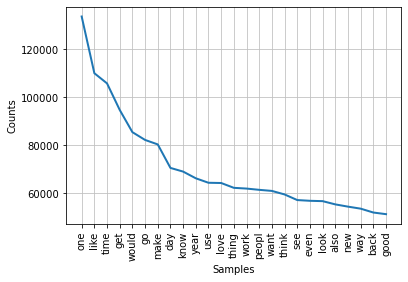

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
word_count.plot(25, cumulative=False)

In [23]:
words = ' '.join(blogs)

In [25]:
wordcloud = WordCloud().generate(words)

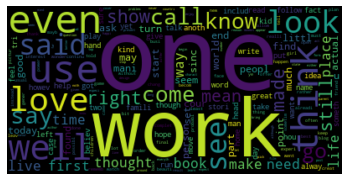

In [26]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## N-Gramas

### 2-gramas

In [27]:
two_grams = ngrams(blogs, n=2)

In [28]:
two_grams_freq = collections.Counter(two_grams)

In [29]:
two_grams_freq.most_common(20)

[(('look', 'like'), 6718),
 (('feel', 'like'), 5931),
 (('year', 'ago'), 5725),
 (('last', 'year'), 5233),
 (('new', 'york'), 5083),
 (('even', 'though'), 4749),
 (('would', 'like'), 4580),
 (('last', 'week'), 4526),
 (('make', 'sure'), 4494),
 (('first', 'time'), 4259),
 (('year', 'old'), 4152),
 (('one', 'thing'), 3641),
 (('one', 'day'), 3543),
 (('last', 'night'), 3392),
 (('everi', 'day'), 3261),
 (('look', 'forward'), 3095),
 (('go', 'back'), 3089),
 (('high', 'school'), 2792),
 (('seem', 'like'), 2758),
 (('long', 'time'), 2669)]

### 3-gramas

In [30]:
three_grams = ngrams(blogs, n=3)

In [31]:
three_grams_freq = collections.Counter(three_grams)

In [45]:
three_grams_freq.most_common(20)

[(('new', 'york', 'citi'), 851),
 (('new', 'york', 'time'), 630),
 (('amazon', 'servic', 'llc'), 427),
 (('servic', 'llc', 'amazon'), 426),
 (('llc', 'amazon', 'eu'), 426),
 (('coupl', 'week', 'ago'), 418),
 (('incorpor', 'item', 'pp'), 389),
 (('two', 'year', 'ago'), 351),
 (('ca', 'wait', 'see'), 306),
 (('look', 'forward', 'see'), 305),
 (('world', 'war', 'ii'), 300),
 (('let', 'us', 'know'), 281),
 (('mani', 'year', 'ago'), 281),
 (('coupl', 'year', 'ago'), 276),
 (('long', 'time', 'ago'), 275),
 (('make', 'feel', 'like'), 273),
 (('spend', 'lot', 'time'), 267),
 (('would', 'like', 'see'), 265),
 (('want', 'make', 'sure'), 264),
 (('preheat', 'oven', 'degre'), 262)]